# 1.Setup Mario

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done:
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

C:\Users\hk598\OneDrive\Documents\Mario RL\mario\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\hk598\OneDrive\Documents\Mario RL\mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [4]:
env.close()

# 2. Preprocess Environment

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116


In [9]:
!pip install stable-baselines3[extra]

  Using cached stable_baselines3-1.7.0-py3-none-any.whl (171 kB)
  Using cached importlib_metadata-4.13.0-py3-none-any.whl (23 kB)
  Using cached gym-0.21.0-py3-none-any.whl
  Using cached pandas-1.5.3-cp38-cp38-win_amd64.whl (11.0 MB)
  Using cached ale_py-0.7.4-cp38-cp38-win_amd64.whl (904 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached rich-13.3.1-py3-none-any.whl (239 kB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached AutoROM-0.4.2-py3-none-any.whl (16 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached AutoROM.accept-rom-license-0.5.5.tar.gz (22 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached goog

In [5]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [6]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [7]:
state = env.reset()

In [8]:
state, reward, done, info = env.step([5])

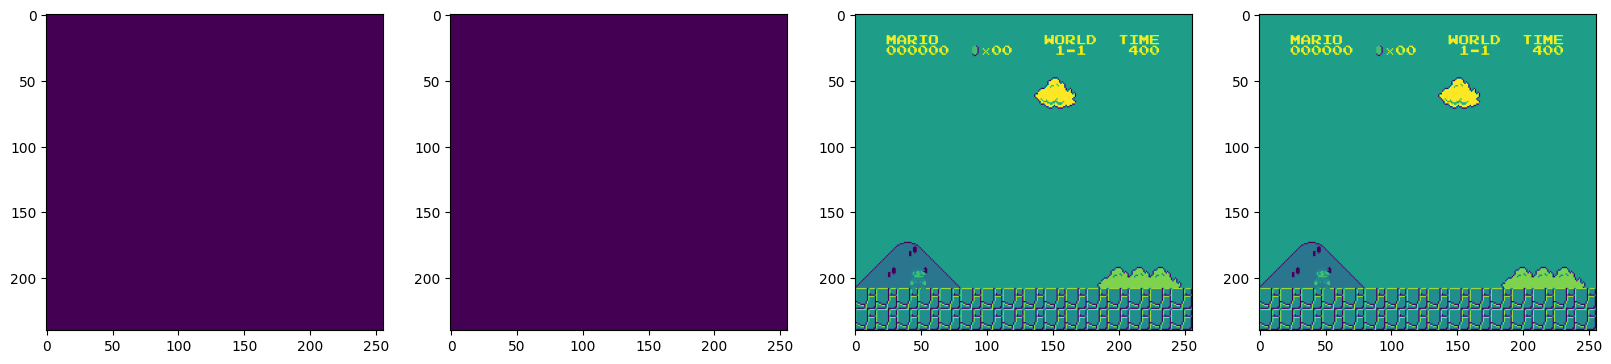

In [9]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [10]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [11]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [12]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/type1'

In [13]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [14]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000003,n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [15]:
#model = PPO.load("./thisisatestmodel.zip", env)

In [14]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=20000000, callback=callback)

Logging to ./logs/PPO_3


C:\Users\hk598\OneDrive\Documents\Mario RL\mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 47  |
|    iterations      | 1   |
|    time_elapsed    | 10  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 2             |
|    time_elapsed         | 18            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 0.00044607592 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00181       |
|    learning_rate        | 3e-06         |
|    loss                 | 141           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00124      |
|    value_loss           | 391           |
-------------------------------------------
-----

------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 13           |
|    time_elapsed         | 97           |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 0.0002345976 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.00634      |
|    learning_rate        | 3e-06        |
|    loss                 | 0.0773       |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.000687    |
|    value_loss           | 0.218        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 68           |
|    iterations           | 14           |
|    time_elapsed         | 104          |
|    total_

--------------------------------------------
| time/                   |                |
|    fps                  | 71             |
|    iterations           | 24             |
|    time_elapsed         | 172            |
|    total_timesteps      | 12288          |
| train/                  |                |
|    approx_kl            | 0.000105162966 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.91          |
|    explained_variance   | 0.0791         |
|    learning_rate        | 3e-06          |
|    loss                 | 0.182          |
|    n_updates            | 230            |
|    policy_gradient_loss | 5.8e-05        |
|    value_loss           | 0.42           |
--------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 71            |
|    iterations           | 25            |
|    time_elap

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 35           |
|    time_elapsed         | 247          |
|    total_timesteps      | 17920        |
| train/                  |              |
|    approx_kl            | 0.0014331031 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.0257      |
|    learning_rate        | 3e-06        |
|    loss                 | 0.125        |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00267     |
|    value_loss           | 0.869        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 72            |
|    iterations           | 36            |
|    time_elapsed         | 254           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 46           |
|    time_elapsed         | 322          |
|    total_timesteps      | 23552        |
| train/                  |              |
|    approx_kl            | 0.0009423725 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.81        |
|    explained_variance   | 0.0126       |
|    learning_rate        | 3e-06        |
|    loss                 | 0.0324       |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.00171     |
|    value_loss           | 0.112        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 47           |
|    time_elapsed         | 328          |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 57         |
|    time_elapsed         | 396        |
|    total_timesteps      | 29184      |
| train/                  |            |
|    approx_kl            | 0.00101522 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.76      |
|    explained_variance   | -0.033     |
|    learning_rate        | 3e-06      |
|    loss                 | 0.0541     |
|    n_updates            | 560        |
|    policy_gradient_loss | -0.00213   |
|    value_loss           | 0.206      |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 58           |
|    time_elapsed         | 403          |
|    total_timesteps      | 29696        |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 68            |
|    time_elapsed         | 474           |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 8.2425075e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.62         |
|    explained_variance   | 0.0369        |
|    learning_rate        | 3e-06         |
|    loss                 | 0.133         |
|    n_updates            | 670           |
|    policy_gradient_loss | 0.000605      |
|    value_loss           | 0.701         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 69            |
|    time_elapsed         | 481 

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 79           |
|    time_elapsed         | 552          |
|    total_timesteps      | 40448        |
| train/                  |              |
|    approx_kl            | 0.0004416107 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.67        |
|    explained_variance   | 0.00243      |
|    learning_rate        | 3e-06        |
|    loss                 | 0.066        |
|    n_updates            | 780          |
|    policy_gradient_loss | -0.000695    |
|    value_loss           | 0.18         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 80          |
|    time_elapsed         | 559         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 90          |
|    time_elapsed         | 632         |
|    total_timesteps      | 46080       |
| train/                  |             |
|    approx_kl            | 0.011241286 |
|    clip_fraction        | 0.0152      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | -0.016      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.0169      |
|    n_updates            | 890         |
|    policy_gradient_loss | -0.00844    |
|    value_loss           | 0.125       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 91          |
|    time_elapsed         | 639         |
|    total_timesteps      | 46592 

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 101          |
|    time_elapsed         | 711          |
|    total_timesteps      | 51712        |
| train/                  |              |
|    approx_kl            | 0.0004458439 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.03        |
|    explained_variance   | 0.0161       |
|    learning_rate        | 3e-06        |
|    loss                 | 0.254        |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.000656    |
|    value_loss           | 0.523        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 72            |
|    iterations           | 102           |
|    time_elapsed         | 718           |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 112         |
|    time_elapsed         | 786         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.019011084 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.537       |
|    learning_rate        | 3e-06       |
|    loss                 | 84.1        |
|    n_updates            | 1110        |
|    policy_gradient_loss | 0.0025      |
|    value_loss           | 264         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 113          |
|    time_elapsed         | 793          |
|    total_timesteps      | 5

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 123         |
|    time_elapsed         | 861         |
|    total_timesteps      | 62976       |
| train/                  |             |
|    approx_kl            | 0.007353414 |
|    clip_fraction        | 0.023       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.0917      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.0581      |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.00695    |
|    value_loss           | 0.197       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 124           |
|    time_elapsed         | 867           |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 134          |
|    time_elapsed         | 936          |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 0.0066431463 |
|    clip_fraction        | 0.0238       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -0.0104      |
|    learning_rate        | 3e-06        |
|    loss                 | 0.117        |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.00515     |
|    value_loss           | 0.255        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 135          |
|    time_elapsed         | 943          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 145         |
|    time_elapsed         | 1011        |
|    total_timesteps      | 74240       |
| train/                  |             |
|    approx_kl            | 0.002938915 |
|    clip_fraction        | 0.00332     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.03       |
|    explained_variance   | 0.728       |
|    learning_rate        | 3e-06       |
|    loss                 | 10.6        |
|    n_updates            | 1440        |
|    policy_gradient_loss | 0.000412    |
|    value_loss           | 76.9        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 146          |
|    time_elapsed         | 1018         |
|    total_timesteps      | 7

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 156         |
|    time_elapsed         | 1085        |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.002345845 |
|    clip_fraction        | 0.000195    |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | -0.0561     |
|    learning_rate        | 3e-06       |
|    loss                 | 0.0603      |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.00145    |
|    value_loss           | 0.133       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 157          |
|    time_elapsed         | 1092         |
|    total_timesteps      | 8

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 167         |
|    time_elapsed         | 1160        |
|    total_timesteps      | 85504       |
| train/                  |             |
|    approx_kl            | 0.008035818 |
|    clip_fraction        | 0.0156      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | -0.0211     |
|    learning_rate        | 3e-06       |
|    loss                 | 0.129       |
|    n_updates            | 1660        |
|    policy_gradient_loss | -0.00639    |
|    value_loss           | 0.253       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 168          |
|    time_elapsed         | 1167         |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 178          |
|    time_elapsed         | 1237         |
|    total_timesteps      | 91136        |
| train/                  |              |
|    approx_kl            | 0.0021373353 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.43        |
|    explained_variance   | 0.00152      |
|    learning_rate        | 3e-06        |
|    loss                 | 0.113        |
|    n_updates            | 1770         |
|    policy_gradient_loss | -0.00166     |
|    value_loss           | 0.53         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 179         |
|    time_elapsed         | 1245        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 189         |
|    time_elapsed         | 1317        |
|    total_timesteps      | 96768       |
| train/                  |             |
|    approx_kl            | 0.003967159 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | -0.106      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.0452      |
|    n_updates            | 1880        |
|    policy_gradient_loss | -0.00323    |
|    value_loss           | 0.119       |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 190           |
|    time_elapsed         | 1324          |
|    total_timesteps    

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 200         |
|    time_elapsed         | 1395        |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.007111647 |
|    clip_fraction        | 0.0363      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.0702     |
|    learning_rate        | 3e-06       |
|    loss                 | 0.209       |
|    n_updates            | 1990        |
|    policy_gradient_loss | -0.00618    |
|    value_loss           | 2.59        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 201          |
|    time_elapsed         | 1402         |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 211          |
|    time_elapsed         | 1473         |
|    total_timesteps      | 108032       |
| train/                  |              |
|    approx_kl            | 0.0036468296 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.24        |
|    explained_variance   | -0.187       |
|    learning_rate        | 3e-06        |
|    loss                 | 0.198        |
|    n_updates            | 2100         |
|    policy_gradient_loss | -0.00244     |
|    value_loss           | 0.725        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 212         |
|    time_elapsed         | 1480        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 222          |
|    time_elapsed         | 1547         |
|    total_timesteps      | 113664       |
| train/                  |              |
|    approx_kl            | 0.0010103121 |
|    clip_fraction        | 0.00625      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.24        |
|    explained_variance   | 0.836        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.7         |
|    n_updates            | 2210         |
|    policy_gradient_loss | 0.00135      |
|    value_loss           | 121          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 223          |
|    time_elapsed         | 1554         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 233         |
|    time_elapsed         | 1624        |
|    total_timesteps      | 119296      |
| train/                  |             |
|    approx_kl            | 0.002371875 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | -0.0257     |
|    learning_rate        | 3e-06       |
|    loss                 | 0.249       |
|    n_updates            | 2320        |
|    policy_gradient_loss | -0.00222    |
|    value_loss           | 1.81        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 234          |
|    time_elapsed         | 1630         |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 244          |
|    time_elapsed         | 1700         |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0034694355 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.27        |
|    explained_variance   | 0.0742       |
|    learning_rate        | 3e-06        |
|    loss                 | 0.078        |
|    n_updates            | 2430         |
|    policy_gradient_loss | -0.00262     |
|    value_loss           | 0.581        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 245          |
|    time_elapsed         | 1707         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 255           |
|    time_elapsed         | 1779          |
|    total_timesteps      | 130560        |
| train/                  |               |
|    approx_kl            | 0.00011520099 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.905        |
|    explained_variance   | 0.705         |
|    learning_rate        | 3e-06         |
|    loss                 | 248           |
|    n_updates            | 2540          |
|    policy_gradient_loss | 4.36e-05      |
|    value_loss           | 419           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 256           |
|    time_elapsed         | 1786

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 266         |
|    time_elapsed         | 1857        |
|    total_timesteps      | 136192      |
| train/                  |             |
|    approx_kl            | 0.005221665 |
|    clip_fraction        | 0.0309      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.856      |
|    explained_variance   | 0.0632      |
|    learning_rate        | 3e-06       |
|    loss                 | 1.15        |
|    n_updates            | 2650        |
|    policy_gradient_loss | -0.00319    |
|    value_loss           | 13.9        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 267          |
|    time_elapsed         | 1864         |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 277         |
|    time_elapsed         | 1934        |
|    total_timesteps      | 141824      |
| train/                  |             |
|    approx_kl            | 0.003214636 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | -0.458      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.105       |
|    n_updates            | 2760        |
|    policy_gradient_loss | -0.00206    |
|    value_loss           | 0.694       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 278          |
|    time_elapsed         | 1941         |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 288           |
|    time_elapsed         | 2009          |
|    total_timesteps      | 147456        |
| train/                  |               |
|    approx_kl            | 8.4842904e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.348        |
|    explained_variance   | 0.491         |
|    learning_rate        | 3e-06         |
|    loss                 | 277           |
|    n_updates            | 2870          |
|    policy_gradient_loss | 0.00059       |
|    value_loss           | 446           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 289          |
|    time_elapsed         | 2016    

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 299           |
|    time_elapsed         | 2085          |
|    total_timesteps      | 153088        |
| train/                  |               |
|    approx_kl            | 0.00010478974 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.49         |
|    explained_variance   | 0.912         |
|    learning_rate        | 3e-06         |
|    loss                 | 38.3          |
|    n_updates            | 2980          |
|    policy_gradient_loss | 0.000207      |
|    value_loss           | 64.6          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 300           |
|    time_elapsed         | 2092

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 310          |
|    time_elapsed         | 2161         |
|    total_timesteps      | 158720       |
| train/                  |              |
|    approx_kl            | 0.0001597862 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.377       |
|    explained_variance   | 0.798        |
|    learning_rate        | 3e-06        |
|    loss                 | 35.3         |
|    n_updates            | 3090         |
|    policy_gradient_loss | 0.00014      |
|    value_loss           | 104          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 311           |
|    time_elapsed         | 2168          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 321           |
|    time_elapsed         | 2237          |
|    total_timesteps      | 164352        |
| train/                  |               |
|    approx_kl            | 0.00023697224 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.331        |
|    explained_variance   | 0.819         |
|    learning_rate        | 3e-06         |
|    loss                 | 43            |
|    n_updates            | 3200          |
|    policy_gradient_loss | 6.02e-05      |
|    value_loss           | 95.5          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 322           |
|    time_elapsed         | 2244

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 332          |
|    time_elapsed         | 2314         |
|    total_timesteps      | 169984       |
| train/                  |              |
|    approx_kl            | 0.0022400809 |
|    clip_fraction        | 0.0148       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.408       |
|    explained_variance   | 0.761        |
|    learning_rate        | 3e-06        |
|    loss                 | 27.5         |
|    n_updates            | 3310         |
|    policy_gradient_loss | -0.000947    |
|    value_loss           | 64.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 333          |
|    time_elapsed         | 2321         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 343          |
|    time_elapsed         | 2389         |
|    total_timesteps      | 175616       |
| train/                  |              |
|    approx_kl            | 0.0026867907 |
|    clip_fraction        | 0.0295       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.549       |
|    explained_variance   | 0.756        |
|    learning_rate        | 3e-06        |
|    loss                 | 25.3         |
|    n_updates            | 3420         |
|    policy_gradient_loss | -0.0042      |
|    value_loss           | 112          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 344          |
|    time_elapsed         | 2396         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 354          |
|    time_elapsed         | 2465         |
|    total_timesteps      | 181248       |
| train/                  |              |
|    approx_kl            | 0.0019745468 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.683       |
|    explained_variance   | 0.799        |
|    learning_rate        | 3e-06        |
|    loss                 | 130          |
|    n_updates            | 3530         |
|    policy_gradient_loss | -0.00111     |
|    value_loss           | 220          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 355           |
|    time_elapsed         | 2472          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 365          |
|    time_elapsed         | 2541         |
|    total_timesteps      | 186880       |
| train/                  |              |
|    approx_kl            | 0.0031647028 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.567       |
|    explained_variance   | 0.879        |
|    learning_rate        | 3e-06        |
|    loss                 | 29           |
|    n_updates            | 3640         |
|    policy_gradient_loss | -0.0011      |
|    value_loss           | 94.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 366         |
|    time_elapsed         | 2549        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 376          |
|    time_elapsed         | 2620         |
|    total_timesteps      | 192512       |
| train/                  |              |
|    approx_kl            | 0.0012609214 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.422       |
|    explained_variance   | 0.839        |
|    learning_rate        | 3e-06        |
|    loss                 | 32.5         |
|    n_updates            | 3750         |
|    policy_gradient_loss | -0.000937    |
|    value_loss           | 77.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 377          |
|    time_elapsed         | 2628         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 387          |
|    time_elapsed         | 2698         |
|    total_timesteps      | 198144       |
| train/                  |              |
|    approx_kl            | 0.0007444662 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.424       |
|    explained_variance   | 0.854        |
|    learning_rate        | 3e-06        |
|    loss                 | 35.1         |
|    n_updates            | 3860         |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 84.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 388          |
|    time_elapsed         | 2706         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 398          |
|    time_elapsed         | 2775         |
|    total_timesteps      | 203776       |
| train/                  |              |
|    approx_kl            | 0.0013794166 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.406       |
|    explained_variance   | 0.535        |
|    learning_rate        | 3e-06        |
|    loss                 | 50.1         |
|    n_updates            | 3970         |
|    policy_gradient_loss | -0.00258     |
|    value_loss           | 309          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 399          |
|    time_elapsed         | 2781         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 409          |
|    time_elapsed         | 2850         |
|    total_timesteps      | 209408       |
| train/                  |              |
|    approx_kl            | 0.0038145683 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.595       |
|    explained_variance   | 0.675        |
|    learning_rate        | 3e-06        |
|    loss                 | 41.5         |
|    n_updates            | 4080         |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 142          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 410          |
|    time_elapsed         | 2856         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 420        |
|    time_elapsed         | 2924       |
|    total_timesteps      | 215040     |
| train/                  |            |
|    approx_kl            | 0.00945757 |
|    clip_fraction        | 0.0193     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.992     |
|    explained_variance   | 0.732      |
|    learning_rate        | 3e-06      |
|    loss                 | 445        |
|    n_updates            | 4190       |
|    policy_gradient_loss | -0.00554   |
|    value_loss           | 347        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 421         |
|    time_elapsed         | 2931        |
|    total_timesteps      | 215552      |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 431          |
|    time_elapsed         | 3001         |
|    total_timesteps      | 220672       |
| train/                  |              |
|    approx_kl            | 0.0019209108 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.11        |
|    explained_variance   | 0.832        |
|    learning_rate        | 3e-06        |
|    loss                 | 130          |
|    n_updates            | 4300         |
|    policy_gradient_loss | -0.000408    |
|    value_loss           | 379          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 432         |
|    time_elapsed         | 3008        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 442         |
|    time_elapsed         | 3079        |
|    total_timesteps      | 226304      |
| train/                  |             |
|    approx_kl            | 0.003905144 |
|    clip_fraction        | 0.0541      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.577      |
|    explained_variance   | 0.458       |
|    learning_rate        | 3e-06       |
|    loss                 | 305         |
|    n_updates            | 4410        |
|    policy_gradient_loss | -0.00352    |
|    value_loss           | 590         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 443          |
|    time_elapsed         | 3087         |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 453          |
|    time_elapsed         | 3160         |
|    total_timesteps      | 231936       |
| train/                  |              |
|    approx_kl            | 0.0023308937 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.666       |
|    explained_variance   | 0.613        |
|    learning_rate        | 3e-06        |
|    loss                 | 130          |
|    n_updates            | 4520         |
|    policy_gradient_loss | -0.00077     |
|    value_loss           | 206          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 454          |
|    time_elapsed         | 3167         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 464          |
|    time_elapsed         | 3240         |
|    total_timesteps      | 237568       |
| train/                  |              |
|    approx_kl            | 0.0005437713 |
|    clip_fraction        | 0.00605      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.608        |
|    learning_rate        | 3e-06        |
|    loss                 | 328          |
|    n_updates            | 4630         |
|    policy_gradient_loss | 2.88e-05     |
|    value_loss           | 818          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 465           |
|    time_elapsed         | 3247          |
|    t

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 475        |
|    time_elapsed         | 3316       |
|    total_timesteps      | 243200     |
| train/                  |            |
|    approx_kl            | 0.00079887 |
|    clip_fraction        | 0.0166     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.277     |
|    explained_variance   | 0.726      |
|    learning_rate        | 3e-06      |
|    loss                 | 245        |
|    n_updates            | 4740       |
|    policy_gradient_loss | -0.0014    |
|    value_loss           | 438        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 476          |
|    time_elapsed         | 3323         |
|    total_timesteps      | 243712       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 486          |
|    time_elapsed         | 3393         |
|    total_timesteps      | 248832       |
| train/                  |              |
|    approx_kl            | 0.0019658972 |
|    clip_fraction        | 0.032        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.581       |
|    explained_variance   | 0.798        |
|    learning_rate        | 3e-06        |
|    loss                 | 54.4         |
|    n_updates            | 4850         |
|    policy_gradient_loss | -0.00354     |
|    value_loss           | 112          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 487          |
|    time_elapsed         | 3400         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 497         |
|    time_elapsed         | 3470        |
|    total_timesteps      | 254464      |
| train/                  |             |
|    approx_kl            | 0.006884441 |
|    clip_fraction        | 0.052       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.67       |
|    explained_variance   | 0.741       |
|    learning_rate        | 3e-06       |
|    loss                 | 47.9        |
|    n_updates            | 4960        |
|    policy_gradient_loss | -0.000281   |
|    value_loss           | 103         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 498        |
|    time_elapsed         | 3477       |
|    total_timesteps      | 254976     

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 508          |
|    time_elapsed         | 3549         |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 0.0020717734 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.806       |
|    explained_variance   | 0.631        |
|    learning_rate        | 3e-06        |
|    loss                 | 911          |
|    n_updates            | 5070         |
|    policy_gradient_loss | -7.51e-05    |
|    value_loss           | 1.27e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 509          |
|    time_elapsed         | 3557         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 519          |
|    time_elapsed         | 3629         |
|    total_timesteps      | 265728       |
| train/                  |              |
|    approx_kl            | 0.0020708402 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.814       |
|    explained_variance   | 0.886        |
|    learning_rate        | 3e-06        |
|    loss                 | 51.9         |
|    n_updates            | 5180         |
|    policy_gradient_loss | 0.000403     |
|    value_loss           | 169          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 520         |
|    time_elapsed         | 3636        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 530          |
|    time_elapsed         | 3706         |
|    total_timesteps      | 271360       |
| train/                  |              |
|    approx_kl            | 0.0013379628 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.222       |
|    explained_variance   | 0.295        |
|    learning_rate        | 3e-06        |
|    loss                 | 531          |
|    n_updates            | 5290         |
|    policy_gradient_loss | 8.06e-05     |
|    value_loss           | 685          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 531          |
|    time_elapsed         | 3713         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 541         |
|    time_elapsed         | 3784        |
|    total_timesteps      | 276992      |
| train/                  |             |
|    approx_kl            | 0.011007629 |
|    clip_fraction        | 0.034       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.432      |
|    explained_variance   | 0.74        |
|    learning_rate        | 3e-06       |
|    loss                 | 200         |
|    n_updates            | 5400        |
|    policy_gradient_loss | -0.00467    |
|    value_loss           | 327         |
-----------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 73             |
|    iterations           | 542            |
|    time_elapsed         | 3792           |
|    total_timestep

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 552          |
|    time_elapsed         | 3865         |
|    total_timesteps      | 282624       |
| train/                  |              |
|    approx_kl            | 0.0037085533 |
|    clip_fraction        | 0.0377       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.709        |
|    learning_rate        | 3e-06        |
|    loss                 | 130          |
|    n_updates            | 5510         |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 278          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 553          |
|    time_elapsed         | 3872         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 563          |
|    time_elapsed         | 3945         |
|    total_timesteps      | 288256       |
| train/                  |              |
|    approx_kl            | 0.0013931048 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.275       |
|    explained_variance   | 0.691        |
|    learning_rate        | 3e-06        |
|    loss                 | 125          |
|    n_updates            | 5620         |
|    policy_gradient_loss | -0.00189     |
|    value_loss           | 276          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 564          |
|    time_elapsed         | 3952         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 574          |
|    time_elapsed         | 4025         |
|    total_timesteps      | 293888       |
| train/                  |              |
|    approx_kl            | 0.0030802719 |
|    clip_fraction        | 0.0203       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.278       |
|    explained_variance   | 0.894        |
|    learning_rate        | 3e-06        |
|    loss                 | 49           |
|    n_updates            | 5730         |
|    policy_gradient_loss | -0.00553     |
|    value_loss           | 230          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 575          |
|    time_elapsed         | 4033         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 585          |
|    time_elapsed         | 4106         |
|    total_timesteps      | 299520       |
| train/                  |              |
|    approx_kl            | 0.0008953352 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.231       |
|    explained_variance   | 0.538        |
|    learning_rate        | 3e-06        |
|    loss                 | 689          |
|    n_updates            | 5840         |
|    policy_gradient_loss | -0.00215     |
|    value_loss           | 711          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 586         |
|    time_elapsed         | 4114        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 596          |
|    time_elapsed         | 4185         |
|    total_timesteps      | 305152       |
| train/                  |              |
|    approx_kl            | 0.0027201106 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.362       |
|    explained_variance   | 0.836        |
|    learning_rate        | 3e-06        |
|    loss                 | 213          |
|    n_updates            | 5950         |
|    policy_gradient_loss | -0.00133     |
|    value_loss           | 391          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 597          |
|    time_elapsed         | 4192         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 607         |
|    time_elapsed         | 4263        |
|    total_timesteps      | 310784      |
| train/                  |             |
|    approx_kl            | 0.006514146 |
|    clip_fraction        | 0.026       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.362      |
|    explained_variance   | 0.825       |
|    learning_rate        | 3e-06       |
|    loss                 | 284         |
|    n_updates            | 6060        |
|    policy_gradient_loss | -0.00167    |
|    value_loss           | 537         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 608         |
|    time_elapsed         | 4270        |
|    total_timesteps      | 311296

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 618          |
|    time_elapsed         | 4340         |
|    total_timesteps      | 316416       |
| train/                  |              |
|    approx_kl            | 0.0028222445 |
|    clip_fraction        | 0.0248       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.327       |
|    explained_variance   | 0.832        |
|    learning_rate        | 3e-06        |
|    loss                 | 85           |
|    n_updates            | 6170         |
|    policy_gradient_loss | -0.00433     |
|    value_loss           | 266          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 72            |
|    iterations           | 619           |
|    time_elapsed         | 4347          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 629          |
|    time_elapsed         | 4419         |
|    total_timesteps      | 322048       |
| train/                  |              |
|    approx_kl            | 0.0045686457 |
|    clip_fraction        | 0.0266       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.433       |
|    explained_variance   | 0.726        |
|    learning_rate        | 3e-06        |
|    loss                 | 457          |
|    n_updates            | 6280         |
|    policy_gradient_loss | -0.00267     |
|    value_loss           | 923          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 630          |
|    time_elapsed         | 4427         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 640          |
|    time_elapsed         | 4500         |
|    total_timesteps      | 327680       |
| train/                  |              |
|    approx_kl            | 0.0027107543 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.257       |
|    explained_variance   | 0.427        |
|    learning_rate        | 3e-06        |
|    loss                 | 328          |
|    n_updates            | 6390         |
|    policy_gradient_loss | -0.00273     |
|    value_loss           | 780          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 72            |
|    iterations           | 641           |
|    time_elapsed         | 4507          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 651          |
|    time_elapsed         | 4577         |
|    total_timesteps      | 333312       |
| train/                  |              |
|    approx_kl            | 0.0018421712 |
|    clip_fraction        | 0.0156       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.32        |
|    explained_variance   | 0.773        |
|    learning_rate        | 3e-06        |
|    loss                 | 154          |
|    n_updates            | 6500         |
|    policy_gradient_loss | -0.00333     |
|    value_loss           | 413          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 652         |
|    time_elapsed         | 4585        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 662          |
|    time_elapsed         | 4657         |
|    total_timesteps      | 338944       |
| train/                  |              |
|    approx_kl            | 5.611556e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.484        |
|    learning_rate        | 3e-06        |
|    loss                 | 471          |
|    n_updates            | 6610         |
|    policy_gradient_loss | -0.000266    |
|    value_loss           | 831          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 663         |
|    time_elapsed         | 4665        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 673          |
|    time_elapsed         | 4734         |
|    total_timesteps      | 344576       |
| train/                  |              |
|    approx_kl            | 0.0025734024 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.596       |
|    explained_variance   | 0.96         |
|    learning_rate        | 3e-06        |
|    loss                 | 73.4         |
|    n_updates            | 6720         |
|    policy_gradient_loss | -0.00269     |
|    value_loss           | 154          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 72            |
|    iterations           | 674           |
|    time_elapsed         | 4741          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 684          |
|    time_elapsed         | 4810         |
|    total_timesteps      | 350208       |
| train/                  |              |
|    approx_kl            | 0.0031046974 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.429       |
|    explained_variance   | 0.742        |
|    learning_rate        | 3e-06        |
|    loss                 | 43.4         |
|    n_updates            | 6830         |
|    policy_gradient_loss | 0.000712     |
|    value_loss           | 106          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 72         |
|    iterations           | 685        |
|    time_elapsed         | 4817       |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 695          |
|    time_elapsed         | 4886         |
|    total_timesteps      | 355840       |
| train/                  |              |
|    approx_kl            | 0.0016530743 |
|    clip_fraction        | 0.0178       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.401       |
|    explained_variance   | 0.806        |
|    learning_rate        | 3e-06        |
|    loss                 | 292          |
|    n_updates            | 6940         |
|    policy_gradient_loss | -0.0024      |
|    value_loss           | 386          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 696          |
|    time_elapsed         | 4894         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 706         |
|    time_elapsed         | 4964        |
|    total_timesteps      | 361472      |
| train/                  |             |
|    approx_kl            | 0.006215108 |
|    clip_fraction        | 0.0602      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.63       |
|    explained_variance   | 0.798       |
|    learning_rate        | 3e-06       |
|    loss                 | 116         |
|    n_updates            | 7050        |
|    policy_gradient_loss | -0.00114    |
|    value_loss           | 249         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 707          |
|    time_elapsed         | 4971         |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 717          |
|    time_elapsed         | 5039         |
|    total_timesteps      | 367104       |
| train/                  |              |
|    approx_kl            | 0.0023867753 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.416       |
|    explained_variance   | 0.723        |
|    learning_rate        | 3e-06        |
|    loss                 | 200          |
|    n_updates            | 7160         |
|    policy_gradient_loss | -0.00203     |
|    value_loss           | 502          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 718         |
|    time_elapsed         | 5046        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 728          |
|    time_elapsed         | 5114         |
|    total_timesteps      | 372736       |
| train/                  |              |
|    approx_kl            | 0.0038316168 |
|    clip_fraction        | 0.0375       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.45        |
|    explained_variance   | 0.674        |
|    learning_rate        | 3e-06        |
|    loss                 | 111          |
|    n_updates            | 7270         |
|    policy_gradient_loss | -0.00211     |
|    value_loss           | 252          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 729          |
|    time_elapsed         | 5121         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 739          |
|    time_elapsed         | 5189         |
|    total_timesteps      | 378368       |
| train/                  |              |
|    approx_kl            | 0.0024496769 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.83        |
|    explained_variance   | -0.459       |
|    learning_rate        | 3e-06        |
|    loss                 | 0.09         |
|    n_updates            | 7380         |
|    policy_gradient_loss | -0.00239     |
|    value_loss           | 0.269        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 740          |
|    time_elapsed         | 5196         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 72          |
|    iterations           | 750         |
|    time_elapsed         | 5264        |
|    total_timesteps      | 384000      |
| train/                  |             |
|    approx_kl            | 0.006399029 |
|    clip_fraction        | 0.0113      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.904       |
|    learning_rate        | 3e-06       |
|    loss                 | 10.2        |
|    n_updates            | 7490        |
|    policy_gradient_loss | -0.00354    |
|    value_loss           | 22.1        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 72            |
|    iterations           | 751           |
|    time_elapsed         | 5270          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 761          |
|    time_elapsed         | 5338         |
|    total_timesteps      | 389632       |
| train/                  |              |
|    approx_kl            | 0.0020079254 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.766       |
|    explained_variance   | 0.817        |
|    learning_rate        | 3e-06        |
|    loss                 | 77.2         |
|    n_updates            | 7600         |
|    policy_gradient_loss | -0.00233     |
|    value_loss           | 160          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 72           |
|    iterations           | 762          |
|    time_elapsed         | 5345         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 772           |
|    time_elapsed         | 5413          |
|    total_timesteps      | 395264        |
| train/                  |               |
|    approx_kl            | 0.00024313829 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.64         |
|    explained_variance   | 0.821         |
|    learning_rate        | 3e-06         |
|    loss                 | 58            |
|    n_updates            | 7710          |
|    policy_gradient_loss | 0.000546      |
|    value_loss           | 199           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 773          |
|    time_elapsed         | 5420    

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 783          |
|    time_elapsed         | 5489         |
|    total_timesteps      | 400896       |
| train/                  |              |
|    approx_kl            | 0.0023378462 |
|    clip_fraction        | 0.0295       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.653       |
|    explained_variance   | 0.518        |
|    learning_rate        | 3e-06        |
|    loss                 | 66.9         |
|    n_updates            | 7820         |
|    policy_gradient_loss | -9.45e-05    |
|    value_loss           | 155          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 784          |
|    time_elapsed         | 5495         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 794          |
|    time_elapsed         | 5563         |
|    total_timesteps      | 406528       |
| train/                  |              |
|    approx_kl            | 0.0016949885 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.959       |
|    explained_variance   | 0.842        |
|    learning_rate        | 3e-06        |
|    loss                 | 46.2         |
|    n_updates            | 7930         |
|    policy_gradient_loss | -0.00176     |
|    value_loss           | 135          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 795        |
|    time_elapsed         | 5570       |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 805          |
|    time_elapsed         | 5638         |
|    total_timesteps      | 412160       |
| train/                  |              |
|    approx_kl            | 0.0033494784 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.768       |
|    explained_variance   | 0.466        |
|    learning_rate        | 3e-06        |
|    loss                 | 82           |
|    n_updates            | 8040         |
|    policy_gradient_loss | -0.00161     |
|    value_loss           | 593          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 806          |
|    time_elapsed         | 5645         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 816        |
|    time_elapsed         | 5713       |
|    total_timesteps      | 417792     |
| train/                  |            |
|    approx_kl            | 0.00374377 |
|    clip_fraction        | 0.0162     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.812     |
|    explained_variance   | 0.268      |
|    learning_rate        | 3e-06      |
|    loss                 | 285        |
|    n_updates            | 8150       |
|    policy_gradient_loss | -0.00427   |
|    value_loss           | 724        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 817          |
|    time_elapsed         | 5719         |
|    total_timesteps      | 418304       |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 827          |
|    time_elapsed         | 5787         |
|    total_timesteps      | 423424       |
| train/                  |              |
|    approx_kl            | 0.0020017717 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.865       |
|    explained_variance   | 0.758        |
|    learning_rate        | 3e-06        |
|    loss                 | 57.9         |
|    n_updates            | 8260         |
|    policy_gradient_loss | -0.001       |
|    value_loss           | 151          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 828          |
|    time_elapsed         | 5794         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 838          |
|    time_elapsed         | 5862         |
|    total_timesteps      | 429056       |
| train/                  |              |
|    approx_kl            | 0.0038495967 |
|    clip_fraction        | 0.0506       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.614       |
|    explained_variance   | 0.742        |
|    learning_rate        | 3e-06        |
|    loss                 | 74.2         |
|    n_updates            | 8370         |
|    policy_gradient_loss | -0.00412     |
|    value_loss           | 215          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 839         |
|    time_elapsed         | 5868        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 849          |
|    time_elapsed         | 5936         |
|    total_timesteps      | 434688       |
| train/                  |              |
|    approx_kl            | 0.0052770968 |
|    clip_fraction        | 0.0371       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.881       |
|    explained_variance   | 0.749        |
|    learning_rate        | 3e-06        |
|    loss                 | 238          |
|    n_updates            | 8480         |
|    policy_gradient_loss | -0.00278     |
|    value_loss           | 339          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 850          |
|    time_elapsed         | 5943         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 860           |
|    time_elapsed         | 6010          |
|    total_timesteps      | 440320        |
| train/                  |               |
|    approx_kl            | 0.00036412815 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.423        |
|    explained_variance   | 0.743         |
|    learning_rate        | 3e-06         |
|    loss                 | 124           |
|    n_updates            | 8590          |
|    policy_gradient_loss | -0.000562     |
|    value_loss           | 391           |
-------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 861        |
|    time_elapsed         | 6017       |
|  

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 871         |
|    time_elapsed         | 6085        |
|    total_timesteps      | 445952      |
| train/                  |             |
|    approx_kl            | 0.002621396 |
|    clip_fraction        | 0.0203      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.659      |
|    explained_variance   | 0.616       |
|    learning_rate        | 3e-06       |
|    loss                 | 102         |
|    n_updates            | 8700        |
|    policy_gradient_loss | -0.00207    |
|    value_loss           | 450         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 872          |
|    time_elapsed         | 6092         |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 882          |
|    time_elapsed         | 6161         |
|    total_timesteps      | 451584       |
| train/                  |              |
|    approx_kl            | 0.0032850737 |
|    clip_fraction        | 0.00957      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.831       |
|    explained_variance   | 0.611        |
|    learning_rate        | 3e-06        |
|    loss                 | 71.2         |
|    n_updates            | 8810         |
|    policy_gradient_loss | -0.0024      |
|    value_loss           | 205          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 883         |
|    time_elapsed         | 6167        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 893         |
|    time_elapsed         | 6235        |
|    total_timesteps      | 457216      |
| train/                  |             |
|    approx_kl            | 0.005598982 |
|    clip_fraction        | 0.0486      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.872      |
|    explained_variance   | 0.843       |
|    learning_rate        | 3e-06       |
|    loss                 | 51          |
|    n_updates            | 8920        |
|    policy_gradient_loss | -0.0054     |
|    value_loss           | 148         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 894          |
|    time_elapsed         | 6242         |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 904          |
|    time_elapsed         | 6310         |
|    total_timesteps      | 462848       |
| train/                  |              |
|    approx_kl            | 0.0030348306 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.691       |
|    explained_variance   | 0.747        |
|    learning_rate        | 3e-06        |
|    loss                 | 35.7         |
|    n_updates            | 9030         |
|    policy_gradient_loss | 0.000439     |
|    value_loss           | 95.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 905         |
|    time_elapsed         | 6317        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 915          |
|    time_elapsed         | 6385         |
|    total_timesteps      | 468480       |
| train/                  |              |
|    approx_kl            | 0.0021303645 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.725       |
|    explained_variance   | 0.77         |
|    learning_rate        | 3e-06        |
|    loss                 | 150          |
|    n_updates            | 9140         |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 463          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 916          |
|    time_elapsed         | 6391         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 926          |
|    time_elapsed         | 6459         |
|    total_timesteps      | 474112       |
| train/                  |              |
|    approx_kl            | 0.0019974266 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.676       |
|    explained_variance   | 0.794        |
|    learning_rate        | 3e-06        |
|    loss                 | 129          |
|    n_updates            | 9250         |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 247          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 927          |
|    time_elapsed         | 6466         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 937          |
|    time_elapsed         | 6534         |
|    total_timesteps      | 479744       |
| train/                  |              |
|    approx_kl            | 0.0063697966 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.928       |
|    explained_variance   | 0.651        |
|    learning_rate        | 3e-06        |
|    loss                 | 133          |
|    n_updates            | 9360         |
|    policy_gradient_loss | -0.00308     |
|    value_loss           | 612          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 938          |
|    time_elapsed         | 6541         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 948          |
|    time_elapsed         | 6609         |
|    total_timesteps      | 485376       |
| train/                  |              |
|    approx_kl            | 0.0021383835 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.817       |
|    explained_variance   | 0.745        |
|    learning_rate        | 3e-06        |
|    loss                 | 325          |
|    n_updates            | 9470         |
|    policy_gradient_loss | -0.00104     |
|    value_loss           | 694          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 949          |
|    time_elapsed         | 6616         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 959         |
|    time_elapsed         | 6684        |
|    total_timesteps      | 491008      |
| train/                  |             |
|    approx_kl            | 0.004165926 |
|    clip_fraction        | 0.0154      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.985      |
|    explained_variance   | 0.933       |
|    learning_rate        | 3e-06       |
|    loss                 | 55.4        |
|    n_updates            | 9580        |
|    policy_gradient_loss | -0.000437   |
|    value_loss           | 141         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 960          |
|    time_elapsed         | 6690         |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 970          |
|    time_elapsed         | 6760         |
|    total_timesteps      | 496640       |
| train/                  |              |
|    approx_kl            | 0.0034692464 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.928       |
|    explained_variance   | 0.893        |
|    learning_rate        | 3e-06        |
|    loss                 | 110          |
|    n_updates            | 9690         |
|    policy_gradient_loss | -0.00244     |
|    value_loss           | 268          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 971          |
|    time_elapsed         | 6767         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 981          |
|    time_elapsed         | 6836         |
|    total_timesteps      | 502272       |
| train/                  |              |
|    approx_kl            | 0.0039479136 |
|    clip_fraction        | 0.0332       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.898       |
|    explained_variance   | 0.949        |
|    learning_rate        | 3e-06        |
|    loss                 | 35.4         |
|    n_updates            | 9800         |
|    policy_gradient_loss | -0.00566     |
|    value_loss           | 199          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 982          |
|    time_elapsed         | 6843         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 992          |
|    time_elapsed         | 6912         |
|    total_timesteps      | 507904       |
| train/                  |              |
|    approx_kl            | 0.0044230977 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.886       |
|    explained_variance   | 0.893        |
|    learning_rate        | 3e-06        |
|    loss                 | 26.6         |
|    n_updates            | 9910         |
|    policy_gradient_loss | -0.00291     |
|    value_loss           | 97.8         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 993           |
|    time_elapsed         | 6919          |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1003        |
|    time_elapsed         | 6988        |
|    total_timesteps      | 513536      |
| train/                  |             |
|    approx_kl            | 0.008624762 |
|    clip_fraction        | 0.051       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.916       |
|    learning_rate        | 3e-06       |
|    loss                 | 69.1        |
|    n_updates            | 10020       |
|    policy_gradient_loss | -0.00721    |
|    value_loss           | 225         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1004         |
|    time_elapsed         | 6995         |
|    total_timesteps      | 5

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1014         |
|    time_elapsed         | 7064         |
|    total_timesteps      | 519168       |
| train/                  |              |
|    approx_kl            | 0.0092180725 |
|    clip_fraction        | 0.0633       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.719       |
|    explained_variance   | 0.87         |
|    learning_rate        | 3e-06        |
|    loss                 | 85.1         |
|    n_updates            | 10130        |
|    policy_gradient_loss | -0.00465     |
|    value_loss           | 322          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1015         |
|    time_elapsed         | 7071         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1025         |
|    time_elapsed         | 7139         |
|    total_timesteps      | 524800       |
| train/                  |              |
|    approx_kl            | 0.0018079034 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.63        |
|    explained_variance   | 0.829        |
|    learning_rate        | 3e-06        |
|    loss                 | 78.8         |
|    n_updates            | 10240        |
|    policy_gradient_loss | -0.00277     |
|    value_loss           | 153          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1026         |
|    time_elapsed         | 7146         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1036        |
|    time_elapsed         | 7214        |
|    total_timesteps      | 530432      |
| train/                  |             |
|    approx_kl            | 0.008632586 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.817      |
|    explained_variance   | 0.182       |
|    learning_rate        | 3e-06       |
|    loss                 | 308         |
|    n_updates            | 10350       |
|    policy_gradient_loss | -0.00785    |
|    value_loss           | 803         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1037         |
|    time_elapsed         | 7221         |
|    total_timesteps      | 5

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1047        |
|    time_elapsed         | 7289        |
|    total_timesteps      | 536064      |
| train/                  |             |
|    approx_kl            | 0.013327362 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.807      |
|    explained_variance   | 0.749       |
|    learning_rate        | 3e-06       |
|    loss                 | 49.4        |
|    n_updates            | 10460       |
|    policy_gradient_loss | -0.0124     |
|    value_loss           | 124         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1048        |
|    time_elapsed         | 7296        |
|    total_timesteps      | 536576

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1058        |
|    time_elapsed         | 7365        |
|    total_timesteps      | 541696      |
| train/                  |             |
|    approx_kl            | 0.017247139 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.856      |
|    explained_variance   | 0.847       |
|    learning_rate        | 3e-06       |
|    loss                 | 56.3        |
|    n_updates            | 10570       |
|    policy_gradient_loss | -0.00921    |
|    value_loss           | 175         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1059         |
|    time_elapsed         | 7372         |
|    total_timesteps      | 5

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1069         |
|    time_elapsed         | 7440         |
|    total_timesteps      | 547328       |
| train/                  |              |
|    approx_kl            | 0.0017047868 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.935       |
|    explained_variance   | 0.85         |
|    learning_rate        | 3e-06        |
|    loss                 | 56.5         |
|    n_updates            | 10680        |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 175          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1070        |
|    time_elapsed         | 7447        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1080        |
|    time_elapsed         | 7516        |
|    total_timesteps      | 552960      |
| train/                  |             |
|    approx_kl            | 0.005226986 |
|    clip_fraction        | 0.0773      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.87       |
|    explained_variance   | 0.807       |
|    learning_rate        | 3e-06       |
|    loss                 | 26.9        |
|    n_updates            | 10790       |
|    policy_gradient_loss | -0.00714    |
|    value_loss           | 73.3        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1081         |
|    time_elapsed         | 7523         |
|    total_timesteps      | 5

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1091         |
|    time_elapsed         | 7592         |
|    total_timesteps      | 558592       |
| train/                  |              |
|    approx_kl            | 0.0035784745 |
|    clip_fraction        | 0.0252       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.975       |
|    explained_variance   | 0.898        |
|    learning_rate        | 3e-06        |
|    loss                 | 85.2         |
|    n_updates            | 10900        |
|    policy_gradient_loss | -0.0049      |
|    value_loss           | 244          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1092         |
|    time_elapsed         | 7599         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 1102       |
|    time_elapsed         | 7667       |
|    total_timesteps      | 564224     |
| train/                  |            |
|    approx_kl            | 0.00865471 |
|    clip_fraction        | 0.0521     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.93      |
|    explained_variance   | 0.939      |
|    learning_rate        | 3e-06      |
|    loss                 | 57.5       |
|    n_updates            | 11010      |
|    policy_gradient_loss | -0.00365   |
|    value_loss           | 129        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1103        |
|    time_elapsed         | 7674        |
|    total_timesteps      | 564736      |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1113        |
|    time_elapsed         | 7742        |
|    total_timesteps      | 569856      |
| train/                  |             |
|    approx_kl            | 0.007182993 |
|    clip_fraction        | 0.0482      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.827      |
|    explained_variance   | 0.725       |
|    learning_rate        | 3e-06       |
|    loss                 | 70.4        |
|    n_updates            | 11120       |
|    policy_gradient_loss | -0.0072     |
|    value_loss           | 181         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1114        |
|    time_elapsed         | 7749        |
|    total_timesteps      | 570368

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1124         |
|    time_elapsed         | 7818         |
|    total_timesteps      | 575488       |
| train/                  |              |
|    approx_kl            | 0.0016137277 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.716       |
|    explained_variance   | 0.779        |
|    learning_rate        | 3e-06        |
|    loss                 | 102          |
|    n_updates            | 11230        |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 488          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1125        |
|    time_elapsed         | 7825        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1135        |
|    time_elapsed         | 7893        |
|    total_timesteps      | 581120      |
| train/                  |             |
|    approx_kl            | 0.005099794 |
|    clip_fraction        | 0.0223      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.942      |
|    explained_variance   | 0.937       |
|    learning_rate        | 3e-06       |
|    loss                 | 138         |
|    n_updates            | 11340       |
|    policy_gradient_loss | -0.00194    |
|    value_loss           | 186         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1136        |
|    time_elapsed         | 7900        |
|    total_timesteps      | 581632

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1146         |
|    time_elapsed         | 7969         |
|    total_timesteps      | 586752       |
| train/                  |              |
|    approx_kl            | 0.0033234498 |
|    clip_fraction        | 0.051        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.436       |
|    explained_variance   | 0.857        |
|    learning_rate        | 3e-06        |
|    loss                 | 141          |
|    n_updates            | 11450        |
|    policy_gradient_loss | -0.00891     |
|    value_loss           | 294          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1147         |
|    time_elapsed         | 7975         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1157         |
|    time_elapsed         | 8044         |
|    total_timesteps      | 592384       |
| train/                  |              |
|    approx_kl            | 0.0010182468 |
|    clip_fraction        | 0.00977      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.312       |
|    explained_variance   | 0.787        |
|    learning_rate        | 3e-06        |
|    loss                 | 90.9         |
|    n_updates            | 11560        |
|    policy_gradient_loss | -0.00198     |
|    value_loss           | 313          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1158         |
|    time_elapsed         | 8051         |
|    total_

---------------------------------------
| time/                   |           |
|    fps                  | 73        |
|    iterations           | 1168      |
|    time_elapsed         | 8119      |
|    total_timesteps      | 598016    |
| train/                  |           |
|    approx_kl            | 0.0012085 |
|    clip_fraction        | 0.0182    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.309    |
|    explained_variance   | 0.679     |
|    learning_rate        | 3e-06     |
|    loss                 | 81.8      |
|    n_updates            | 11670     |
|    policy_gradient_loss | -0.00224  |
|    value_loss           | 270       |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1169        |
|    time_elapsed         | 8126        |
|    total_timesteps      | 598528      |
| train/                  | 

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1179         |
|    time_elapsed         | 8196         |
|    total_timesteps      | 603648       |
| train/                  |              |
|    approx_kl            | 0.0024398437 |
|    clip_fraction        | 0.0107       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.712       |
|    explained_variance   | 0.971        |
|    learning_rate        | 3e-06        |
|    loss                 | 61.3         |
|    n_updates            | 11780        |
|    policy_gradient_loss | -0.000954    |
|    value_loss           | 128          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1180         |
|    time_elapsed         | 8203         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1190         |
|    time_elapsed         | 8271         |
|    total_timesteps      | 609280       |
| train/                  |              |
|    approx_kl            | 0.0016592352 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.451       |
|    explained_variance   | 0.88         |
|    learning_rate        | 3e-06        |
|    loss                 | 36.6         |
|    n_updates            | 11890        |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 170          |
------------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 73        |
|    iterations           | 1191      |
|    time_elapsed         | 8278      |
|    total_timesteps      

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1201         |
|    time_elapsed         | 8346         |
|    total_timesteps      | 614912       |
| train/                  |              |
|    approx_kl            | 0.0056934515 |
|    clip_fraction        | 0.0316       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.938       |
|    explained_variance   | 0.777        |
|    learning_rate        | 3e-06        |
|    loss                 | 56.6         |
|    n_updates            | 12000        |
|    policy_gradient_loss | -0.00212     |
|    value_loss           | 172          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1202        |
|    time_elapsed         | 8353        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1212         |
|    time_elapsed         | 8421         |
|    total_timesteps      | 620544       |
| train/                  |              |
|    approx_kl            | 0.0011522471 |
|    clip_fraction        | 0.00703      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.35        |
|    explained_variance   | 0.659        |
|    learning_rate        | 3e-06        |
|    loss                 | 62.4         |
|    n_updates            | 12110        |
|    policy_gradient_loss | -0.00278     |
|    value_loss           | 208          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1213         |
|    time_elapsed         | 8428         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1223         |
|    time_elapsed         | 8497         |
|    total_timesteps      | 626176       |
| train/                  |              |
|    approx_kl            | 0.0017547662 |
|    clip_fraction        | 0.0234       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.306       |
|    explained_variance   | 0.843        |
|    learning_rate        | 3e-06        |
|    loss                 | 130          |
|    n_updates            | 12220        |
|    policy_gradient_loss | -0.00226     |
|    value_loss           | 283          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1224         |
|    time_elapsed         | 8504         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1234         |
|    time_elapsed         | 8572         |
|    total_timesteps      | 631808       |
| train/                  |              |
|    approx_kl            | 0.0048111845 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.578       |
|    explained_variance   | 0.781        |
|    learning_rate        | 3e-06        |
|    loss                 | 60.2         |
|    n_updates            | 12330        |
|    policy_gradient_loss | -0.00329     |
|    value_loss           | 229          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1235         |
|    time_elapsed         | 8579         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1245         |
|    time_elapsed         | 8647         |
|    total_timesteps      | 637440       |
| train/                  |              |
|    approx_kl            | 0.0047217486 |
|    clip_fraction        | 0.0318       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.406       |
|    explained_variance   | 0.889        |
|    learning_rate        | 3e-06        |
|    loss                 | 49.8         |
|    n_updates            | 12440        |
|    policy_gradient_loss | -0.00465     |
|    value_loss           | 147          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1246         |
|    time_elapsed         | 8654         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1256        |
|    time_elapsed         | 8722        |
|    total_timesteps      | 643072      |
| train/                  |             |
|    approx_kl            | 0.001255445 |
|    clip_fraction        | 0.0107      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.534      |
|    explained_variance   | 0.778       |
|    learning_rate        | 3e-06       |
|    loss                 | 104         |
|    n_updates            | 12550       |
|    policy_gradient_loss | -0.00278    |
|    value_loss           | 472         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1257         |
|    time_elapsed         | 8729         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1267        |
|    time_elapsed         | 8797        |
|    total_timesteps      | 648704      |
| train/                  |             |
|    approx_kl            | 0.004955573 |
|    clip_fraction        | 0.0592      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.503      |
|    explained_variance   | 0.77        |
|    learning_rate        | 3e-06       |
|    loss                 | 176         |
|    n_updates            | 12660       |
|    policy_gradient_loss | -0.00625    |
|    value_loss           | 289         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1268         |
|    time_elapsed         | 8804         |
|    total_timesteps      | 6

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1278         |
|    time_elapsed         | 8872         |
|    total_timesteps      | 654336       |
| train/                  |              |
|    approx_kl            | 0.0012631299 |
|    clip_fraction        | 0.00273      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.425       |
|    explained_variance   | 0.884        |
|    learning_rate        | 3e-06        |
|    loss                 | 76.4         |
|    n_updates            | 12770        |
|    policy_gradient_loss | -0.000593    |
|    value_loss           | 303          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1279        |
|    time_elapsed         | 8879        |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1289        |
|    time_elapsed         | 8948        |
|    total_timesteps      | 659968      |
| train/                  |             |
|    approx_kl            | 0.002849401 |
|    clip_fraction        | 0.0332      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.553      |
|    explained_variance   | 0.893       |
|    learning_rate        | 3e-06       |
|    loss                 | 88.8        |
|    n_updates            | 12880       |
|    policy_gradient_loss | -0.00263    |
|    value_loss           | 225         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1290         |
|    time_elapsed         | 8954         |
|    total_timesteps      | 6

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1300         |
|    time_elapsed         | 9023         |
|    total_timesteps      | 665600       |
| train/                  |              |
|    approx_kl            | 0.0024532897 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.274       |
|    explained_variance   | 0.889        |
|    learning_rate        | 3e-06        |
|    loss                 | 53.5         |
|    n_updates            | 12990        |
|    policy_gradient_loss | -0.00289     |
|    value_loss           | 141          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1301          |
|    time_elapsed         | 9030          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1311         |
|    time_elapsed         | 9099         |
|    total_timesteps      | 671232       |
| train/                  |              |
|    approx_kl            | 0.0038869258 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.658       |
|    explained_variance   | 0.737        |
|    learning_rate        | 3e-06        |
|    loss                 | 97.1         |
|    n_updates            | 13100        |
|    policy_gradient_loss | 0.00257      |
|    value_loss           | 262          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1312         |
|    time_elapsed         | 9105         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1322        |
|    time_elapsed         | 9174        |
|    total_timesteps      | 676864      |
| train/                  |             |
|    approx_kl            | 0.006712868 |
|    clip_fraction        | 0.0309      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.625      |
|    explained_variance   | 0.745       |
|    learning_rate        | 3e-06       |
|    loss                 | 103         |
|    n_updates            | 13210       |
|    policy_gradient_loss | -0.00297    |
|    value_loss           | 256         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 1323       |
|    time_elapsed         | 9180       |
|    total_timesteps      | 677376     

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1333         |
|    time_elapsed         | 9249         |
|    total_timesteps      | 682496       |
| train/                  |              |
|    approx_kl            | 0.0030703426 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.34        |
|    explained_variance   | 0.828        |
|    learning_rate        | 3e-06        |
|    loss                 | 156          |
|    n_updates            | 13320        |
|    policy_gradient_loss | -0.0034      |
|    value_loss           | 740          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1334         |
|    time_elapsed         | 9256         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1344         |
|    time_elapsed         | 9324         |
|    total_timesteps      | 688128       |
| train/                  |              |
|    approx_kl            | 0.0072250655 |
|    clip_fraction        | 0.0424       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.527       |
|    explained_variance   | 0.764        |
|    learning_rate        | 3e-06        |
|    loss                 | 250          |
|    n_updates            | 13430        |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 736          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1345         |
|    time_elapsed         | 9331         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1355         |
|    time_elapsed         | 9400         |
|    total_timesteps      | 693760       |
| train/                  |              |
|    approx_kl            | 0.0010602855 |
|    clip_fraction        | 0.00742      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | 0.746        |
|    learning_rate        | 3e-06        |
|    loss                 | 235          |
|    n_updates            | 13540        |
|    policy_gradient_loss | -0.00559     |
|    value_loss           | 550          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1356         |
|    time_elapsed         | 9407         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1366        |
|    time_elapsed         | 9475        |
|    total_timesteps      | 699392      |
| train/                  |             |
|    approx_kl            | 0.004895293 |
|    clip_fraction        | 0.0326      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.384      |
|    explained_variance   | 0.873       |
|    learning_rate        | 3e-06       |
|    loss                 | 79.3        |
|    n_updates            | 13650       |
|    policy_gradient_loss | -0.00435    |
|    value_loss           | 216         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1367         |
|    time_elapsed         | 9482         |
|    total_timesteps      | 6

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1377        |
|    time_elapsed         | 9551        |
|    total_timesteps      | 705024      |
| train/                  |             |
|    approx_kl            | 0.002006309 |
|    clip_fraction        | 0.0104      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.02       |
|    explained_variance   | 0.969       |
|    learning_rate        | 3e-06       |
|    loss                 | 34.4        |
|    n_updates            | 13760       |
|    policy_gradient_loss | -0.00215    |
|    value_loss           | 111         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1378        |
|    time_elapsed         | 9558        |
|    total_timesteps      | 705536

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1388         |
|    time_elapsed         | 9626         |
|    total_timesteps      | 710656       |
| train/                  |              |
|    approx_kl            | 0.0053337608 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.827        |
|    learning_rate        | 3e-06        |
|    loss                 | 54.3         |
|    n_updates            | 13870        |
|    policy_gradient_loss | -0.000612    |
|    value_loss           | 278          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1389         |
|    time_elapsed         | 9633         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1399         |
|    time_elapsed         | 9702         |
|    total_timesteps      | 716288       |
| train/                  |              |
|    approx_kl            | 0.0018349488 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.283       |
|    explained_variance   | 0.862        |
|    learning_rate        | 3e-06        |
|    loss                 | 192          |
|    n_updates            | 13980        |
|    policy_gradient_loss | -0.00305     |
|    value_loss           | 319          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1400        |
|    time_elapsed         | 9709        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1410         |
|    time_elapsed         | 9777         |
|    total_timesteps      | 721920       |
| train/                  |              |
|    approx_kl            | 0.0036746068 |
|    clip_fraction        | 0.0428       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.29        |
|    explained_variance   | 0.617        |
|    learning_rate        | 3e-06        |
|    loss                 | 273          |
|    n_updates            | 14090        |
|    policy_gradient_loss | -0.00421     |
|    value_loss           | 695          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1411        |
|    time_elapsed         | 9783        |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1421         |
|    time_elapsed         | 9852         |
|    total_timesteps      | 727552       |
| train/                  |              |
|    approx_kl            | 0.0006068932 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.678        |
|    learning_rate        | 3e-06        |
|    loss                 | 233          |
|    n_updates            | 14200        |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 717          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1422         |
|    time_elapsed         | 9859         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1432         |
|    time_elapsed         | 9927         |
|    total_timesteps      | 733184       |
| train/                  |              |
|    approx_kl            | 0.0015289772 |
|    clip_fraction        | 0.0209       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.215       |
|    explained_variance   | 0.818        |
|    learning_rate        | 3e-06        |
|    loss                 | 51.5         |
|    n_updates            | 14310        |
|    policy_gradient_loss | -0.00467     |
|    value_loss           | 190          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1433          |
|    time_elapsed         | 9934          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1443         |
|    time_elapsed         | 10003        |
|    total_timesteps      | 738816       |
| train/                  |              |
|    approx_kl            | 0.0013371767 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.31        |
|    explained_variance   | 0.799        |
|    learning_rate        | 3e-06        |
|    loss                 | 53           |
|    n_updates            | 14420        |
|    policy_gradient_loss | -0.00366     |
|    value_loss           | 126          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1444        |
|    time_elapsed         | 10010       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1454        |
|    time_elapsed         | 10079       |
|    total_timesteps      | 744448      |
| train/                  |             |
|    approx_kl            | 0.004042169 |
|    clip_fraction        | 0.0152      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.418      |
|    explained_variance   | 0.168       |
|    learning_rate        | 3e-06       |
|    loss                 | 508         |
|    n_updates            | 14530       |
|    policy_gradient_loss | 0.000148    |
|    value_loss           | 1.14e+03    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1455        |
|    time_elapsed         | 10086       |
|    total_timesteps      | 744960

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1465         |
|    time_elapsed         | 10154        |
|    total_timesteps      | 750080       |
| train/                  |              |
|    approx_kl            | 0.0055286046 |
|    clip_fraction        | 0.0555       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.595       |
|    explained_variance   | 0.873        |
|    learning_rate        | 3e-06        |
|    loss                 | 99.1         |
|    n_updates            | 14640        |
|    policy_gradient_loss | -0.00178     |
|    value_loss           | 237          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1466         |
|    time_elapsed         | 10161        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1476        |
|    time_elapsed         | 10231       |
|    total_timesteps      | 755712      |
| train/                  |             |
|    approx_kl            | 0.008963183 |
|    clip_fraction        | 0.0297      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.257      |
|    explained_variance   | 0.739       |
|    learning_rate        | 3e-06       |
|    loss                 | 77.6        |
|    n_updates            | 14750       |
|    policy_gradient_loss | -0.00669    |
|    value_loss           | 212         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1477         |
|    time_elapsed         | 10238        |
|    total_timesteps      | 7

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1487         |
|    time_elapsed         | 10309        |
|    total_timesteps      | 761344       |
| train/                  |              |
|    approx_kl            | 0.0029536877 |
|    clip_fraction        | 0.0131       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.386       |
|    explained_variance   | 0.716        |
|    learning_rate        | 3e-06        |
|    loss                 | 120          |
|    n_updates            | 14860        |
|    policy_gradient_loss | -0.00534     |
|    value_loss           | 342          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1488        |
|    time_elapsed         | 10316       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1498        |
|    time_elapsed         | 10387       |
|    total_timesteps      | 766976      |
| train/                  |             |
|    approx_kl            | 0.003560207 |
|    clip_fraction        | 0.0434      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.476      |
|    explained_variance   | 0.923       |
|    learning_rate        | 3e-06       |
|    loss                 | 116         |
|    n_updates            | 14970       |
|    policy_gradient_loss | -4.45e-05   |
|    value_loss           | 250         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1499         |
|    time_elapsed         | 10394        |
|    total_timesteps      | 7

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1509        |
|    time_elapsed         | 10467       |
|    total_timesteps      | 772608      |
| train/                  |             |
|    approx_kl            | 0.002565334 |
|    clip_fraction        | 0.043       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.373      |
|    explained_variance   | 0.801       |
|    learning_rate        | 3e-06       |
|    loss                 | 43          |
|    n_updates            | 15080       |
|    policy_gradient_loss | -0.000181   |
|    value_loss           | 181         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1510         |
|    time_elapsed         | 10474        |
|    total_timesteps      | 7

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1520          |
|    time_elapsed         | 10544         |
|    total_timesteps      | 778240        |
| train/                  |               |
|    approx_kl            | 0.00089482963 |
|    clip_fraction        | 0.0041        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.121        |
|    explained_variance   | 0.826         |
|    learning_rate        | 3e-06         |
|    loss                 | 59.7          |
|    n_updates            | 15190         |
|    policy_gradient_loss | -0.000705     |
|    value_loss           | 155           |
-------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 1521       |
|    time_elapsed         | 10551      |
|  

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1531         |
|    time_elapsed         | 10621        |
|    total_timesteps      | 783872       |
| train/                  |              |
|    approx_kl            | 0.0011238947 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.175       |
|    explained_variance   | 0.875        |
|    learning_rate        | 3e-06        |
|    loss                 | 86.5         |
|    n_updates            | 15300        |
|    policy_gradient_loss | -0.000589    |
|    value_loss           | 218          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1532         |
|    time_elapsed         | 10628        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1542         |
|    time_elapsed         | 10701        |
|    total_timesteps      | 789504       |
| train/                  |              |
|    approx_kl            | 0.0003292202 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.748        |
|    learning_rate        | 3e-06        |
|    loss                 | 327          |
|    n_updates            | 15410        |
|    policy_gradient_loss | -0.000388    |
|    value_loss           | 614          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1543         |
|    time_elapsed         | 10708        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1553        |
|    time_elapsed         | 10778       |
|    total_timesteps      | 795136      |
| train/                  |             |
|    approx_kl            | 0.003328418 |
|    clip_fraction        | 0.0207      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.314      |
|    explained_variance   | 0.834       |
|    learning_rate        | 3e-06       |
|    loss                 | 57.7        |
|    n_updates            | 15520       |
|    policy_gradient_loss | -0.00519    |
|    value_loss           | 179         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1554         |
|    time_elapsed         | 10785        |
|    total_timesteps      | 7

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1564          |
|    time_elapsed         | 10853         |
|    total_timesteps      | 800768        |
| train/                  |               |
|    approx_kl            | 0.00057603046 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.243        |
|    explained_variance   | 0.526         |
|    learning_rate        | 3e-06         |
|    loss                 | 830           |
|    n_updates            | 15630         |
|    policy_gradient_loss | -0.00143      |
|    value_loss           | 912           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1565          |
|    time_elapsed         | 1086

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 1575       |
|    time_elapsed         | 10929      |
|    total_timesteps      | 806400     |
| train/                  |            |
|    approx_kl            | 0.00149047 |
|    clip_fraction        | 0.0152     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.546     |
|    explained_variance   | 0.698      |
|    learning_rate        | 3e-06      |
|    loss                 | 53.6       |
|    n_updates            | 15740      |
|    policy_gradient_loss | -0.00217   |
|    value_loss           | 169        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1576        |
|    time_elapsed         | 10936       |
|    total_timesteps      | 806912      |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1586         |
|    time_elapsed         | 11005        |
|    total_timesteps      | 812032       |
| train/                  |              |
|    approx_kl            | 0.0034223539 |
|    clip_fraction        | 0.0291       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.379       |
|    explained_variance   | 0.776        |
|    learning_rate        | 3e-06        |
|    loss                 | 163          |
|    n_updates            | 15850        |
|    policy_gradient_loss | -0.00502     |
|    value_loss           | 376          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1587         |
|    time_elapsed         | 11011        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1597         |
|    time_elapsed         | 11080        |
|    total_timesteps      | 817664       |
| train/                  |              |
|    approx_kl            | 0.0030120106 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.378       |
|    explained_variance   | 0.814        |
|    learning_rate        | 3e-06        |
|    loss                 | 88.5         |
|    n_updates            | 15960        |
|    policy_gradient_loss | -0.0033      |
|    value_loss           | 332          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1598         |
|    time_elapsed         | 11087        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1608         |
|    time_elapsed         | 11156        |
|    total_timesteps      | 823296       |
| train/                  |              |
|    approx_kl            | 0.0022300072 |
|    clip_fraction        | 0.0238       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.533       |
|    explained_variance   | 0.893        |
|    learning_rate        | 3e-06        |
|    loss                 | 73           |
|    n_updates            | 16070        |
|    policy_gradient_loss | -0.00278     |
|    value_loss           | 189          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1609         |
|    time_elapsed         | 11162        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1619         |
|    time_elapsed         | 11231        |
|    total_timesteps      | 828928       |
| train/                  |              |
|    approx_kl            | 0.0015636042 |
|    clip_fraction        | 0.0164       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.335       |
|    explained_variance   | 0.612        |
|    learning_rate        | 3e-06        |
|    loss                 | 126          |
|    n_updates            | 16180        |
|    policy_gradient_loss | -0.00257     |
|    value_loss           | 745          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1620         |
|    time_elapsed         | 11238        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1630          |
|    time_elapsed         | 11306         |
|    total_timesteps      | 834560        |
| train/                  |               |
|    approx_kl            | 0.00048018212 |
|    clip_fraction        | 0.00918       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.261        |
|    explained_variance   | 0.662         |
|    learning_rate        | 3e-06         |
|    loss                 | 750           |
|    n_updates            | 16290         |
|    policy_gradient_loss | -0.00189      |
|    value_loss           | 868           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1631         |
|    time_elapsed         | 11313   

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1641        |
|    time_elapsed         | 11382       |
|    total_timesteps      | 840192      |
| train/                  |             |
|    approx_kl            | 0.002634598 |
|    clip_fraction        | 0.0131      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.312      |
|    explained_variance   | 0.756       |
|    learning_rate        | 3e-06       |
|    loss                 | 63          |
|    n_updates            | 16400       |
|    policy_gradient_loss | -0.00282    |
|    value_loss           | 131         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1642        |
|    time_elapsed         | 11389       |
|    total_timesteps      | 840704

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1652        |
|    time_elapsed         | 11457       |
|    total_timesteps      | 845824      |
| train/                  |             |
|    approx_kl            | 0.005624435 |
|    clip_fraction        | 0.0402      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.389      |
|    explained_variance   | 0.894       |
|    learning_rate        | 3e-06       |
|    loss                 | 164         |
|    n_updates            | 16510       |
|    policy_gradient_loss | -0.00848    |
|    value_loss           | 334         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1653         |
|    time_elapsed         | 11464        |
|    total_timesteps      | 8

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1663        |
|    time_elapsed         | 11533       |
|    total_timesteps      | 851456      |
| train/                  |             |
|    approx_kl            | 0.003475798 |
|    clip_fraction        | 0.0125      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.388      |
|    explained_variance   | 0.763       |
|    learning_rate        | 3e-06       |
|    loss                 | 143         |
|    n_updates            | 16620       |
|    policy_gradient_loss | -0.00698    |
|    value_loss           | 272         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1664         |
|    time_elapsed         | 11540        |
|    total_timesteps      | 8

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1674        |
|    time_elapsed         | 11608       |
|    total_timesteps      | 857088      |
| train/                  |             |
|    approx_kl            | 0.010890873 |
|    clip_fraction        | 0.0615      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.487      |
|    explained_variance   | 0.804       |
|    learning_rate        | 3e-06       |
|    loss                 | 125         |
|    n_updates            | 16730       |
|    policy_gradient_loss | -0.00628    |
|    value_loss           | 318         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1675         |
|    time_elapsed         | 11615        |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1685         |
|    time_elapsed         | 11684        |
|    total_timesteps      | 862720       |
| train/                  |              |
|    approx_kl            | 0.0038909074 |
|    clip_fraction        | 0.0318       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.489       |
|    explained_variance   | 0.719        |
|    learning_rate        | 3e-06        |
|    loss                 | 87.7         |
|    n_updates            | 16840        |
|    policy_gradient_loss | -0.00283     |
|    value_loss           | 273          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1686        |
|    time_elapsed         | 11691       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1696         |
|    time_elapsed         | 11759        |
|    total_timesteps      | 868352       |
| train/                  |              |
|    approx_kl            | 0.0048910305 |
|    clip_fraction        | 0.0359       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.827       |
|    explained_variance   | 0.964        |
|    learning_rate        | 3e-06        |
|    loss                 | 84.3         |
|    n_updates            | 16950        |
|    policy_gradient_loss | -0.00383     |
|    value_loss           | 195          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1697         |
|    time_elapsed         | 11766        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1707         |
|    time_elapsed         | 11834        |
|    total_timesteps      | 873984       |
| train/                  |              |
|    approx_kl            | 0.0056644888 |
|    clip_fraction        | 0.042        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.492       |
|    explained_variance   | 0.843        |
|    learning_rate        | 3e-06        |
|    loss                 | 53.7         |
|    n_updates            | 17060        |
|    policy_gradient_loss | -0.00426     |
|    value_loss           | 127          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1708         |
|    time_elapsed         | 11841        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1718         |
|    time_elapsed         | 11909        |
|    total_timesteps      | 879616       |
| train/                  |              |
|    approx_kl            | 0.0028420514 |
|    clip_fraction        | 0.0199       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.58        |
|    explained_variance   | 0.67         |
|    learning_rate        | 3e-06        |
|    loss                 | 136          |
|    n_updates            | 17170        |
|    policy_gradient_loss | 0.000649     |
|    value_loss           | 231          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1719         |
|    time_elapsed         | 11917        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1729        |
|    time_elapsed         | 11985       |
|    total_timesteps      | 885248      |
| train/                  |             |
|    approx_kl            | 0.002395737 |
|    clip_fraction        | 0.0191      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.259      |
|    explained_variance   | 0.885       |
|    learning_rate        | 3e-06       |
|    loss                 | 90.6        |
|    n_updates            | 17280       |
|    policy_gradient_loss | 0.000169    |
|    value_loss           | 190         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1730         |
|    time_elapsed         | 11992        |
|    total_timesteps      | 8

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1740         |
|    time_elapsed         | 12060        |
|    total_timesteps      | 890880       |
| train/                  |              |
|    approx_kl            | 0.0015409503 |
|    clip_fraction        | 0.00664      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.227       |
|    explained_variance   | 0.621        |
|    learning_rate        | 3e-06        |
|    loss                 | 427          |
|    n_updates            | 17390        |
|    policy_gradient_loss | -0.00436     |
|    value_loss           | 740          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1741         |
|    time_elapsed         | 12067        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1751         |
|    time_elapsed         | 12136        |
|    total_timesteps      | 896512       |
| train/                  |              |
|    approx_kl            | 0.0073123765 |
|    clip_fraction        | 0.0623       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.565       |
|    explained_variance   | 0.889        |
|    learning_rate        | 3e-06        |
|    loss                 | 84.7         |
|    n_updates            | 17500        |
|    policy_gradient_loss | -0.00424     |
|    value_loss           | 211          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1752        |
|    time_elapsed         | 12142       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1762        |
|    time_elapsed         | 12211       |
|    total_timesteps      | 902144      |
| train/                  |             |
|    approx_kl            | 0.012133433 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.967      |
|    explained_variance   | 0.825       |
|    learning_rate        | 3e-06       |
|    loss                 | 84.4        |
|    n_updates            | 17610       |
|    policy_gradient_loss | -0.0126     |
|    value_loss           | 166         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1763        |
|    time_elapsed         | 12218       |
|    total_timesteps      | 902656

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1773         |
|    time_elapsed         | 12287        |
|    total_timesteps      | 907776       |
| train/                  |              |
|    approx_kl            | 0.0090984125 |
|    clip_fraction        | 0.0639       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.13        |
|    explained_variance   | 0.631        |
|    learning_rate        | 3e-06        |
|    loss                 | 42.2         |
|    n_updates            | 17720        |
|    policy_gradient_loss | -0.00191     |
|    value_loss           | 135          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1774         |
|    time_elapsed         | 12293        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1784        |
|    time_elapsed         | 12362       |
|    total_timesteps      | 913408      |
| train/                  |             |
|    approx_kl            | 0.012552826 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.859       |
|    learning_rate        | 3e-06       |
|    loss                 | 52.6        |
|    n_updates            | 17830       |
|    policy_gradient_loss | -0.0101     |
|    value_loss           | 106         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1785        |
|    time_elapsed         | 12369       |
|    total_timesteps      | 913920

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1795        |
|    time_elapsed         | 12439       |
|    total_timesteps      | 919040      |
| train/                  |             |
|    approx_kl            | 0.009371154 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.824       |
|    learning_rate        | 3e-06       |
|    loss                 | 210         |
|    n_updates            | 17940       |
|    policy_gradient_loss | -0.00144    |
|    value_loss           | 434         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1796         |
|    time_elapsed         | 12446        |
|    total_timesteps      | 9

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1806        |
|    time_elapsed         | 12517       |
|    total_timesteps      | 924672      |
| train/                  |             |
|    approx_kl            | 0.009388906 |
|    clip_fraction        | 0.0596      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.672      |
|    explained_variance   | 0.931       |
|    learning_rate        | 3e-06       |
|    loss                 | 103         |
|    n_updates            | 18050       |
|    policy_gradient_loss | -0.00325    |
|    value_loss           | 211         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1807         |
|    time_elapsed         | 12525        |
|    total_timesteps      | 9

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1817         |
|    time_elapsed         | 12597        |
|    total_timesteps      | 930304       |
| train/                  |              |
|    approx_kl            | 0.0027996092 |
|    clip_fraction        | 0.0111       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.737       |
|    explained_variance   | 0.665        |
|    learning_rate        | 3e-06        |
|    loss                 | 102          |
|    n_updates            | 18160        |
|    policy_gradient_loss | -0.000282    |
|    value_loss           | 525          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1818        |
|    time_elapsed         | 12604       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1828        |
|    time_elapsed         | 12673       |
|    total_timesteps      | 935936      |
| train/                  |             |
|    approx_kl            | 0.009018434 |
|    clip_fraction        | 0.0635      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | 0.917       |
|    learning_rate        | 3e-06       |
|    loss                 | 16.1        |
|    n_updates            | 18270       |
|    policy_gradient_loss | -0.000914   |
|    value_loss           | 75.1        |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 1829       |
|    time_elapsed         | 12680      |
|    total_timesteps      | 936448     

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 1839       |
|    time_elapsed         | 12751      |
|    total_timesteps      | 941568     |
| train/                  |            |
|    approx_kl            | 0.01601544 |
|    clip_fraction        | 0.108      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.26      |
|    explained_variance   | 0.0671     |
|    learning_rate        | 3e-06      |
|    loss                 | 1.48       |
|    n_updates            | 18380      |
|    policy_gradient_loss | -0.00941   |
|    value_loss           | 2.69       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1840        |
|    time_elapsed         | 12757       |
|    total_timesteps      | 942080      |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1850        |
|    time_elapsed         | 12826       |
|    total_timesteps      | 947200      |
| train/                  |             |
|    approx_kl            | 0.009865558 |
|    clip_fraction        | 0.0488      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | -0.593      |
|    learning_rate        | 3e-06       |
|    loss                 | 1.71        |
|    n_updates            | 18490       |
|    policy_gradient_loss | -0.0067     |
|    value_loss           | 3.05        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1851        |
|    time_elapsed         | 12832       |
|    total_timesteps      | 947712

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1861         |
|    time_elapsed         | 12900        |
|    total_timesteps      | 952832       |
| train/                  |              |
|    approx_kl            | 0.0023952299 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.25        |
|    explained_variance   | -1.17        |
|    learning_rate        | 3e-06        |
|    loss                 | 2            |
|    n_updates            | 18600        |
|    policy_gradient_loss | -0.000763    |
|    value_loss           | 9.14         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1862        |
|    time_elapsed         | 12907       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1872        |
|    time_elapsed         | 12975       |
|    total_timesteps      | 958464      |
| train/                  |             |
|    approx_kl            | 0.011283723 |
|    clip_fraction        | 0.0412      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | -3.28       |
|    learning_rate        | 3e-06       |
|    loss                 | 1.23        |
|    n_updates            | 18710       |
|    policy_gradient_loss | -0.00601    |
|    value_loss           | 2.74        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1873         |
|    time_elapsed         | 12981        |
|    total_timesteps      | 9

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1883        |
|    time_elapsed         | 13051       |
|    total_timesteps      | 964096      |
| train/                  |             |
|    approx_kl            | 0.016002424 |
|    clip_fraction        | 0.0996      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | -1.29       |
|    learning_rate        | 3e-06       |
|    loss                 | 1.22        |
|    n_updates            | 18820       |
|    policy_gradient_loss | -0.00468    |
|    value_loss           | 2.7         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1884        |
|    time_elapsed         | 13059       |
|    total_timesteps      | 964608

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1894         |
|    time_elapsed         | 13129        |
|    total_timesteps      | 969728       |
| train/                  |              |
|    approx_kl            | 0.0026864083 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.12        |
|    explained_variance   | -1.63        |
|    learning_rate        | 3e-06        |
|    loss                 | 1.02         |
|    n_updates            | 18930        |
|    policy_gradient_loss | -0.000362    |
|    value_loss           | 1.31         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1895         |
|    time_elapsed         | 13136        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1905         |
|    time_elapsed         | 13207        |
|    total_timesteps      | 975360       |
| train/                  |              |
|    approx_kl            | 0.0062071225 |
|    clip_fraction        | 0.0473       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.897       |
|    explained_variance   | 0.941        |
|    learning_rate        | 3e-06        |
|    loss                 | 19           |
|    n_updates            | 19040        |
|    policy_gradient_loss | -0.00147     |
|    value_loss           | 67.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1906         |
|    time_elapsed         | 13214        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1916        |
|    time_elapsed         | 13284       |
|    total_timesteps      | 980992      |
| train/                  |             |
|    approx_kl            | 0.005820256 |
|    clip_fraction        | 0.00898     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.868      |
|    explained_variance   | -0.64       |
|    learning_rate        | 3e-06       |
|    loss                 | 0.813       |
|    n_updates            | 19150       |
|    policy_gradient_loss | -0.00166    |
|    value_loss           | 1.52        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1917         |
|    time_elapsed         | 13290        |
|    total_timesteps      | 9

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1927         |
|    time_elapsed         | 13362        |
|    total_timesteps      | 986624       |
| train/                  |              |
|    approx_kl            | 0.0018554626 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.12        |
|    explained_variance   | -0.87        |
|    learning_rate        | 3e-06        |
|    loss                 | 1.02         |
|    n_updates            | 19260        |
|    policy_gradient_loss | -0.000709    |
|    value_loss           | 1.56         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1928         |
|    time_elapsed         | 13369        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1938         |
|    time_elapsed         | 13439        |
|    total_timesteps      | 992256       |
| train/                  |              |
|    approx_kl            | 0.0029588165 |
|    clip_fraction        | 0.0223       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance   | -0.634       |
|    learning_rate        | 3e-06        |
|    loss                 | 2.07         |
|    n_updates            | 19370        |
|    policy_gradient_loss | -0.00362     |
|    value_loss           | 9.11         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1939        |
|    time_elapsed         | 13446       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1949        |
|    time_elapsed         | 13515       |
|    total_timesteps      | 997888      |
| train/                  |             |
|    approx_kl            | 0.002151257 |
|    clip_fraction        | 0.0176      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.396      |
|    explained_variance   | 0.946       |
|    learning_rate        | 3e-06       |
|    loss                 | 47.4        |
|    n_updates            | 19480       |
|    policy_gradient_loss | 3e-06       |
|    value_loss           | 125         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1950         |
|    time_elapsed         | 13522        |
|    total_timesteps      | 9

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1960          |
|    time_elapsed         | 13591         |
|    total_timesteps      | 1003520       |
| train/                  |               |
|    approx_kl            | 0.00014834164 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.175        |
|    explained_variance   | 0.748         |
|    learning_rate        | 3e-06         |
|    loss                 | 72.7          |
|    n_updates            | 19590         |
|    policy_gradient_loss | 3.2e-05       |
|    value_loss           | 559           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1961          |
|    time_elapsed         | 1359

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1971          |
|    time_elapsed         | 13667         |
|    total_timesteps      | 1009152       |
| train/                  |               |
|    approx_kl            | 0.00059004687 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.218        |
|    explained_variance   | 0.716         |
|    learning_rate        | 3e-06         |
|    loss                 | 43.3          |
|    n_updates            | 19700         |
|    policy_gradient_loss | 0.000159      |
|    value_loss           | 383           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 1972          |
|    time_elapsed         | 1367

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1982         |
|    time_elapsed         | 13742        |
|    total_timesteps      | 1014784      |
| train/                  |              |
|    approx_kl            | 0.0016793201 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.413       |
|    explained_variance   | 0.961        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.7         |
|    n_updates            | 19810        |
|    policy_gradient_loss | -0.0032      |
|    value_loss           | 149          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1983         |
|    time_elapsed         | 13749        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 1993         |
|    time_elapsed         | 13818        |
|    total_timesteps      | 1020416      |
| train/                  |              |
|    approx_kl            | 0.0010374303 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.639       |
|    explained_variance   | 0.847        |
|    learning_rate        | 3e-06        |
|    loss                 | 290          |
|    n_updates            | 19920        |
|    policy_gradient_loss | -0.000474    |
|    value_loss           | 365          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 1994        |
|    time_elapsed         | 13825       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2004         |
|    time_elapsed         | 13893        |
|    total_timesteps      | 1026048      |
| train/                  |              |
|    approx_kl            | 0.0007345149 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.498       |
|    explained_variance   | 0.822        |
|    learning_rate        | 3e-06        |
|    loss                 | 83.4         |
|    n_updates            | 20030        |
|    policy_gradient_loss | -0.000431    |
|    value_loss           | 195          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2005         |
|    time_elapsed         | 13900        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2015         |
|    time_elapsed         | 13969        |
|    total_timesteps      | 1031680      |
| train/                  |              |
|    approx_kl            | 0.0078083603 |
|    clip_fraction        | 0.0314       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.348       |
|    explained_variance   | 0.794        |
|    learning_rate        | 3e-06        |
|    loss                 | 75.6         |
|    n_updates            | 20140        |
|    policy_gradient_loss | -0.00477     |
|    value_loss           | 183          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2016         |
|    time_elapsed         | 13976        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2026         |
|    time_elapsed         | 14045        |
|    total_timesteps      | 1037312      |
| train/                  |              |
|    approx_kl            | 0.0034466072 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.346       |
|    explained_variance   | 0.791        |
|    learning_rate        | 3e-06        |
|    loss                 | 251          |
|    n_updates            | 20250        |
|    policy_gradient_loss | 0.00232      |
|    value_loss           | 458          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2027         |
|    time_elapsed         | 14052        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2037        |
|    time_elapsed         | 14120       |
|    total_timesteps      | 1042944     |
| train/                  |             |
|    approx_kl            | 0.008176124 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.495      |
|    explained_variance   | 0.856       |
|    learning_rate        | 3e-06       |
|    loss                 | 194         |
|    n_updates            | 20360       |
|    policy_gradient_loss | -0.00447    |
|    value_loss           | 383         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2038         |
|    time_elapsed         | 14127        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2048          |
|    time_elapsed         | 14196         |
|    total_timesteps      | 1048576       |
| train/                  |               |
|    approx_kl            | 0.00072543044 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.122        |
|    explained_variance   | 0.558         |
|    learning_rate        | 3e-06         |
|    loss                 | 249           |
|    n_updates            | 20470         |
|    policy_gradient_loss | -0.00219      |
|    value_loss           | 584           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2049          |
|    time_elapsed         | 1420

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2059        |
|    time_elapsed         | 14272       |
|    total_timesteps      | 1054208     |
| train/                  |             |
|    approx_kl            | 0.011406319 |
|    clip_fraction        | 0.0811      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.49       |
|    explained_variance   | 0.673       |
|    learning_rate        | 3e-06       |
|    loss                 | 27.1        |
|    n_updates            | 20580       |
|    policy_gradient_loss | -0.0017     |
|    value_loss           | 61.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2060        |
|    time_elapsed         | 14278       |
|    total_timesteps      | 105472

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2070         |
|    time_elapsed         | 14350        |
|    total_timesteps      | 1059840      |
| train/                  |              |
|    approx_kl            | 0.0034317127 |
|    clip_fraction        | 0.0363       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.351       |
|    explained_variance   | 0.922        |
|    learning_rate        | 3e-06        |
|    loss                 | 36.5         |
|    n_updates            | 20690        |
|    policy_gradient_loss | -0.00354     |
|    value_loss           | 130          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2071         |
|    time_elapsed         | 14356        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2081        |
|    time_elapsed         | 14427       |
|    total_timesteps      | 1065472     |
| train/                  |             |
|    approx_kl            | 0.018128373 |
|    clip_fraction        | 0.0334      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.51       |
|    explained_variance   | 0.824       |
|    learning_rate        | 3e-06       |
|    loss                 | 342         |
|    n_updates            | 20800       |
|    policy_gradient_loss | -0.00275    |
|    value_loss           | 757         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2082         |
|    time_elapsed         | 14434        |
|    total_timesteps      | 1

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 2092       |
|    time_elapsed         | 14503      |
|    total_timesteps      | 1071104    |
| train/                  |            |
|    approx_kl            | 0.01708201 |
|    clip_fraction        | 0.0717     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.19      |
|    explained_variance   | -1.61      |
|    learning_rate        | 3e-06      |
|    loss                 | 0.461      |
|    n_updates            | 20910      |
|    policy_gradient_loss | -0.0069    |
|    value_loss           | 1.11       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2093        |
|    time_elapsed         | 14510       |
|    total_timesteps      | 1071616     |
| train/  

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2103          |
|    time_elapsed         | 14579         |
|    total_timesteps      | 1076736       |
| train/                  |               |
|    approx_kl            | 0.00055210304 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.357        |
|    explained_variance   | 0.805         |
|    learning_rate        | 3e-06         |
|    loss                 | 68.6          |
|    n_updates            | 21020         |
|    policy_gradient_loss | -0.00231      |
|    value_loss           | 220           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2104         |
|    time_elapsed         | 14586   

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2114         |
|    time_elapsed         | 14655        |
|    total_timesteps      | 1082368      |
| train/                  |              |
|    approx_kl            | 0.0027898918 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.366       |
|    explained_variance   | 0.874        |
|    learning_rate        | 3e-06        |
|    loss                 | 202          |
|    n_updates            | 21130        |
|    policy_gradient_loss | -0.00185     |
|    value_loss           | 273          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2115          |
|    time_elapsed         | 14662         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2125         |
|    time_elapsed         | 14731        |
|    total_timesteps      | 1088000      |
| train/                  |              |
|    approx_kl            | 0.0021891634 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.289       |
|    explained_variance   | 0.769        |
|    learning_rate        | 3e-06        |
|    loss                 | 672          |
|    n_updates            | 21240        |
|    policy_gradient_loss | 0.000576     |
|    value_loss           | 778          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2126         |
|    time_elapsed         | 14738        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2136         |
|    time_elapsed         | 14807        |
|    total_timesteps      | 1093632      |
| train/                  |              |
|    approx_kl            | 0.0037134753 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.563        |
|    learning_rate        | 3e-06        |
|    loss                 | 58.3         |
|    n_updates            | 21350        |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 213          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2137         |
|    time_elapsed         | 14814        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2147        |
|    time_elapsed         | 14883       |
|    total_timesteps      | 1099264     |
| train/                  |             |
|    approx_kl            | 0.002250606 |
|    clip_fraction        | 0.0186      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.305      |
|    explained_variance   | 0.867       |
|    learning_rate        | 3e-06       |
|    loss                 | 97.5        |
|    n_updates            | 21460       |
|    policy_gradient_loss | -0.00197    |
|    value_loss           | 362         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2148         |
|    time_elapsed         | 14890        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2158         |
|    time_elapsed         | 14960        |
|    total_timesteps      | 1104896      |
| train/                  |              |
|    approx_kl            | 0.0008605999 |
|    clip_fraction        | 0.00664      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.159       |
|    explained_variance   | 0.837        |
|    learning_rate        | 3e-06        |
|    loss                 | 160          |
|    n_updates            | 21570        |
|    policy_gradient_loss | -0.000106    |
|    value_loss           | 263          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2159        |
|    time_elapsed         | 14967       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2169         |
|    time_elapsed         | 15035        |
|    total_timesteps      | 1110528      |
| train/                  |              |
|    approx_kl            | 0.0034858175 |
|    clip_fraction        | 0.0213       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.416       |
|    explained_variance   | 0.961        |
|    learning_rate        | 3e-06        |
|    loss                 | 30.3         |
|    n_updates            | 21680        |
|    policy_gradient_loss | -0.00473     |
|    value_loss           | 157          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2170         |
|    time_elapsed         | 15042        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2180        |
|    time_elapsed         | 15112       |
|    total_timesteps      | 1116160     |
| train/                  |             |
|    approx_kl            | 0.002793421 |
|    clip_fraction        | 0.0361      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.361      |
|    explained_variance   | 0.518       |
|    learning_rate        | 3e-06       |
|    loss                 | 89.8        |
|    n_updates            | 21790       |
|    policy_gradient_loss | 0.00177     |
|    value_loss           | 270         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2181         |
|    time_elapsed         | 15119        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2191         |
|    time_elapsed         | 15189        |
|    total_timesteps      | 1121792      |
| train/                  |              |
|    approx_kl            | 0.0026421929 |
|    clip_fraction        | 0.0592       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.613       |
|    explained_variance   | 0.485        |
|    learning_rate        | 3e-06        |
|    loss                 | 52.8         |
|    n_updates            | 21900        |
|    policy_gradient_loss | -0.000704    |
|    value_loss           | 128          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2192         |
|    time_elapsed         | 15196        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2202         |
|    time_elapsed         | 15264        |
|    total_timesteps      | 1127424      |
| train/                  |              |
|    approx_kl            | 0.0003320506 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.791       |
|    explained_variance   | -2.36        |
|    learning_rate        | 3e-06        |
|    loss                 | 1.57         |
|    n_updates            | 22010        |
|    policy_gradient_loss | -0.000575    |
|    value_loss           | 3.64         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2203        |
|    time_elapsed         | 15271       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2213        |
|    time_elapsed         | 15342       |
|    total_timesteps      | 1133056     |
| train/                  |             |
|    approx_kl            | 0.001683721 |
|    clip_fraction        | 0.00332     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.727      |
|    explained_variance   | 0.777       |
|    learning_rate        | 3e-06       |
|    loss                 | 7.89        |
|    n_updates            | 22120       |
|    policy_gradient_loss | 0.000277    |
|    value_loss           | 61          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2214         |
|    time_elapsed         | 15350        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2224        |
|    time_elapsed         | 15418       |
|    total_timesteps      | 1138688     |
| train/                  |             |
|    approx_kl            | 0.004033294 |
|    clip_fraction        | 0.0217      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.526      |
|    explained_variance   | 0.884       |
|    learning_rate        | 3e-06       |
|    loss                 | 196         |
|    n_updates            | 22230       |
|    policy_gradient_loss | -0.00113    |
|    value_loss           | 341         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2225         |
|    time_elapsed         | 15425        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2235        |
|    time_elapsed         | 15492       |
|    total_timesteps      | 1144320     |
| train/                  |             |
|    approx_kl            | 0.014570376 |
|    clip_fraction        | 0.0369      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.879      |
|    explained_variance   | 0.145       |
|    learning_rate        | 3e-06       |
|    loss                 | 0.5         |
|    n_updates            | 22340       |
|    policy_gradient_loss | -0.003      |
|    value_loss           | 0.864       |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 2236       |
|    time_elapsed         | 15499      |
|    total_timesteps      | 1144832    

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2246         |
|    time_elapsed         | 15567        |
|    total_timesteps      | 1149952      |
| train/                  |              |
|    approx_kl            | 0.0012050484 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.342       |
|    explained_variance   | 0.767        |
|    learning_rate        | 3e-06        |
|    loss                 | 87.3         |
|    n_updates            | 22450        |
|    policy_gradient_loss | 0.000199     |
|    value_loss           | 257          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2247        |
|    time_elapsed         | 15574       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2257        |
|    time_elapsed         | 15643       |
|    total_timesteps      | 1155584     |
| train/                  |             |
|    approx_kl            | 0.004813622 |
|    clip_fraction        | 0.00625     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.647      |
|    explained_variance   | 0.908       |
|    learning_rate        | 3e-06       |
|    loss                 | 26.5        |
|    n_updates            | 22560       |
|    policy_gradient_loss | -0.00164    |
|    value_loss           | 112         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2258         |
|    time_elapsed         | 15649        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2268         |
|    time_elapsed         | 15718        |
|    total_timesteps      | 1161216      |
| train/                  |              |
|    approx_kl            | 0.0038544722 |
|    clip_fraction        | 0.0121       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.24        |
|    explained_variance   | 0.856        |
|    learning_rate        | 3e-06        |
|    loss                 | 68.1         |
|    n_updates            | 22670        |
|    policy_gradient_loss | -0.00168     |
|    value_loss           | 196          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2269        |
|    time_elapsed         | 15724       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2279         |
|    time_elapsed         | 15793        |
|    total_timesteps      | 1166848      |
| train/                  |              |
|    approx_kl            | 0.0076740566 |
|    clip_fraction        | 0.0361       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.515       |
|    explained_variance   | 0.534        |
|    learning_rate        | 3e-06        |
|    loss                 | 198          |
|    n_updates            | 22780        |
|    policy_gradient_loss | -0.00415     |
|    value_loss           | 736          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2280        |
|    time_elapsed         | 15800       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2290        |
|    time_elapsed         | 15868       |
|    total_timesteps      | 1172480     |
| train/                  |             |
|    approx_kl            | 0.004131843 |
|    clip_fraction        | 0.026       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.364      |
|    explained_variance   | 0.879       |
|    learning_rate        | 3e-06       |
|    loss                 | 126         |
|    n_updates            | 22890       |
|    policy_gradient_loss | -0.00266    |
|    value_loss           | 269         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 2291       |
|    time_elapsed         | 15874      |
|    total_timesteps      | 1172992    

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2301        |
|    time_elapsed         | 15943       |
|    total_timesteps      | 1178112     |
| train/                  |             |
|    approx_kl            | 0.005168351 |
|    clip_fraction        | 0.0043      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.576      |
|    explained_variance   | 0.801       |
|    learning_rate        | 3e-06       |
|    loss                 | 19          |
|    n_updates            | 23000       |
|    policy_gradient_loss | -0.00136    |
|    value_loss           | 142         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2302        |
|    time_elapsed         | 15950       |
|    total_timesteps      | 117862

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2312         |
|    time_elapsed         | 16018        |
|    total_timesteps      | 1183744      |
| train/                  |              |
|    approx_kl            | 0.0059729945 |
|    clip_fraction        | 0.0244       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.58        |
|    explained_variance   | 0.795        |
|    learning_rate        | 3e-06        |
|    loss                 | 543          |
|    n_updates            | 23110        |
|    policy_gradient_loss | 0.00193      |
|    value_loss           | 1.01e+03     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2313        |
|    time_elapsed         | 16024       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2323        |
|    time_elapsed         | 16093       |
|    total_timesteps      | 1189376     |
| train/                  |             |
|    approx_kl            | 0.002708238 |
|    clip_fraction        | 0.0139      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.297      |
|    explained_variance   | 0.943       |
|    learning_rate        | 3e-06       |
|    loss                 | 30.5        |
|    n_updates            | 23220       |
|    policy_gradient_loss | 0.00322     |
|    value_loss           | 166         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2324        |
|    time_elapsed         | 16099       |
|    total_timesteps      | 118988

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2334         |
|    time_elapsed         | 16168        |
|    total_timesteps      | 1195008      |
| train/                  |              |
|    approx_kl            | 0.0031131546 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.372       |
|    explained_variance   | 0.66         |
|    learning_rate        | 3e-06        |
|    loss                 | 165          |
|    n_updates            | 23330        |
|    policy_gradient_loss | 0.000648     |
|    value_loss           | 526          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2335         |
|    time_elapsed         | 16175        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 2345       |
|    time_elapsed         | 16246      |
|    total_timesteps      | 1200640    |
| train/                  |            |
|    approx_kl            | 0.00764513 |
|    clip_fraction        | 0.052      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.411     |
|    explained_variance   | 0.746      |
|    learning_rate        | 3e-06      |
|    loss                 | 346        |
|    n_updates            | 23440      |
|    policy_gradient_loss | -0.0046    |
|    value_loss           | 790        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2346         |
|    time_elapsed         | 16253        |
|    total_timesteps      | 1201152      |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2356          |
|    time_elapsed         | 16321         |
|    total_timesteps      | 1206272       |
| train/                  |               |
|    approx_kl            | 0.00026670517 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.156        |
|    explained_variance   | 0.865         |
|    learning_rate        | 3e-06         |
|    loss                 | 63.6          |
|    n_updates            | 23550         |
|    policy_gradient_loss | -0.000675     |
|    value_loss           | 142           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2357         |
|    time_elapsed         | 16327   

----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 2367       |
|    time_elapsed         | 16395      |
|    total_timesteps      | 1211904    |
| train/                  |            |
|    approx_kl            | 0.00321712 |
|    clip_fraction        | 0.026      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.305     |
|    explained_variance   | 0.889      |
|    learning_rate        | 3e-06      |
|    loss                 | 62.7       |
|    n_updates            | 23660      |
|    policy_gradient_loss | 0.00155    |
|    value_loss           | 314        |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 73         |
|    iterations           | 2368       |
|    time_elapsed         | 16402      |
|    total_timesteps      | 1212416    |
| train/        

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2378        |
|    time_elapsed         | 16470       |
|    total_timesteps      | 1217536     |
| train/                  |             |
|    approx_kl            | 0.000534324 |
|    clip_fraction        | 0.00215     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.273      |
|    explained_variance   | 0.844       |
|    learning_rate        | 3e-06       |
|    loss                 | 52.2        |
|    n_updates            | 23770       |
|    policy_gradient_loss | -0.00127    |
|    value_loss           | 178         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2379        |
|    time_elapsed         | 16477       |
|    total_timesteps      | 121804

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2389         |
|    time_elapsed         | 16545        |
|    total_timesteps      | 1223168      |
| train/                  |              |
|    approx_kl            | 0.0026772006 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.237       |
|    explained_variance   | 0.782        |
|    learning_rate        | 3e-06        |
|    loss                 | 105          |
|    n_updates            | 23880        |
|    policy_gradient_loss | 0.00148      |
|    value_loss           | 461          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2390          |
|    time_elapsed         | 16552         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2400        |
|    time_elapsed         | 16620       |
|    total_timesteps      | 1228800     |
| train/                  |             |
|    approx_kl            | 0.003827274 |
|    clip_fraction        | 0.0451      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.28       |
|    explained_variance   | 0.792       |
|    learning_rate        | 3e-06       |
|    loss                 | 66          |
|    n_updates            | 23990       |
|    policy_gradient_loss | -0.00143    |
|    value_loss           | 154         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2401         |
|    time_elapsed         | 16627        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2411          |
|    time_elapsed         | 16695         |
|    total_timesteps      | 1234432       |
| train/                  |               |
|    approx_kl            | 0.00040789624 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.307        |
|    explained_variance   | 0.722         |
|    learning_rate        | 3e-06         |
|    loss                 | 224           |
|    n_updates            | 24100         |
|    policy_gradient_loss | -0.00176      |
|    value_loss           | 478           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2412         |
|    time_elapsed         | 16701   

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2422          |
|    time_elapsed         | 16770         |
|    total_timesteps      | 1240064       |
| train/                  |               |
|    approx_kl            | 0.00093657756 |
|    clip_fraction        | 0.00273       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.207        |
|    explained_variance   | 0.7           |
|    learning_rate        | 3e-06         |
|    loss                 | 266           |
|    n_updates            | 24210         |
|    policy_gradient_loss | 0.000943      |
|    value_loss           | 650           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2423         |
|    time_elapsed         | 16776   

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2433         |
|    time_elapsed         | 16844        |
|    total_timesteps      | 1245696      |
| train/                  |              |
|    approx_kl            | 0.0044348957 |
|    clip_fraction        | 0.0334       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | 0.911        |
|    learning_rate        | 3e-06        |
|    loss                 | 83.3         |
|    n_updates            | 24320        |
|    policy_gradient_loss | 0.000269     |
|    value_loss           | 264          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2434        |
|    time_elapsed         | 16851       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2444          |
|    time_elapsed         | 16919         |
|    total_timesteps      | 1251328       |
| train/                  |               |
|    approx_kl            | 0.00028339273 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.106        |
|    explained_variance   | 0.843         |
|    learning_rate        | 3e-06         |
|    loss                 | 88.2          |
|    n_updates            | 24430         |
|    policy_gradient_loss | -0.000475     |
|    value_loss           | 498           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2445         |
|    time_elapsed         | 16926   

-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2455        |
|    time_elapsed         | 16994       |
|    total_timesteps      | 1256960     |
| train/                  |             |
|    approx_kl            | 0.008472181 |
|    clip_fraction        | 0.0514      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.46       |
|    explained_variance   | 0.794       |
|    learning_rate        | 3e-06       |
|    loss                 | 63.7        |
|    n_updates            | 24540       |
|    policy_gradient_loss | -0.00211    |
|    value_loss           | 216         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2456         |
|    time_elapsed         | 17001        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2466         |
|    time_elapsed         | 17068        |
|    total_timesteps      | 1262592      |
| train/                  |              |
|    approx_kl            | 0.0049090893 |
|    clip_fraction        | 0.0471       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.382       |
|    explained_variance   | 0.911        |
|    learning_rate        | 3e-06        |
|    loss                 | 46.7         |
|    n_updates            | 24650        |
|    policy_gradient_loss | -0.00275     |
|    value_loss           | 127          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2467        |
|    time_elapsed         | 17075       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2477          |
|    time_elapsed         | 17143         |
|    total_timesteps      | 1268224       |
| train/                  |               |
|    approx_kl            | 0.00062159006 |
|    clip_fraction        | 0.00898       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.132        |
|    explained_variance   | 0.662         |
|    learning_rate        | 3e-06         |
|    loss                 | 16.7          |
|    n_updates            | 24760         |
|    policy_gradient_loss | -0.00352      |
|    value_loss           | 117           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2478         |
|    time_elapsed         | 17150   

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2488         |
|    time_elapsed         | 17218        |
|    total_timesteps      | 1273856      |
| train/                  |              |
|    approx_kl            | 0.0031774412 |
|    clip_fraction        | 0.0551       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.536       |
|    explained_variance   | 0.946        |
|    learning_rate        | 3e-06        |
|    loss                 | 61.4         |
|    n_updates            | 24870        |
|    policy_gradient_loss | -0.000632    |
|    value_loss           | 196          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2489          |
|    time_elapsed         | 17225         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2499         |
|    time_elapsed         | 17293        |
|    total_timesteps      | 1279488      |
| train/                  |              |
|    approx_kl            | 0.0049916035 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.413       |
|    explained_variance   | 0.845        |
|    learning_rate        | 3e-06        |
|    loss                 | 116          |
|    n_updates            | 24980        |
|    policy_gradient_loss | 9.91e-05     |
|    value_loss           | 252          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 73          |
|    iterations           | 2500        |
|    time_elapsed         | 17300       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 73           |
|    iterations           | 2510         |
|    time_elapsed         | 17367        |
|    total_timesteps      | 1285120      |
| train/                  |              |
|    approx_kl            | 0.0032243792 |
|    clip_fraction        | 0.0238       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.492       |
|    explained_variance   | 0.961        |
|    learning_rate        | 3e-06        |
|    loss                 | 93           |
|    n_updates            | 25090        |
|    policy_gradient_loss | -0.00136     |
|    value_loss           | 165          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 73            |
|    iterations           | 2511          |
|    time_elapsed         | 17374         |
|    t

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 2521       |
|    time_elapsed         | 17442      |
|    total_timesteps      | 1290752    |
| train/                  |            |
|    approx_kl            | 0.01102849 |
|    clip_fraction        | 0.0746     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.587     |
|    explained_variance   | 0.578      |
|    learning_rate        | 3e-06      |
|    loss                 | 730        |
|    n_updates            | 25200      |
|    policy_gradient_loss | 0.00177    |
|    value_loss           | 1.16e+03   |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2522         |
|    time_elapsed         | 17449        |
|    total_timesteps      | 1291264      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2532         |
|    time_elapsed         | 17517        |
|    total_timesteps      | 1296384      |
| train/                  |              |
|    approx_kl            | 0.0013450789 |
|    clip_fraction        | 0.00586      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.455       |
|    explained_variance   | 0.894        |
|    learning_rate        | 3e-06        |
|    loss                 | 47.6         |
|    n_updates            | 25310        |
|    policy_gradient_loss | -0.00201     |
|    value_loss           | 234          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2533         |
|    time_elapsed         | 17524        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2543        |
|    time_elapsed         | 17592       |
|    total_timesteps      | 1302016     |
| train/                  |             |
|    approx_kl            | 0.022441443 |
|    clip_fraction        | 0.18        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.63       |
|    explained_variance   | 0.451       |
|    learning_rate        | 3e-06       |
|    loss                 | 434         |
|    n_updates            | 25420       |
|    policy_gradient_loss | -0.00249    |
|    value_loss           | 1.36e+03    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2544        |
|    time_elapsed         | 17599       |
|    total_timesteps      | 130252

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2554        |
|    time_elapsed         | 17667       |
|    total_timesteps      | 1307648     |
| train/                  |             |
|    approx_kl            | 0.009735876 |
|    clip_fraction        | 0.0613      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.459      |
|    explained_variance   | 0.822       |
|    learning_rate        | 3e-06       |
|    loss                 | 27.2        |
|    n_updates            | 25530       |
|    policy_gradient_loss | 0.00834     |
|    value_loss           | 161         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2555         |
|    time_elapsed         | 17674        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2565        |
|    time_elapsed         | 17742       |
|    total_timesteps      | 1313280     |
| train/                  |             |
|    approx_kl            | 0.002365376 |
|    clip_fraction        | 0.0162      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.236      |
|    explained_variance   | 0.852       |
|    learning_rate        | 3e-06       |
|    loss                 | 174         |
|    n_updates            | 25640       |
|    policy_gradient_loss | 0.00133     |
|    value_loss           | 269         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 2566       |
|    time_elapsed         | 17748      |
|    total_timesteps      | 1313792    

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2576          |
|    time_elapsed         | 17817         |
|    total_timesteps      | 1318912       |
| train/                  |               |
|    approx_kl            | 0.00044544763 |
|    clip_fraction        | 0.00234       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.226        |
|    explained_variance   | 0.859         |
|    learning_rate        | 3e-06         |
|    loss                 | 85.5          |
|    n_updates            | 25750         |
|    policy_gradient_loss | -0.00358      |
|    value_loss           | 198           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2577        |
|    time_elapsed         | 17823       

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2587         |
|    time_elapsed         | 17891        |
|    total_timesteps      | 1324544      |
| train/                  |              |
|    approx_kl            | 0.0018318363 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.134       |
|    explained_variance   | 0.904        |
|    learning_rate        | 3e-06        |
|    loss                 | 59.2         |
|    n_updates            | 25860        |
|    policy_gradient_loss | 0.00142      |
|    value_loss           | 226          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2588         |
|    time_elapsed         | 17898        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2598         |
|    time_elapsed         | 17966        |
|    total_timesteps      | 1330176      |
| train/                  |              |
|    approx_kl            | 0.0013741769 |
|    clip_fraction        | 0.0236       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.221       |
|    explained_variance   | 0.909        |
|    learning_rate        | 3e-06        |
|    loss                 | 52.9         |
|    n_updates            | 25970        |
|    policy_gradient_loss | -0.00158     |
|    value_loss           | 176          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2599        |
|    time_elapsed         | 17973       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2609         |
|    time_elapsed         | 18041        |
|    total_timesteps      | 1335808      |
| train/                  |              |
|    approx_kl            | 3.751286e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.849       |
|    explained_variance   | -2.96        |
|    learning_rate        | 3e-06        |
|    loss                 | 0.326        |
|    n_updates            | 26080        |
|    policy_gradient_loss | 0.000391     |
|    value_loss           | 1.1          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2610          |
|    time_elapsed         | 18047         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2620         |
|    time_elapsed         | 18115        |
|    total_timesteps      | 1341440      |
| train/                  |              |
|    approx_kl            | 0.0011587068 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.533       |
|    explained_variance   | -0.0761      |
|    learning_rate        | 3e-06        |
|    loss                 | 2.75         |
|    n_updates            | 26190        |
|    policy_gradient_loss | -0.000879    |
|    value_loss           | 11.3         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2621          |
|    time_elapsed         | 18122         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2631         |
|    time_elapsed         | 18190        |
|    total_timesteps      | 1347072      |
| train/                  |              |
|    approx_kl            | 0.0019600492 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.307       |
|    explained_variance   | 0.947        |
|    learning_rate        | 3e-06        |
|    loss                 | 33.1         |
|    n_updates            | 26300        |
|    policy_gradient_loss | -0.00233     |
|    value_loss           | 105          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2632         |
|    time_elapsed         | 18196        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2642        |
|    time_elapsed         | 18265       |
|    total_timesteps      | 1352704     |
| train/                  |             |
|    approx_kl            | 0.016539272 |
|    clip_fraction        | 0.132       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.487      |
|    explained_variance   | 0.529       |
|    learning_rate        | 3e-06       |
|    loss                 | 274         |
|    n_updates            | 26410       |
|    policy_gradient_loss | 0.00257     |
|    value_loss           | 845         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2643         |
|    time_elapsed         | 18272        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2653         |
|    time_elapsed         | 18340        |
|    total_timesteps      | 1358336      |
| train/                  |              |
|    approx_kl            | 0.0017117428 |
|    clip_fraction        | 0.00703      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.292       |
|    explained_variance   | 0.863        |
|    learning_rate        | 3e-06        |
|    loss                 | 124          |
|    n_updates            | 26520        |
|    policy_gradient_loss | -0.00115     |
|    value_loss           | 207          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2654         |
|    time_elapsed         | 18346        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2664        |
|    time_elapsed         | 18414       |
|    total_timesteps      | 1363968     |
| train/                  |             |
|    approx_kl            | 0.004418998 |
|    clip_fraction        | 0.026       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.293      |
|    explained_variance   | 0.843       |
|    learning_rate        | 3e-06       |
|    loss                 | 85.7        |
|    n_updates            | 26630       |
|    policy_gradient_loss | 0.00208     |
|    value_loss           | 209         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2665         |
|    time_elapsed         | 18421        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2675         |
|    time_elapsed         | 18489        |
|    total_timesteps      | 1369600      |
| train/                  |              |
|    approx_kl            | 0.0023400849 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.336       |
|    explained_variance   | 0.778        |
|    learning_rate        | 3e-06        |
|    loss                 | 59.8         |
|    n_updates            | 26740        |
|    policy_gradient_loss | 0.00176      |
|    value_loss           | 132          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2676          |
|    time_elapsed         | 18496         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2686          |
|    time_elapsed         | 18564         |
|    total_timesteps      | 1375232       |
| train/                  |               |
|    approx_kl            | 0.00076108205 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.127        |
|    explained_variance   | 0.697         |
|    learning_rate        | 3e-06         |
|    loss                 | 122           |
|    n_updates            | 26850         |
|    policy_gradient_loss | -0.000409     |
|    value_loss           | 283           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2687        |
|    time_elapsed         | 18570       

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2697         |
|    time_elapsed         | 18639        |
|    total_timesteps      | 1380864      |
| train/                  |              |
|    approx_kl            | 0.0057860194 |
|    clip_fraction        | 0.0379       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.258       |
|    explained_variance   | 0.895        |
|    learning_rate        | 3e-06        |
|    loss                 | 125          |
|    n_updates            | 26960        |
|    policy_gradient_loss | -0.000918    |
|    value_loss           | 200          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2698         |
|    time_elapsed         | 18645        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2708         |
|    time_elapsed         | 18713        |
|    total_timesteps      | 1386496      |
| train/                  |              |
|    approx_kl            | 0.0010303129 |
|    clip_fraction        | 0.00957      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0864      |
|    explained_variance   | 0.798        |
|    learning_rate        | 3e-06        |
|    loss                 | 62.5         |
|    n_updates            | 27070        |
|    policy_gradient_loss | -0.00227     |
|    value_loss           | 316          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2709         |
|    time_elapsed         | 18720        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2719          |
|    time_elapsed         | 18788         |
|    total_timesteps      | 1392128       |
| train/                  |               |
|    approx_kl            | 0.00073036645 |
|    clip_fraction        | 0.00605       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.148        |
|    explained_variance   | 0.724         |
|    learning_rate        | 3e-06         |
|    loss                 | 77.4          |
|    n_updates            | 27180         |
|    policy_gradient_loss | -0.000225     |
|    value_loss           | 213           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2720         |
|    time_elapsed         | 18795   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2730         |
|    time_elapsed         | 18864        |
|    total_timesteps      | 1397760      |
| train/                  |              |
|    approx_kl            | 0.0043757455 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.515       |
|    explained_variance   | 0.623        |
|    learning_rate        | 3e-06        |
|    loss                 | 295          |
|    n_updates            | 27290        |
|    policy_gradient_loss | -0.00205     |
|    value_loss           | 758          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2731         |
|    time_elapsed         | 18871        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2741        |
|    time_elapsed         | 18940       |
|    total_timesteps      | 1403392     |
| train/                  |             |
|    approx_kl            | 0.011910336 |
|    clip_fraction        | 0.0572      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.537      |
|    explained_variance   | 0.495       |
|    learning_rate        | 3e-06       |
|    loss                 | 228         |
|    n_updates            | 27400       |
|    policy_gradient_loss | -0.000631   |
|    value_loss           | 864         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2742         |
|    time_elapsed         | 18946        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2752         |
|    time_elapsed         | 19014        |
|    total_timesteps      | 1409024      |
| train/                  |              |
|    approx_kl            | 0.0050953627 |
|    clip_fraction        | 0.0215       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.464       |
|    explained_variance   | 0.893        |
|    learning_rate        | 3e-06        |
|    loss                 | 70.6         |
|    n_updates            | 27510        |
|    policy_gradient_loss | 0.00602      |
|    value_loss           | 239          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2753        |
|    time_elapsed         | 19021       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2763         |
|    time_elapsed         | 19089        |
|    total_timesteps      | 1414656      |
| train/                  |              |
|    approx_kl            | 0.0058727264 |
|    clip_fraction        | 0.0305       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.359       |
|    explained_variance   | 0.852        |
|    learning_rate        | 3e-06        |
|    loss                 | 492          |
|    n_updates            | 27620        |
|    policy_gradient_loss | -0.00884     |
|    value_loss           | 559          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2764         |
|    time_elapsed         | 19096        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2774         |
|    time_elapsed         | 19164        |
|    total_timesteps      | 1420288      |
| train/                  |              |
|    approx_kl            | 0.0015576344 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.378       |
|    explained_variance   | 0.906        |
|    learning_rate        | 3e-06        |
|    loss                 | 45.5         |
|    n_updates            | 27730        |
|    policy_gradient_loss | -0.00261     |
|    value_loss           | 142          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2775         |
|    time_elapsed         | 19171        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2785         |
|    time_elapsed         | 19239        |
|    total_timesteps      | 1425920      |
| train/                  |              |
|    approx_kl            | 0.0032798783 |
|    clip_fraction        | 0.0246       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.382       |
|    explained_variance   | 0.844        |
|    learning_rate        | 3e-06        |
|    loss                 | 30.9         |
|    n_updates            | 27840        |
|    policy_gradient_loss | 0.000668     |
|    value_loss           | 131          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2786         |
|    time_elapsed         | 19246        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2796         |
|    time_elapsed         | 19314        |
|    total_timesteps      | 1431552      |
| train/                  |              |
|    approx_kl            | 0.0019729617 |
|    clip_fraction        | 0.00664      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.459       |
|    explained_variance   | 0.699        |
|    learning_rate        | 3e-06        |
|    loss                 | 77.6         |
|    n_updates            | 27950        |
|    policy_gradient_loss | -0.00193     |
|    value_loss           | 334          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2797         |
|    time_elapsed         | 19321        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2807          |
|    time_elapsed         | 19389         |
|    total_timesteps      | 1437184       |
| train/                  |               |
|    approx_kl            | 0.00057479495 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.33         |
|    explained_variance   | 0.708         |
|    learning_rate        | 3e-06         |
|    loss                 | 199           |
|    n_updates            | 28060         |
|    policy_gradient_loss | -0.000187     |
|    value_loss           | 748           |
-------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 2808       |
|    time_elapsed         | 19396      |
|  

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2818         |
|    time_elapsed         | 19463        |
|    total_timesteps      | 1442816      |
| train/                  |              |
|    approx_kl            | 0.0013313441 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.143       |
|    explained_variance   | 0.826        |
|    learning_rate        | 3e-06        |
|    loss                 | 59.1         |
|    n_updates            | 28170        |
|    policy_gradient_loss | 0.00281      |
|    value_loss           | 153          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2819          |
|    time_elapsed         | 19470         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2829         |
|    time_elapsed         | 19538        |
|    total_timesteps      | 1448448      |
| train/                  |              |
|    approx_kl            | 0.0016807171 |
|    clip_fraction        | 0.00664      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.243       |
|    explained_variance   | 0.864        |
|    learning_rate        | 3e-06        |
|    loss                 | 70.6         |
|    n_updates            | 28280        |
|    policy_gradient_loss | 0.00133      |
|    value_loss           | 167          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2830        |
|    time_elapsed         | 19545       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2840         |
|    time_elapsed         | 19612        |
|    total_timesteps      | 1454080      |
| train/                  |              |
|    approx_kl            | 0.0050521567 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.303       |
|    explained_variance   | 0.895        |
|    learning_rate        | 3e-06        |
|    loss                 | 89.7         |
|    n_updates            | 28390        |
|    policy_gradient_loss | 0.00243      |
|    value_loss           | 242          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2841        |
|    time_elapsed         | 19619       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2851         |
|    time_elapsed         | 19687        |
|    total_timesteps      | 1459712      |
| train/                  |              |
|    approx_kl            | 0.0018877473 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.14        |
|    explained_variance   | 0.907        |
|    learning_rate        | 3e-06        |
|    loss                 | 57.6         |
|    n_updates            | 28500        |
|    policy_gradient_loss | -0.000785    |
|    value_loss           | 158          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2852          |
|    time_elapsed         | 19694         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2862         |
|    time_elapsed         | 19761        |
|    total_timesteps      | 1465344      |
| train/                  |              |
|    approx_kl            | 0.0003226411 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.19        |
|    explained_variance   | 0.751        |
|    learning_rate        | 3e-06        |
|    loss                 | 84.7         |
|    n_updates            | 28610        |
|    policy_gradient_loss | -0.000744    |
|    value_loss           | 437          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2863         |
|    time_elapsed         | 19768        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2873         |
|    time_elapsed         | 19836        |
|    total_timesteps      | 1470976      |
| train/                  |              |
|    approx_kl            | 0.0016028142 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.203       |
|    explained_variance   | 0.793        |
|    learning_rate        | 3e-06        |
|    loss                 | 335          |
|    n_updates            | 28720        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 401          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2874        |
|    time_elapsed         | 19843       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2884         |
|    time_elapsed         | 19911        |
|    total_timesteps      | 1476608      |
| train/                  |              |
|    approx_kl            | 0.0026966538 |
|    clip_fraction        | 0.0424       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.355       |
|    explained_variance   | 0.641        |
|    learning_rate        | 3e-06        |
|    loss                 | 164          |
|    n_updates            | 28830        |
|    policy_gradient_loss | -0.00239     |
|    value_loss           | 376          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2885        |
|    time_elapsed         | 19917       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2895        |
|    time_elapsed         | 19985       |
|    total_timesteps      | 1482240     |
| train/                  |             |
|    approx_kl            | 0.006840356 |
|    clip_fraction        | 0.0775      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.377      |
|    explained_variance   | 0.882       |
|    learning_rate        | 3e-06       |
|    loss                 | 21.8        |
|    n_updates            | 28940       |
|    policy_gradient_loss | -0.00701    |
|    value_loss           | 138         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 2896       |
|    time_elapsed         | 19992      |
|    total_timesteps      | 1482752    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2906         |
|    time_elapsed         | 20060        |
|    total_timesteps      | 1487872      |
| train/                  |              |
|    approx_kl            | 0.0024557188 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.961        |
|    learning_rate        | 3e-06        |
|    loss                 | 125          |
|    n_updates            | 29050        |
|    policy_gradient_loss | -0.00257     |
|    value_loss           | 132          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2907         |
|    time_elapsed         | 20067        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2917         |
|    time_elapsed         | 20135        |
|    total_timesteps      | 1493504      |
| train/                  |              |
|    approx_kl            | 0.0029131197 |
|    clip_fraction        | 0.0225       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.346       |
|    explained_variance   | 0.857        |
|    learning_rate        | 3e-06        |
|    loss                 | 65.6         |
|    n_updates            | 29160        |
|    policy_gradient_loss | -0.00175     |
|    value_loss           | 224          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2918         |
|    time_elapsed         | 20142        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2928        |
|    time_elapsed         | 20210       |
|    total_timesteps      | 1499136     |
| train/                  |             |
|    approx_kl            | 0.007982512 |
|    clip_fraction        | 0.0285      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.364      |
|    explained_variance   | 0.879       |
|    learning_rate        | 3e-06       |
|    loss                 | 87.7        |
|    n_updates            | 29270       |
|    policy_gradient_loss | -0.00219    |
|    value_loss           | 259         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2929         |
|    time_elapsed         | 20217        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 2939          |
|    time_elapsed         | 20286         |
|    total_timesteps      | 1504768       |
| train/                  |               |
|    approx_kl            | 0.00087752007 |
|    clip_fraction        | 0.0107        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.267        |
|    explained_variance   | 0.968         |
|    learning_rate        | 3e-06         |
|    loss                 | 78.9          |
|    n_updates            | 29380         |
|    policy_gradient_loss | -0.00233      |
|    value_loss           | 131           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2940        |
|    time_elapsed         | 20292       

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 2950       |
|    time_elapsed         | 20361      |
|    total_timesteps      | 1510400    |
| train/                  |            |
|    approx_kl            | 0.00059572 |
|    clip_fraction        | 0.0082     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.119     |
|    explained_variance   | 0.854      |
|    learning_rate        | 3e-06      |
|    loss                 | 23.6       |
|    n_updates            | 29490      |
|    policy_gradient_loss | -0.000252  |
|    value_loss           | 85.8       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2951         |
|    time_elapsed         | 20367        |
|    total_timesteps      | 1510912      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2961        |
|    time_elapsed         | 20436       |
|    total_timesteps      | 1516032     |
| train/                  |             |
|    approx_kl            | 0.010599703 |
|    clip_fraction        | 0.0543      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.351      |
|    explained_variance   | 0.655       |
|    learning_rate        | 3e-06       |
|    loss                 | 81.3        |
|    n_updates            | 29600       |
|    policy_gradient_loss | -0.00037    |
|    value_loss           | 313         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2962        |
|    time_elapsed         | 20443       |
|    total_timesteps      | 151654

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2972        |
|    time_elapsed         | 20511       |
|    total_timesteps      | 1521664     |
| train/                  |             |
|    approx_kl            | 0.019458223 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.976      |
|    explained_variance   | -0.144      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.841       |
|    n_updates            | 29710       |
|    policy_gradient_loss | -0.00526    |
|    value_loss           | 1.25        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2973         |
|    time_elapsed         | 20517        |
|    total_timesteps      | 1

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 2983       |
|    time_elapsed         | 20585      |
|    total_timesteps      | 1527296    |
| train/                  |            |
|    approx_kl            | 0.00965735 |
|    clip_fraction        | 0.0531     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.607     |
|    explained_variance   | 0.529      |
|    learning_rate        | 3e-06      |
|    loss                 | 213        |
|    n_updates            | 29820      |
|    policy_gradient_loss | -0.00584   |
|    value_loss           | 964        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2984         |
|    time_elapsed         | 20592        |
|    total_timesteps      | 1527808      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 2994        |
|    time_elapsed         | 20660       |
|    total_timesteps      | 1532928     |
| train/                  |             |
|    approx_kl            | 0.002139233 |
|    clip_fraction        | 0.00332     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.79       |
|    explained_variance   | 0.0711      |
|    learning_rate        | 3e-06       |
|    loss                 | 1.64        |
|    n_updates            | 29930       |
|    policy_gradient_loss | -0.000487   |
|    value_loss           | 7.43        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 2995         |
|    time_elapsed         | 20667        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3005        |
|    time_elapsed         | 20735       |
|    total_timesteps      | 1538560     |
| train/                  |             |
|    approx_kl            | 0.005512242 |
|    clip_fraction        | 0.0332      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.354      |
|    explained_variance   | 0.918       |
|    learning_rate        | 3e-06       |
|    loss                 | 53.5        |
|    n_updates            | 30040       |
|    policy_gradient_loss | -0.00294    |
|    value_loss           | 149         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3006        |
|    time_elapsed         | 20742       |
|    total_timesteps      | 153907

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3016         |
|    time_elapsed         | 20810        |
|    total_timesteps      | 1544192      |
| train/                  |              |
|    approx_kl            | 0.0041878037 |
|    clip_fraction        | 0.0326       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.443       |
|    explained_variance   | 0.904        |
|    learning_rate        | 3e-06        |
|    loss                 | 160          |
|    n_updates            | 30150        |
|    policy_gradient_loss | 0.000956     |
|    value_loss           | 582          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3017        |
|    time_elapsed         | 20817       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 3027       |
|    time_elapsed         | 20885      |
|    total_timesteps      | 1549824    |
| train/                  |            |
|    approx_kl            | 0.00412377 |
|    clip_fraction        | 0.0195     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.391     |
|    explained_variance   | 0.749      |
|    learning_rate        | 3e-06      |
|    loss                 | 59.2       |
|    n_updates            | 30260      |
|    policy_gradient_loss | -0.000346  |
|    value_loss           | 152        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3028         |
|    time_elapsed         | 20892        |
|    total_timesteps      | 1550336      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3038         |
|    time_elapsed         | 20960        |
|    total_timesteps      | 1555456      |
| train/                  |              |
|    approx_kl            | 0.0012686738 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.279       |
|    explained_variance   | 0.938        |
|    learning_rate        | 3e-06        |
|    loss                 | 200          |
|    n_updates            | 30370        |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 233          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3039         |
|    time_elapsed         | 20967        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3049         |
|    time_elapsed         | 21035        |
|    total_timesteps      | 1561088      |
| train/                  |              |
|    approx_kl            | 0.0036182827 |
|    clip_fraction        | 0.0273       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.604       |
|    explained_variance   | 0.836        |
|    learning_rate        | 3e-06        |
|    loss                 | 178          |
|    n_updates            | 30480        |
|    policy_gradient_loss | 0.00581      |
|    value_loss           | 512          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3050        |
|    time_elapsed         | 21042       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3060         |
|    time_elapsed         | 21110        |
|    total_timesteps      | 1566720      |
| train/                  |              |
|    approx_kl            | 0.0049348995 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.145       |
|    explained_variance   | 0.897        |
|    learning_rate        | 3e-06        |
|    loss                 | 65.3         |
|    n_updates            | 30590        |
|    policy_gradient_loss | -0.00354     |
|    value_loss           | 138          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3061         |
|    time_elapsed         | 21117        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 3071       |
|    time_elapsed         | 21185      |
|    total_timesteps      | 1572352    |
| train/                  |            |
|    approx_kl            | 0.00391706 |
|    clip_fraction        | 0.0166     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.509     |
|    explained_variance   | 0.728      |
|    learning_rate        | 3e-06      |
|    loss                 | 127        |
|    n_updates            | 30700      |
|    policy_gradient_loss | -0.00383   |
|    value_loss           | 583        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3072         |
|    time_elapsed         | 21192        |
|    total_timesteps      | 1572864      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3082        |
|    time_elapsed         | 21260       |
|    total_timesteps      | 1577984     |
| train/                  |             |
|    approx_kl            | 0.008956783 |
|    clip_fraction        | 0.0482      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.476      |
|    explained_variance   | 0.656       |
|    learning_rate        | 3e-06       |
|    loss                 | 248         |
|    n_updates            | 30810       |
|    policy_gradient_loss | -0.00016    |
|    value_loss           | 696         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3083        |
|    time_elapsed         | 21267       |
|    total_timesteps      | 157849

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3093         |
|    time_elapsed         | 21335        |
|    total_timesteps      | 1583616      |
| train/                  |              |
|    approx_kl            | 0.0037047337 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.335       |
|    explained_variance   | 0.814        |
|    learning_rate        | 3e-06        |
|    loss                 | 56.5         |
|    n_updates            | 30920        |
|    policy_gradient_loss | -0.00244     |
|    value_loss           | 154          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3094         |
|    time_elapsed         | 21342        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3104        |
|    time_elapsed         | 21410       |
|    total_timesteps      | 1589248     |
| train/                  |             |
|    approx_kl            | 0.012194065 |
|    clip_fraction        | 0.0291      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.275      |
|    explained_variance   | 0.442       |
|    learning_rate        | 3e-06       |
|    loss                 | 311         |
|    n_updates            | 31030       |
|    policy_gradient_loss | -0.00815    |
|    value_loss           | 736         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3105        |
|    time_elapsed         | 21417       |
|    total_timesteps      | 158976

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3115          |
|    time_elapsed         | 21484         |
|    total_timesteps      | 1594880       |
| train/                  |               |
|    approx_kl            | 0.00076108845 |
|    clip_fraction        | 0.00957       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.161        |
|    explained_variance   | 0.962         |
|    learning_rate        | 3e-06         |
|    loss                 | 37            |
|    n_updates            | 31140         |
|    policy_gradient_loss | -0.00143      |
|    value_loss           | 111           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3116         |
|    time_elapsed         | 21491   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3126         |
|    time_elapsed         | 21559        |
|    total_timesteps      | 1600512      |
| train/                  |              |
|    approx_kl            | 0.0014779388 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.239       |
|    explained_variance   | 0.861        |
|    learning_rate        | 3e-06        |
|    loss                 | 35.7         |
|    n_updates            | 31250        |
|    policy_gradient_loss | -0.00578     |
|    value_loss           | 114          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3127         |
|    time_elapsed         | 21566        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3137         |
|    time_elapsed         | 21634        |
|    total_timesteps      | 1606144      |
| train/                  |              |
|    approx_kl            | 0.0013850391 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.188       |
|    explained_variance   | 0.881        |
|    learning_rate        | 3e-06        |
|    loss                 | 31.1         |
|    n_updates            | 31360        |
|    policy_gradient_loss | -0.000381    |
|    value_loss           | 89.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3138         |
|    time_elapsed         | 21641        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3148         |
|    time_elapsed         | 21709        |
|    total_timesteps      | 1611776      |
| train/                  |              |
|    approx_kl            | 0.0007726473 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.103       |
|    explained_variance   | 0.499        |
|    learning_rate        | 3e-06        |
|    loss                 | 349          |
|    n_updates            | 31470        |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 721          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3149         |
|    time_elapsed         | 21715        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3159        |
|    time_elapsed         | 21783       |
|    total_timesteps      | 1617408     |
| train/                  |             |
|    approx_kl            | 0.001266548 |
|    clip_fraction        | 0.00684     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.225      |
|    explained_variance   | 0.837       |
|    learning_rate        | 3e-06       |
|    loss                 | 42.5        |
|    n_updates            | 31580       |
|    policy_gradient_loss | 0.000489    |
|    value_loss           | 129         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3160          |
|    time_elapsed         | 21790         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3170         |
|    time_elapsed         | 21858        |
|    total_timesteps      | 1623040      |
| train/                  |              |
|    approx_kl            | 0.0018386939 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.16        |
|    explained_variance   | 0.848        |
|    learning_rate        | 3e-06        |
|    loss                 | 63           |
|    n_updates            | 31690        |
|    policy_gradient_loss | -0.000174    |
|    value_loss           | 145          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3171         |
|    time_elapsed         | 21864        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3181         |
|    time_elapsed         | 21932        |
|    total_timesteps      | 1628672      |
| train/                  |              |
|    approx_kl            | 0.0021383236 |
|    clip_fraction        | 0.0135       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.198       |
|    explained_variance   | 0.77         |
|    learning_rate        | 3e-06        |
|    loss                 | 35.7         |
|    n_updates            | 31800        |
|    policy_gradient_loss | -0.000901    |
|    value_loss           | 110          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3182          |
|    time_elapsed         | 21939         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3192         |
|    time_elapsed         | 22007        |
|    total_timesteps      | 1634304      |
| train/                  |              |
|    approx_kl            | 0.0013556937 |
|    clip_fraction        | 0.0217       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.825        |
|    learning_rate        | 3e-06        |
|    loss                 | 53.9         |
|    n_updates            | 31910        |
|    policy_gradient_loss | -0.00517     |
|    value_loss           | 122          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3193        |
|    time_elapsed         | 22014       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3203        |
|    time_elapsed         | 22082       |
|    total_timesteps      | 1639936     |
| train/                  |             |
|    approx_kl            | 0.001355939 |
|    clip_fraction        | 0.0082      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.201      |
|    explained_variance   | 0.8         |
|    learning_rate        | 3e-06       |
|    loss                 | 27.8        |
|    n_updates            | 32020       |
|    policy_gradient_loss | 0.0004      |
|    value_loss           | 120         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3204         |
|    time_elapsed         | 22088        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3214        |
|    time_elapsed         | 22156       |
|    total_timesteps      | 1645568     |
| train/                  |             |
|    approx_kl            | 0.003936908 |
|    clip_fraction        | 0.0293      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.25       |
|    explained_variance   | 0.872       |
|    learning_rate        | 3e-06       |
|    loss                 | 13.3        |
|    n_updates            | 32130       |
|    policy_gradient_loss | -0.0034     |
|    value_loss           | 95.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3215        |
|    time_elapsed         | 22163       |
|    total_timesteps      | 164608

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3225         |
|    time_elapsed         | 22231        |
|    total_timesteps      | 1651200      |
| train/                  |              |
|    approx_kl            | 0.0002603226 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.1         |
|    explained_variance   | 0.925        |
|    learning_rate        | 3e-06        |
|    loss                 | 27.7         |
|    n_updates            | 32240        |
|    policy_gradient_loss | -0.00146     |
|    value_loss           | 112          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3226         |
|    time_elapsed         | 22238        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3236        |
|    time_elapsed         | 22306       |
|    total_timesteps      | 1656832     |
| train/                  |             |
|    approx_kl            | 0.004549275 |
|    clip_fraction        | 0.0656      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.413      |
|    explained_variance   | 0.969       |
|    learning_rate        | 3e-06       |
|    loss                 | 42.9        |
|    n_updates            | 32350       |
|    policy_gradient_loss | -0.0041     |
|    value_loss           | 113         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3237        |
|    time_elapsed         | 22313       |
|    total_timesteps      | 165734

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3247         |
|    time_elapsed         | 22380        |
|    total_timesteps      | 1662464      |
| train/                  |              |
|    approx_kl            | 0.0012915041 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.203       |
|    explained_variance   | 0.509        |
|    learning_rate        | 3e-06        |
|    loss                 | 61.5         |
|    n_updates            | 32460        |
|    policy_gradient_loss | -0.00247     |
|    value_loss           | 644          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3248         |
|    time_elapsed         | 22387        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3258         |
|    time_elapsed         | 22455        |
|    total_timesteps      | 1668096      |
| train/                  |              |
|    approx_kl            | 0.0027222275 |
|    clip_fraction        | 0.015        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.865        |
|    learning_rate        | 3e-06        |
|    loss                 | 49.3         |
|    n_updates            | 32570        |
|    policy_gradient_loss | -0.000675    |
|    value_loss           | 157          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3259          |
|    time_elapsed         | 22462         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3269         |
|    time_elapsed         | 22530        |
|    total_timesteps      | 1673728      |
| train/                  |              |
|    approx_kl            | 0.0006116838 |
|    clip_fraction        | 0.00703      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.094       |
|    explained_variance   | 0.745        |
|    learning_rate        | 3e-06        |
|    loss                 | 30.3         |
|    n_updates            | 32680        |
|    policy_gradient_loss | -0.000499    |
|    value_loss           | 135          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3270          |
|    time_elapsed         | 22537         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3280          |
|    time_elapsed         | 22605         |
|    total_timesteps      | 1679360       |
| train/                  |               |
|    approx_kl            | 0.00095732487 |
|    clip_fraction        | 0.0043        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.169        |
|    explained_variance   | 0.771         |
|    learning_rate        | 3e-06         |
|    loss                 | 55.4          |
|    n_updates            | 32790         |
|    policy_gradient_loss | -5.33e-05     |
|    value_loss           | 157           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3281         |
|    time_elapsed         | 22612   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3291         |
|    time_elapsed         | 22680        |
|    total_timesteps      | 1684992      |
| train/                  |              |
|    approx_kl            | 0.0015051547 |
|    clip_fraction        | 0.0125       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.483       |
|    explained_variance   | 0.77         |
|    learning_rate        | 3e-06        |
|    loss                 | 136          |
|    n_updates            | 32900        |
|    policy_gradient_loss | -0.00393     |
|    value_loss           | 603          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3292        |
|    time_elapsed         | 22686       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3302         |
|    time_elapsed         | 22754        |
|    total_timesteps      | 1690624      |
| train/                  |              |
|    approx_kl            | 0.0045695994 |
|    clip_fraction        | 0.0236       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.169       |
|    explained_variance   | 0.829        |
|    learning_rate        | 3e-06        |
|    loss                 | 48.4         |
|    n_updates            | 33010        |
|    policy_gradient_loss | 0.00108      |
|    value_loss           | 220          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3303        |
|    time_elapsed         | 22761       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3313         |
|    time_elapsed         | 22829        |
|    total_timesteps      | 1696256      |
| train/                  |              |
|    approx_kl            | 0.0014883317 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.246       |
|    explained_variance   | 0.908        |
|    learning_rate        | 3e-06        |
|    loss                 | 60           |
|    n_updates            | 33120        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 150          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3314         |
|    time_elapsed         | 22836        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3324         |
|    time_elapsed         | 22904        |
|    total_timesteps      | 1701888      |
| train/                  |              |
|    approx_kl            | 0.0018916235 |
|    clip_fraction        | 0.0123       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.239       |
|    explained_variance   | 0.838        |
|    learning_rate        | 3e-06        |
|    loss                 | 77           |
|    n_updates            | 33230        |
|    policy_gradient_loss | 0.000821     |
|    value_loss           | 190          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3325          |
|    time_elapsed         | 22911         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3335          |
|    time_elapsed         | 22979         |
|    total_timesteps      | 1707520       |
| train/                  |               |
|    approx_kl            | 0.00018660049 |
|    clip_fraction        | 0.042         |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.554        |
|    explained_variance   | -0.384        |
|    learning_rate        | 3e-06         |
|    loss                 | 2.27          |
|    n_updates            | 33340         |
|    policy_gradient_loss | 0.00045       |
|    value_loss           | 7.49          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3336         |
|    time_elapsed         | 22985   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3346         |
|    time_elapsed         | 23054        |
|    total_timesteps      | 1713152      |
| train/                  |              |
|    approx_kl            | 0.0004712881 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.226       |
|    explained_variance   | 0.799        |
|    learning_rate        | 3e-06        |
|    loss                 | 126          |
|    n_updates            | 33450        |
|    policy_gradient_loss | 8.56e-05     |
|    value_loss           | 238          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3347        |
|    time_elapsed         | 23060       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3357        |
|    time_elapsed         | 23129       |
|    total_timesteps      | 1718784     |
| train/                  |             |
|    approx_kl            | 0.003681702 |
|    clip_fraction        | 0.0254      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.291      |
|    explained_variance   | 0.931       |
|    learning_rate        | 3e-06       |
|    loss                 | 48.6        |
|    n_updates            | 33560       |
|    policy_gradient_loss | -0.00292    |
|    value_loss           | 114         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3358         |
|    time_elapsed         | 23135        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3368         |
|    time_elapsed         | 23204        |
|    total_timesteps      | 1724416      |
| train/                  |              |
|    approx_kl            | 0.0051879743 |
|    clip_fraction        | 0.0436       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.312       |
|    explained_variance   | 0.739        |
|    learning_rate        | 3e-06        |
|    loss                 | 95.6         |
|    n_updates            | 33670        |
|    policy_gradient_loss | -0.00548     |
|    value_loss           | 536          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3369        |
|    time_elapsed         | 23210       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3379        |
|    time_elapsed         | 23278       |
|    total_timesteps      | 1730048     |
| train/                  |             |
|    approx_kl            | 0.005746728 |
|    clip_fraction        | 0.0369      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.245      |
|    explained_variance   | 0.886       |
|    learning_rate        | 3e-06       |
|    loss                 | 36.6        |
|    n_updates            | 33780       |
|    policy_gradient_loss | -0.0128     |
|    value_loss           | 184         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3380        |
|    time_elapsed         | 23285       |
|    total_timesteps      | 173056

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3390        |
|    time_elapsed         | 23353       |
|    total_timesteps      | 1735680     |
| train/                  |             |
|    approx_kl            | 0.009546035 |
|    clip_fraction        | 0.0992      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.433      |
|    explained_variance   | 0.554       |
|    learning_rate        | 3e-06       |
|    loss                 | 119         |
|    n_updates            | 33890       |
|    policy_gradient_loss | 0.0144      |
|    value_loss           | 361         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3391        |
|    time_elapsed         | 23360       |
|    total_timesteps      | 173619

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3401         |
|    time_elapsed         | 23428        |
|    total_timesteps      | 1741312      |
| train/                  |              |
|    approx_kl            | 0.0012847128 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.265       |
|    explained_variance   | 0.801        |
|    learning_rate        | 3e-06        |
|    loss                 | 79.5         |
|    n_updates            | 34000        |
|    policy_gradient_loss | -0.00135     |
|    value_loss           | 177          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3402         |
|    time_elapsed         | 23435        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3412         |
|    time_elapsed         | 23503        |
|    total_timesteps      | 1746944      |
| train/                  |              |
|    approx_kl            | 0.0035872604 |
|    clip_fraction        | 0.0602       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.444       |
|    explained_variance   | -0.22        |
|    learning_rate        | 3e-06        |
|    loss                 | 16.7         |
|    n_updates            | 34110        |
|    policy_gradient_loss | -0.00206     |
|    value_loss           | 66.8         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3413        |
|    time_elapsed         | 23510       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3423         |
|    time_elapsed         | 23578        |
|    total_timesteps      | 1752576      |
| train/                  |              |
|    approx_kl            | 0.0017283459 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.289       |
|    explained_variance   | 0.918        |
|    learning_rate        | 3e-06        |
|    loss                 | 62.4         |
|    n_updates            | 34220        |
|    policy_gradient_loss | -0.000826    |
|    value_loss           | 159          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3424         |
|    time_elapsed         | 23585        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3434         |
|    time_elapsed         | 23653        |
|    total_timesteps      | 1758208      |
| train/                  |              |
|    approx_kl            | 0.0012506532 |
|    clip_fraction        | 0.00605      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.585        |
|    learning_rate        | 3e-06        |
|    loss                 | 316          |
|    n_updates            | 34330        |
|    policy_gradient_loss | 0.000203     |
|    value_loss           | 822          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3435        |
|    time_elapsed         | 23660       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3445        |
|    time_elapsed         | 23728       |
|    total_timesteps      | 1763840     |
| train/                  |             |
|    approx_kl            | 0.007139875 |
|    clip_fraction        | 0.0928      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.541      |
|    explained_variance   | 0.851       |
|    learning_rate        | 3e-06       |
|    loss                 | 11.6        |
|    n_updates            | 34440       |
|    policy_gradient_loss | -0.00216    |
|    value_loss           | 40.7        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3446        |
|    time_elapsed         | 23735       |
|    total_timesteps      | 176435

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3456         |
|    time_elapsed         | 23803        |
|    total_timesteps      | 1769472      |
| train/                  |              |
|    approx_kl            | 0.0031779795 |
|    clip_fraction        | 0.0199       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.266       |
|    explained_variance   | 0.921        |
|    learning_rate        | 3e-06        |
|    loss                 | 50.9         |
|    n_updates            | 34550        |
|    policy_gradient_loss | -0.00373     |
|    value_loss           | 184          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3457        |
|    time_elapsed         | 23810       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3467         |
|    time_elapsed         | 23878        |
|    total_timesteps      | 1775104      |
| train/                  |              |
|    approx_kl            | 0.0038464926 |
|    clip_fraction        | 0.0225       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.285       |
|    explained_variance   | 0.806        |
|    learning_rate        | 3e-06        |
|    loss                 | 81.4         |
|    n_updates            | 34660        |
|    policy_gradient_loss | -0.00192     |
|    value_loss           | 353          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3468         |
|    time_elapsed         | 23885        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3478        |
|    time_elapsed         | 23953       |
|    total_timesteps      | 1780736     |
| train/                  |             |
|    approx_kl            | 0.012209716 |
|    clip_fraction        | 0.05        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.356      |
|    explained_variance   | 0.554       |
|    learning_rate        | 3e-06       |
|    loss                 | 318         |
|    n_updates            | 34770       |
|    policy_gradient_loss | -0.00432    |
|    value_loss           | 717         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3479         |
|    time_elapsed         | 23960        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3489         |
|    time_elapsed         | 24028        |
|    total_timesteps      | 1786368      |
| train/                  |              |
|    approx_kl            | 0.0072494536 |
|    clip_fraction        | 0.0555       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.436       |
|    explained_variance   | 0.88         |
|    learning_rate        | 3e-06        |
|    loss                 | 56.3         |
|    n_updates            | 34880        |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 135          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3490         |
|    time_elapsed         | 24034        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3500        |
|    time_elapsed         | 24102       |
|    total_timesteps      | 1792000     |
| train/                  |             |
|    approx_kl            | 0.006209283 |
|    clip_fraction        | 0.0717      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.315      |
|    explained_variance   | 0.811       |
|    learning_rate        | 3e-06       |
|    loss                 | 168         |
|    n_updates            | 34990       |
|    policy_gradient_loss | 0.00456     |
|    value_loss           | 312         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3501         |
|    time_elapsed         | 24109        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3511        |
|    time_elapsed         | 24178       |
|    total_timesteps      | 1797632     |
| train/                  |             |
|    approx_kl            | 0.006920915 |
|    clip_fraction        | 0.0689      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.417      |
|    explained_variance   | 0.876       |
|    learning_rate        | 3e-06       |
|    loss                 | 35.5        |
|    n_updates            | 35100       |
|    policy_gradient_loss | -0.00297    |
|    value_loss           | 96          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3512         |
|    time_elapsed         | 24185        |
|    total_timesteps      | 1

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 3522       |
|    time_elapsed         | 24253      |
|    total_timesteps      | 1803264    |
| train/                  |            |
|    approx_kl            | 0.00547384 |
|    clip_fraction        | 0.0426     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.312     |
|    explained_variance   | 0.899      |
|    learning_rate        | 3e-06      |
|    loss                 | 27.2       |
|    n_updates            | 35210      |
|    policy_gradient_loss | -0.00595   |
|    value_loss           | 95.7       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3523         |
|    time_elapsed         | 24260        |
|    total_timesteps      | 1803776      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3533         |
|    time_elapsed         | 24328        |
|    total_timesteps      | 1808896      |
| train/                  |              |
|    approx_kl            | 0.0077007734 |
|    clip_fraction        | 0.0789       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.292       |
|    explained_variance   | 0.828        |
|    learning_rate        | 3e-06        |
|    loss                 | 50           |
|    n_updates            | 35320        |
|    policy_gradient_loss | 0.00667      |
|    value_loss           | 329          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3534         |
|    time_elapsed         | 24335        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 3544       |
|    time_elapsed         | 24403      |
|    total_timesteps      | 1814528    |
| train/                  |            |
|    approx_kl            | 0.00468665 |
|    clip_fraction        | 0.00371    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.711     |
|    explained_variance   | 0.51       |
|    learning_rate        | 3e-06      |
|    loss                 | 0.563      |
|    n_updates            | 35430      |
|    policy_gradient_loss | -0.00224   |
|    value_loss           | 1.98       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3545         |
|    time_elapsed         | 24410        |
|    total_timesteps      | 1815040      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3555        |
|    time_elapsed         | 24478       |
|    total_timesteps      | 1820160     |
| train/                  |             |
|    approx_kl            | 0.002855871 |
|    clip_fraction        | 0.0111      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.364      |
|    explained_variance   | 0.867       |
|    learning_rate        | 3e-06       |
|    loss                 | 35.5        |
|    n_updates            | 35540       |
|    policy_gradient_loss | -0.000439   |
|    value_loss           | 115         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3556        |
|    time_elapsed         | 24484       |
|    total_timesteps      | 182067

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3566        |
|    time_elapsed         | 24552       |
|    total_timesteps      | 1825792     |
| train/                  |             |
|    approx_kl            | 0.007608516 |
|    clip_fraction        | 0.0836      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.708      |
|    explained_variance   | -0.478      |
|    learning_rate        | 3e-06       |
|    loss                 | 2.65        |
|    n_updates            | 35650       |
|    policy_gradient_loss | -0.00212    |
|    value_loss           | 4.33        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3567         |
|    time_elapsed         | 24559        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3577         |
|    time_elapsed         | 24627        |
|    total_timesteps      | 1831424      |
| train/                  |              |
|    approx_kl            | 0.0024944036 |
|    clip_fraction        | 0.0152       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.627       |
|    explained_variance   | -1.28        |
|    learning_rate        | 3e-06        |
|    loss                 | 3.25         |
|    n_updates            | 35760        |
|    policy_gradient_loss | -0.00392     |
|    value_loss           | 9.29         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3578        |
|    time_elapsed         | 24634       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3588        |
|    time_elapsed         | 24702       |
|    total_timesteps      | 1837056     |
| train/                  |             |
|    approx_kl            | 0.014571249 |
|    clip_fraction        | 0.05        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.733      |
|    explained_variance   | -0.576      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.603       |
|    n_updates            | 35870       |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 1.47        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3589         |
|    time_elapsed         | 24709        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3599        |
|    time_elapsed         | 24776       |
|    total_timesteps      | 1842688     |
| train/                  |             |
|    approx_kl            | 0.008224348 |
|    clip_fraction        | 0.032       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.235      |
|    explained_variance   | 0.848       |
|    learning_rate        | 3e-06       |
|    loss                 | 107         |
|    n_updates            | 35980       |
|    policy_gradient_loss | -0.00328    |
|    value_loss           | 247         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3600         |
|    time_elapsed         | 24783        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3610         |
|    time_elapsed         | 24851        |
|    total_timesteps      | 1848320      |
| train/                  |              |
|    approx_kl            | 0.0017149188 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.585        |
|    learning_rate        | 3e-06        |
|    loss                 | 112          |
|    n_updates            | 36090        |
|    policy_gradient_loss | -0.00757     |
|    value_loss           | 488          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3611         |
|    time_elapsed         | 24858        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3621          |
|    time_elapsed         | 24926         |
|    total_timesteps      | 1853952       |
| train/                  |               |
|    approx_kl            | 0.00034232205 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.198        |
|    explained_variance   | 0.6           |
|    learning_rate        | 3e-06         |
|    loss                 | 129           |
|    n_updates            | 36200         |
|    policy_gradient_loss | -0.00214      |
|    value_loss           | 541           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3622         |
|    time_elapsed         | 24932   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3632         |
|    time_elapsed         | 25000        |
|    total_timesteps      | 1859584      |
| train/                  |              |
|    approx_kl            | 0.0012261928 |
|    clip_fraction        | 0.0232       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.369       |
|    explained_variance   | 0.777        |
|    learning_rate        | 3e-06        |
|    loss                 | 159          |
|    n_updates            | 36310        |
|    policy_gradient_loss | -0.00532     |
|    value_loss           | 399          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3633         |
|    time_elapsed         | 25007        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3643        |
|    time_elapsed         | 25075       |
|    total_timesteps      | 1865216     |
| train/                  |             |
|    approx_kl            | 0.003499954 |
|    clip_fraction        | 0.0352      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.222      |
|    explained_variance   | 0.65        |
|    learning_rate        | 3e-06       |
|    loss                 | 129         |
|    n_updates            | 36420       |
|    policy_gradient_loss | -0.0081     |
|    value_loss           | 564         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3644        |
|    time_elapsed         | 25081       |
|    total_timesteps      | 186572

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3654         |
|    time_elapsed         | 25149        |
|    total_timesteps      | 1870848      |
| train/                  |              |
|    approx_kl            | 0.0019612056 |
|    clip_fraction        | 0.00957      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.205       |
|    explained_variance   | 0.652        |
|    learning_rate        | 3e-06        |
|    loss                 | 63.9         |
|    n_updates            | 36530        |
|    policy_gradient_loss | 0.000891     |
|    value_loss           | 170          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3655         |
|    time_elapsed         | 25156        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3665         |
|    time_elapsed         | 25224        |
|    total_timesteps      | 1876480      |
| train/                  |              |
|    approx_kl            | 0.0025823144 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.128       |
|    explained_variance   | 0.469        |
|    learning_rate        | 3e-06        |
|    loss                 | 272          |
|    n_updates            | 36640        |
|    policy_gradient_loss | 0.00129      |
|    value_loss           | 972          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3666         |
|    time_elapsed         | 25231        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3676        |
|    time_elapsed         | 25298       |
|    total_timesteps      | 1882112     |
| train/                  |             |
|    approx_kl            | 0.003316171 |
|    clip_fraction        | 0.0111      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.12       |
|    explained_variance   | 0.844       |
|    learning_rate        | 3e-06       |
|    loss                 | 20.8        |
|    n_updates            | 36750       |
|    policy_gradient_loss | -0.000436   |
|    value_loss           | 111         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3677         |
|    time_elapsed         | 25305        |
|    total_timesteps      | 1

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3687          |
|    time_elapsed         | 25373         |
|    total_timesteps      | 1887744       |
| train/                  |               |
|    approx_kl            | 0.00017004274 |
|    clip_fraction        | 0.0172        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.492        |
|    explained_variance   | -0.754        |
|    learning_rate        | 3e-06         |
|    loss                 | 3.36          |
|    n_updates            | 36860         |
|    policy_gradient_loss | -0.000256     |
|    value_loss           | 44.1          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3688        |
|    time_elapsed         | 25380       

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3698        |
|    time_elapsed         | 25447       |
|    total_timesteps      | 1893376     |
| train/                  |             |
|    approx_kl            | 0.004038753 |
|    clip_fraction        | 0.0125      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.343      |
|    explained_variance   | 0.929       |
|    learning_rate        | 3e-06       |
|    loss                 | 47.8        |
|    n_updates            | 36970       |
|    policy_gradient_loss | -0.000547   |
|    value_loss           | 122         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3699        |
|    time_elapsed         | 25454       |
|    total_timesteps      | 189388

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3709         |
|    time_elapsed         | 25522        |
|    total_timesteps      | 1899008      |
| train/                  |              |
|    approx_kl            | 0.0014996128 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.191       |
|    explained_variance   | 0.934        |
|    learning_rate        | 3e-06        |
|    loss                 | 59.2         |
|    n_updates            | 37080        |
|    policy_gradient_loss | -0.000431    |
|    value_loss           | 165          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3710        |
|    time_elapsed         | 25529       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3720          |
|    time_elapsed         | 25598         |
|    total_timesteps      | 1904640       |
| train/                  |               |
|    approx_kl            | 0.00033222977 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.127        |
|    explained_variance   | 0.798         |
|    learning_rate        | 3e-06         |
|    loss                 | 39.1          |
|    n_updates            | 37190         |
|    policy_gradient_loss | -0.00292      |
|    value_loss           | 407           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3721          |
|    time_elapsed         | 2560

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3731        |
|    time_elapsed         | 25672       |
|    total_timesteps      | 1910272     |
| train/                  |             |
|    approx_kl            | 0.017525198 |
|    clip_fraction        | 0.0766      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.412      |
|    explained_variance   | 0.781       |
|    learning_rate        | 3e-06       |
|    loss                 | 38.2        |
|    n_updates            | 37300       |
|    policy_gradient_loss | 0.00239     |
|    value_loss           | 140         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3732        |
|    time_elapsed         | 25679       |
|    total_timesteps      | 191078

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3742        |
|    time_elapsed         | 25747       |
|    total_timesteps      | 1915904     |
| train/                  |             |
|    approx_kl            | 0.007440508 |
|    clip_fraction        | 0.0312      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.338      |
|    explained_variance   | 0.866       |
|    learning_rate        | 3e-06       |
|    loss                 | 134         |
|    n_updates            | 37410       |
|    policy_gradient_loss | -0.00305    |
|    value_loss           | 260         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3743         |
|    time_elapsed         | 25754        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3753         |
|    time_elapsed         | 25822        |
|    total_timesteps      | 1921536      |
| train/                  |              |
|    approx_kl            | 0.0046116156 |
|    clip_fraction        | 0.0404       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.399       |
|    explained_variance   | 0.864        |
|    learning_rate        | 3e-06        |
|    loss                 | 27.9         |
|    n_updates            | 37520        |
|    policy_gradient_loss | -0.0045      |
|    value_loss           | 97.8         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3754        |
|    time_elapsed         | 25829       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3764         |
|    time_elapsed         | 25897        |
|    total_timesteps      | 1927168      |
| train/                  |              |
|    approx_kl            | 0.0004976494 |
|    clip_fraction        | 0.00352      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.168       |
|    explained_variance   | 0.867        |
|    learning_rate        | 3e-06        |
|    loss                 | 61.1         |
|    n_updates            | 37630        |
|    policy_gradient_loss | -5.33e-06    |
|    value_loss           | 173          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3765         |
|    time_elapsed         | 25903        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3775         |
|    time_elapsed         | 25971        |
|    total_timesteps      | 1932800      |
| train/                  |              |
|    approx_kl            | 0.0010025759 |
|    clip_fraction        | 0.00586      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.282       |
|    explained_variance   | 0.883        |
|    learning_rate        | 3e-06        |
|    loss                 | 37           |
|    n_updates            | 37740        |
|    policy_gradient_loss | -0.00219     |
|    value_loss           | 171          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3776         |
|    time_elapsed         | 25978        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 3786       |
|    time_elapsed         | 26046      |
|    total_timesteps      | 1938432    |
| train/                  |            |
|    approx_kl            | 0.01809703 |
|    clip_fraction        | 0.0592     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.36      |
|    explained_variance   | 0.952      |
|    learning_rate        | 3e-06      |
|    loss                 | 19.9       |
|    n_updates            | 37850      |
|    policy_gradient_loss | -0.00146   |
|    value_loss           | 89.1       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3787         |
|    time_elapsed         | 26052        |
|    total_timesteps      | 1938944      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3797         |
|    time_elapsed         | 26120        |
|    total_timesteps      | 1944064      |
| train/                  |              |
|    approx_kl            | 0.0018252644 |
|    clip_fraction        | 0.035        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.472       |
|    explained_variance   | 0.852        |
|    learning_rate        | 3e-06        |
|    loss                 | 195          |
|    n_updates            | 37960        |
|    policy_gradient_loss | -0.000333    |
|    value_loss           | 319          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3798         |
|    time_elapsed         | 26127        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3808         |
|    time_elapsed         | 26195        |
|    total_timesteps      | 1949696      |
| train/                  |              |
|    approx_kl            | 0.0054352684 |
|    clip_fraction        | 0.0156       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.406       |
|    explained_variance   | 0.788        |
|    learning_rate        | 3e-06        |
|    loss                 | 81.2         |
|    n_updates            | 38070        |
|    policy_gradient_loss | -0.0009      |
|    value_loss           | 379          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3809         |
|    time_elapsed         | 26202        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3819         |
|    time_elapsed         | 26269        |
|    total_timesteps      | 1955328      |
| train/                  |              |
|    approx_kl            | 0.0024553984 |
|    clip_fraction        | 0.0244       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.4         |
|    explained_variance   | 0.832        |
|    learning_rate        | 3e-06        |
|    loss                 | 87.8         |
|    n_updates            | 38180        |
|    policy_gradient_loss | 0.00118      |
|    value_loss           | 229          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3820         |
|    time_elapsed         | 26276        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 3830       |
|    time_elapsed         | 26344      |
|    total_timesteps      | 1960960    |
| train/                  |            |
|    approx_kl            | 0.01616041 |
|    clip_fraction        | 0.125      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.685     |
|    explained_variance   | 0.518      |
|    learning_rate        | 3e-06      |
|    loss                 | 13.9       |
|    n_updates            | 38290      |
|    policy_gradient_loss | -0.000888  |
|    value_loss           | 74.3       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3831         |
|    time_elapsed         | 26350        |
|    total_timesteps      | 1961472      |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3841          |
|    time_elapsed         | 26418         |
|    total_timesteps      | 1966592       |
| train/                  |               |
|    approx_kl            | 0.00023189385 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.62         |
|    explained_variance   | -0.335        |
|    learning_rate        | 3e-06         |
|    loss                 | 2.26          |
|    n_updates            | 38400         |
|    policy_gradient_loss | -5.79e-05     |
|    value_loss           | 2.79          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3842         |
|    time_elapsed         | 26425   

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3852        |
|    time_elapsed         | 26493       |
|    total_timesteps      | 1972224     |
| train/                  |             |
|    approx_kl            | 0.010353806 |
|    clip_fraction        | 0.0533      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.308      |
|    explained_variance   | 0.54        |
|    learning_rate        | 3e-06       |
|    loss                 | 167         |
|    n_updates            | 38510       |
|    policy_gradient_loss | 0.00712     |
|    value_loss           | 640         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3853         |
|    time_elapsed         | 26499        |
|    total_timesteps      | 1

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3863        |
|    time_elapsed         | 26567       |
|    total_timesteps      | 1977856     |
| train/                  |             |
|    approx_kl            | 0.004510702 |
|    clip_fraction        | 0.0547      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.413      |
|    explained_variance   | 0.883       |
|    learning_rate        | 3e-06       |
|    loss                 | 54.3        |
|    n_updates            | 38620       |
|    policy_gradient_loss | -0.00202    |
|    value_loss           | 158         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3864         |
|    time_elapsed         | 26574        |
|    total_timesteps      | 1

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3874         |
|    time_elapsed         | 26642        |
|    total_timesteps      | 1983488      |
| train/                  |              |
|    approx_kl            | 0.0024639177 |
|    clip_fraction        | 0.0293       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.307       |
|    explained_variance   | 0.914        |
|    learning_rate        | 3e-06        |
|    loss                 | 39.3         |
|    n_updates            | 38730        |
|    policy_gradient_loss | 0.00112      |
|    value_loss           | 224          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3875          |
|    time_elapsed         | 26648         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3885         |
|    time_elapsed         | 26716        |
|    total_timesteps      | 1989120      |
| train/                  |              |
|    approx_kl            | 0.0031587954 |
|    clip_fraction        | 0.0316       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.323       |
|    explained_variance   | 0.822        |
|    learning_rate        | 3e-06        |
|    loss                 | 73.6         |
|    n_updates            | 38840        |
|    policy_gradient_loss | -0.00692     |
|    value_loss           | 239          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3886        |
|    time_elapsed         | 26723       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3896         |
|    time_elapsed         | 26791        |
|    total_timesteps      | 1994752      |
| train/                  |              |
|    approx_kl            | 0.0013818482 |
|    clip_fraction        | 0.00215      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.351       |
|    explained_variance   | 0.915        |
|    learning_rate        | 3e-06        |
|    loss                 | 51           |
|    n_updates            | 38950        |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 111          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3897        |
|    time_elapsed         | 26797       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3907        |
|    time_elapsed         | 26866       |
|    total_timesteps      | 2000384     |
| train/                  |             |
|    approx_kl            | 0.001089554 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.622      |
|    explained_variance   | 0.16        |
|    learning_rate        | 3e-06       |
|    loss                 | 0.475       |
|    n_updates            | 39060       |
|    policy_gradient_loss | -0.000223   |
|    value_loss           | 1.11        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3908         |
|    time_elapsed         | 26872        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3918         |
|    time_elapsed         | 26940        |
|    total_timesteps      | 2006016      |
| train/                  |              |
|    approx_kl            | 0.0068421317 |
|    clip_fraction        | 0.0203       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.48        |
|    explained_variance   | 0.776        |
|    learning_rate        | 3e-06        |
|    loss                 | 85.8         |
|    n_updates            | 39170        |
|    policy_gradient_loss | -0.00251     |
|    value_loss           | 199          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3919         |
|    time_elapsed         | 26947        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3929        |
|    time_elapsed         | 27014       |
|    total_timesteps      | 2011648     |
| train/                  |             |
|    approx_kl            | 0.005993208 |
|    clip_fraction        | 0.0539      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.669      |
|    explained_variance   | -0.0653     |
|    learning_rate        | 3e-06       |
|    loss                 | 2.81        |
|    n_updates            | 39280       |
|    policy_gradient_loss | -0.00357    |
|    value_loss           | 14.1        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3930        |
|    time_elapsed         | 27021       |
|    total_timesteps      | 201216

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3940        |
|    time_elapsed         | 27089       |
|    total_timesteps      | 2017280     |
| train/                  |             |
|    approx_kl            | 0.008434197 |
|    clip_fraction        | 0.0648      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.55       |
|    learning_rate        | 3e-06       |
|    loss                 | 0.48        |
|    n_updates            | 39390       |
|    policy_gradient_loss | -0.00426    |
|    value_loss           | 1.08        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3941        |
|    time_elapsed         | 27095       |
|    total_timesteps      | 201779

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3951          |
|    time_elapsed         | 27163         |
|    total_timesteps      | 2022912       |
| train/                  |               |
|    approx_kl            | 0.00012251211 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.713        |
|    explained_variance   | 0.333         |
|    learning_rate        | 3e-06         |
|    loss                 | 2.43          |
|    n_updates            | 39500         |
|    policy_gradient_loss | 0.000632      |
|    value_loss           | 3.37          |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3952        |
|    time_elapsed         | 27170       

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3962         |
|    time_elapsed         | 27238        |
|    total_timesteps      | 2028544      |
| train/                  |              |
|    approx_kl            | 0.0011051286 |
|    clip_fraction        | 0.00703      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.343       |
|    explained_variance   | 0.892        |
|    learning_rate        | 3e-06        |
|    loss                 | 83.3         |
|    n_updates            | 39610        |
|    policy_gradient_loss | -0.0036      |
|    value_loss           | 227          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3963        |
|    time_elapsed         | 27244       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3973         |
|    time_elapsed         | 27312        |
|    total_timesteps      | 2034176      |
| train/                  |              |
|    approx_kl            | 0.0033556158 |
|    clip_fraction        | 0.0221       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.503       |
|    explained_variance   | 0.833        |
|    learning_rate        | 3e-06        |
|    loss                 | 25.9         |
|    n_updates            | 39720        |
|    policy_gradient_loss | 0.000758     |
|    value_loss           | 108          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3974         |
|    time_elapsed         | 27319        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 3984        |
|    time_elapsed         | 27387       |
|    total_timesteps      | 2039808     |
| train/                  |             |
|    approx_kl            | 0.007824063 |
|    clip_fraction        | 0.0223      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.57       |
|    explained_variance   | 0.838       |
|    learning_rate        | 3e-06       |
|    loss                 | 40.1        |
|    n_updates            | 39830       |
|    policy_gradient_loss | 0.00117     |
|    value_loss           | 250         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3985         |
|    time_elapsed         | 27393        |
|    total_timesteps      | 2

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 3995          |
|    time_elapsed         | 27461         |
|    total_timesteps      | 2045440       |
| train/                  |               |
|    approx_kl            | 0.00040982314 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.567        |
|    explained_variance   | 0.876         |
|    learning_rate        | 3e-06         |
|    loss                 | 42.1          |
|    n_updates            | 39940         |
|    policy_gradient_loss | -0.000113     |
|    value_loss           | 109           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 3996         |
|    time_elapsed         | 27468   

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4006        |
|    time_elapsed         | 27536       |
|    total_timesteps      | 2051072     |
| train/                  |             |
|    approx_kl            | 0.003542502 |
|    clip_fraction        | 0.0135      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.404      |
|    explained_variance   | 0.635       |
|    learning_rate        | 3e-06       |
|    loss                 | 84.1        |
|    n_updates            | 40050       |
|    policy_gradient_loss | -0.00111    |
|    value_loss           | 201         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4007         |
|    time_elapsed         | 27542        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4017        |
|    time_elapsed         | 27610       |
|    total_timesteps      | 2056704     |
| train/                  |             |
|    approx_kl            | 0.011888634 |
|    clip_fraction        | 0.0426      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.402      |
|    explained_variance   | 0.514       |
|    learning_rate        | 3e-06       |
|    loss                 | 448         |
|    n_updates            | 40160       |
|    policy_gradient_loss | -0.00163    |
|    value_loss           | 833         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4018         |
|    time_elapsed         | 27617        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4028         |
|    time_elapsed         | 27685        |
|    total_timesteps      | 2062336      |
| train/                  |              |
|    approx_kl            | 0.0012001472 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.442       |
|    explained_variance   | 0.627        |
|    learning_rate        | 3e-06        |
|    loss                 | 234          |
|    n_updates            | 40270        |
|    policy_gradient_loss | 0.000195     |
|    value_loss           | 531          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4029          |
|    time_elapsed         | 27691         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4039         |
|    time_elapsed         | 27759        |
|    total_timesteps      | 2067968      |
| train/                  |              |
|    approx_kl            | 0.0063873287 |
|    clip_fraction        | 0.0344       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.498       |
|    explained_variance   | 0.755        |
|    learning_rate        | 3e-06        |
|    loss                 | 129          |
|    n_updates            | 40380        |
|    policy_gradient_loss | -0.00149     |
|    value_loss           | 351          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4040        |
|    time_elapsed         | 27766       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 4050       |
|    time_elapsed         | 27834      |
|    total_timesteps      | 2073600    |
| train/                  |            |
|    approx_kl            | 0.01305216 |
|    clip_fraction        | 0.034      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.454     |
|    explained_variance   | 0.706      |
|    learning_rate        | 3e-06      |
|    loss                 | 149        |
|    n_updates            | 40490      |
|    policy_gradient_loss | 0.00147    |
|    value_loss           | 377        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4051        |
|    time_elapsed         | 27841       |
|    total_timesteps      | 2074112     |
| train/  

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 4061       |
|    time_elapsed         | 27909      |
|    total_timesteps      | 2079232    |
| train/                  |            |
|    approx_kl            | 0.00101772 |
|    clip_fraction        | 0.00508    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.312     |
|    explained_variance   | 0.927      |
|    learning_rate        | 3e-06      |
|    loss                 | 69.2       |
|    n_updates            | 40600      |
|    policy_gradient_loss | -8.67e-06  |
|    value_loss           | 150        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4062         |
|    time_elapsed         | 27916        |
|    total_timesteps      | 2079744      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4072         |
|    time_elapsed         | 27983        |
|    total_timesteps      | 2084864      |
| train/                  |              |
|    approx_kl            | 0.0053700013 |
|    clip_fraction        | 0.0404       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.387       |
|    explained_variance   | 0.931        |
|    learning_rate        | 3e-06        |
|    loss                 | 89.3         |
|    n_updates            | 40710        |
|    policy_gradient_loss | -0.00441     |
|    value_loss           | 188          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4073        |
|    time_elapsed         | 27990       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4083         |
|    time_elapsed         | 28058        |
|    total_timesteps      | 2090496      |
| train/                  |              |
|    approx_kl            | 0.0064958315 |
|    clip_fraction        | 0.0322       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.456       |
|    explained_variance   | 0.897        |
|    learning_rate        | 3e-06        |
|    loss                 | 53.8         |
|    n_updates            | 40820        |
|    policy_gradient_loss | -0.000771    |
|    value_loss           | 198          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4084         |
|    time_elapsed         | 28065        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4094        |
|    time_elapsed         | 28132       |
|    total_timesteps      | 2096128     |
| train/                  |             |
|    approx_kl            | 0.014435676 |
|    clip_fraction        | 0.0848      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.572      |
|    explained_variance   | 0.858       |
|    learning_rate        | 3e-06       |
|    loss                 | 76.2        |
|    n_updates            | 40930       |
|    policy_gradient_loss | 0.00371     |
|    value_loss           | 167         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4095         |
|    time_elapsed         | 28139        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4105         |
|    time_elapsed         | 28208        |
|    total_timesteps      | 2101760      |
| train/                  |              |
|    approx_kl            | 0.0020834813 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.386       |
|    explained_variance   | 0.861        |
|    learning_rate        | 3e-06        |
|    loss                 | 89.6         |
|    n_updates            | 41040        |
|    policy_gradient_loss | 0.0018       |
|    value_loss           | 283          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4106        |
|    time_elapsed         | 28215       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4116          |
|    time_elapsed         | 28283         |
|    total_timesteps      | 2107392       |
| train/                  |               |
|    approx_kl            | 0.00049990835 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.167        |
|    explained_variance   | 0.351         |
|    learning_rate        | 3e-06         |
|    loss                 | 13            |
|    n_updates            | 41150         |
|    policy_gradient_loss | -0.00185      |
|    value_loss           | 89.8          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4117         |
|    time_elapsed         | 28290   

---------------------------------------
| time/                   |           |
|    fps                  | 74        |
|    iterations           | 4127      |
|    time_elapsed         | 28357     |
|    total_timesteps      | 2113024   |
| train/                  |           |
|    approx_kl            | 0.0029467 |
|    clip_fraction        | 0.0203    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.257    |
|    explained_variance   | 0.71      |
|    learning_rate        | 3e-06     |
|    loss                 | 30.7      |
|    n_updates            | 41260     |
|    policy_gradient_loss | -0.00256  |
|    value_loss           | 134       |
---------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4128         |
|    time_elapsed         | 28364        |
|    total_timesteps      | 2113536      |
| train/              

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4138         |
|    time_elapsed         | 28432        |
|    total_timesteps      | 2118656      |
| train/                  |              |
|    approx_kl            | 0.0076026646 |
|    clip_fraction        | 0.0344       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.56        |
|    explained_variance   | 0.931        |
|    learning_rate        | 3e-06        |
|    loss                 | 30.4         |
|    n_updates            | 41370        |
|    policy_gradient_loss | -0.00163     |
|    value_loss           | 90.1         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4139          |
|    time_elapsed         | 28439         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4149         |
|    time_elapsed         | 28506        |
|    total_timesteps      | 2124288      |
| train/                  |              |
|    approx_kl            | 0.0006115404 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.285       |
|    explained_variance   | 0.517        |
|    learning_rate        | 3e-06        |
|    loss                 | 482          |
|    n_updates            | 41480        |
|    policy_gradient_loss | 0.00104      |
|    value_loss           | 691          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4150         |
|    time_elapsed         | 28513        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4160        |
|    time_elapsed         | 28581       |
|    total_timesteps      | 2129920     |
| train/                  |             |
|    approx_kl            | 0.009272939 |
|    clip_fraction        | 0.043       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.245      |
|    explained_variance   | 0.678       |
|    learning_rate        | 3e-06       |
|    loss                 | 169         |
|    n_updates            | 41590       |
|    policy_gradient_loss | -0.00557    |
|    value_loss           | 577         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4161         |
|    time_elapsed         | 28588        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4171         |
|    time_elapsed         | 28655        |
|    total_timesteps      | 2135552      |
| train/                  |              |
|    approx_kl            | 0.0031252177 |
|    clip_fraction        | 0.00645      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.332       |
|    explained_variance   | 0.815        |
|    learning_rate        | 3e-06        |
|    loss                 | 28.9         |
|    n_updates            | 41700        |
|    policy_gradient_loss | -0.00223     |
|    value_loss           | 132          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4172         |
|    time_elapsed         | 28662        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4182          |
|    time_elapsed         | 28731         |
|    total_timesteps      | 2141184       |
| train/                  |               |
|    approx_kl            | 0.00088247366 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.41         |
|    explained_variance   | 0.611         |
|    learning_rate        | 3e-06         |
|    loss                 | 262           |
|    n_updates            | 41810         |
|    policy_gradient_loss | -0.00148      |
|    value_loss           | 474           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4183         |
|    time_elapsed         | 28739   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4193         |
|    time_elapsed         | 28807        |
|    total_timesteps      | 2146816      |
| train/                  |              |
|    approx_kl            | 0.0015095792 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.326       |
|    explained_variance   | 0.854        |
|    learning_rate        | 3e-06        |
|    loss                 | 25.4         |
|    n_updates            | 41920        |
|    policy_gradient_loss | 0.000799     |
|    value_loss           | 104          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4194         |
|    time_elapsed         | 28813        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4204        |
|    time_elapsed         | 28881       |
|    total_timesteps      | 2152448     |
| train/                  |             |
|    approx_kl            | 0.016269337 |
|    clip_fraction        | 0.0598      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.481      |
|    explained_variance   | 0.587       |
|    learning_rate        | 3e-06       |
|    loss                 | 260         |
|    n_updates            | 42030       |
|    policy_gradient_loss | 0.0056      |
|    value_loss           | 801         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4205        |
|    time_elapsed         | 28888       |
|    total_timesteps      | 215296

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4215          |
|    time_elapsed         | 28956         |
|    total_timesteps      | 2158080       |
| train/                  |               |
|    approx_kl            | 0.00036435504 |
|    clip_fraction        | 0.00273       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.22         |
|    explained_variance   | 0.868         |
|    learning_rate        | 3e-06         |
|    loss                 | 80.5          |
|    n_updates            | 42140         |
|    policy_gradient_loss | 0.000136      |
|    value_loss           | 138           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4216         |
|    time_elapsed         | 28962   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4226         |
|    time_elapsed         | 29030        |
|    total_timesteps      | 2163712      |
| train/                  |              |
|    approx_kl            | 0.0007259535 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.564       |
|    explained_variance   | 0.846        |
|    learning_rate        | 3e-06        |
|    loss                 | 273          |
|    n_updates            | 42250        |
|    policy_gradient_loss | 0.00158      |
|    value_loss           | 424          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4227         |
|    time_elapsed         | 29037        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4237         |
|    time_elapsed         | 29105        |
|    total_timesteps      | 2169344      |
| train/                  |              |
|    approx_kl            | 0.0013676108 |
|    clip_fraction        | 0.00664      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.766       |
|    explained_variance   | -0.11        |
|    learning_rate        | 3e-06        |
|    loss                 | 3.53         |
|    n_updates            | 42360        |
|    policy_gradient_loss | 2.7e-06      |
|    value_loss           | 14.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4238        |
|    time_elapsed         | 29111       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4248         |
|    time_elapsed         | 29179        |
|    total_timesteps      | 2174976      |
| train/                  |              |
|    approx_kl            | 0.0022538048 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.455       |
|    explained_variance   | 0.831        |
|    learning_rate        | 3e-06        |
|    loss                 | 156          |
|    n_updates            | 42470        |
|    policy_gradient_loss | -0.000361    |
|    value_loss           | 324          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4249         |
|    time_elapsed         | 29186        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4259         |
|    time_elapsed         | 29255        |
|    total_timesteps      | 2180608      |
| train/                  |              |
|    approx_kl            | 0.0032041743 |
|    clip_fraction        | 0.034        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.331       |
|    explained_variance   | 0.79         |
|    learning_rate        | 3e-06        |
|    loss                 | 36.8         |
|    n_updates            | 42580        |
|    policy_gradient_loss | -0.00154     |
|    value_loss           | 145          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4260         |
|    time_elapsed         | 29262        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4270         |
|    time_elapsed         | 29330        |
|    total_timesteps      | 2186240      |
| train/                  |              |
|    approx_kl            | 0.0066081937 |
|    clip_fraction        | 0.0682       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.479       |
|    explained_variance   | 0.521        |
|    learning_rate        | 3e-06        |
|    loss                 | 233          |
|    n_updates            | 42690        |
|    policy_gradient_loss | -0.00951     |
|    value_loss           | 676          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4271         |
|    time_elapsed         | 29336        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4281         |
|    time_elapsed         | 29404        |
|    total_timesteps      | 2191872      |
| train/                  |              |
|    approx_kl            | 0.0028269887 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.463       |
|    explained_variance   | 0.905        |
|    learning_rate        | 3e-06        |
|    loss                 | 129          |
|    n_updates            | 42800        |
|    policy_gradient_loss | 0.00406      |
|    value_loss           | 293          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4282        |
|    time_elapsed         | 29411       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4292        |
|    time_elapsed         | 29479       |
|    total_timesteps      | 2197504     |
| train/                  |             |
|    approx_kl            | 0.011698574 |
|    clip_fraction        | 0.0361      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.492      |
|    explained_variance   | 0.926       |
|    learning_rate        | 3e-06       |
|    loss                 | 43.2        |
|    n_updates            | 42910       |
|    policy_gradient_loss | -0.000499   |
|    value_loss           | 184         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4293        |
|    time_elapsed         | 29485       |
|    total_timesteps      | 219801

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4303        |
|    time_elapsed         | 29554       |
|    total_timesteps      | 2203136     |
| train/                  |             |
|    approx_kl            | 0.001582334 |
|    clip_fraction        | 0.00449     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.429      |
|    explained_variance   | 0.722       |
|    learning_rate        | 3e-06       |
|    loss                 | 154         |
|    n_updates            | 43020       |
|    policy_gradient_loss | -6.93e-05   |
|    value_loss           | 419         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4304         |
|    time_elapsed         | 29561        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4314        |
|    time_elapsed         | 29629       |
|    total_timesteps      | 2208768     |
| train/                  |             |
|    approx_kl            | 0.009126933 |
|    clip_fraction        | 0.057       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.461      |
|    explained_variance   | 0.893       |
|    learning_rate        | 3e-06       |
|    loss                 | 34.2        |
|    n_updates            | 43130       |
|    policy_gradient_loss | -0.00437    |
|    value_loss           | 94.8        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4315         |
|    time_elapsed         | 29636        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4325         |
|    time_elapsed         | 29705        |
|    total_timesteps      | 2214400      |
| train/                  |              |
|    approx_kl            | 0.0022998834 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.662       |
|    explained_variance   | -0.626       |
|    learning_rate        | 3e-06        |
|    loss                 | 1.15         |
|    n_updates            | 43240        |
|    policy_gradient_loss | -0.000612    |
|    value_loss           | 5.57         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4326        |
|    time_elapsed         | 29711       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4336        |
|    time_elapsed         | 29779       |
|    total_timesteps      | 2220032     |
| train/                  |             |
|    approx_kl            | 0.005223886 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.563      |
|    explained_variance   | -0.925      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.521       |
|    n_updates            | 43350       |
|    policy_gradient_loss | -0.0005     |
|    value_loss           | 0.651       |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4337         |
|    time_elapsed         | 29786        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4347        |
|    time_elapsed         | 29854       |
|    total_timesteps      | 2225664     |
| train/                  |             |
|    approx_kl            | 0.010813149 |
|    clip_fraction        | 0.0666      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.595      |
|    explained_variance   | 0.384       |
|    learning_rate        | 3e-06       |
|    loss                 | 0.887       |
|    n_updates            | 43460       |
|    policy_gradient_loss | -0.00626    |
|    value_loss           | 2.75        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4348         |
|    time_elapsed         | 29861        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4358         |
|    time_elapsed         | 29929        |
|    total_timesteps      | 2231296      |
| train/                  |              |
|    approx_kl            | 0.0111224335 |
|    clip_fraction        | 0.0338       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.669       |
|    explained_variance   | 0.341        |
|    learning_rate        | 3e-06        |
|    loss                 | 0.371        |
|    n_updates            | 43570        |
|    policy_gradient_loss | -0.00275     |
|    value_loss           | 0.849        |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4359        |
|    time_elapsed         | 29935       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4369          |
|    time_elapsed         | 30003         |
|    total_timesteps      | 2236928       |
| train/                  |               |
|    approx_kl            | 0.00015706336 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.649        |
|    explained_variance   | 0.904         |
|    learning_rate        | 3e-06         |
|    loss                 | 38.9          |
|    n_updates            | 43680         |
|    policy_gradient_loss | 0.00147       |
|    value_loss           | 126           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4370         |
|    time_elapsed         | 30010   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4380         |
|    time_elapsed         | 30078        |
|    total_timesteps      | 2242560      |
| train/                  |              |
|    approx_kl            | 0.0052318103 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.671       |
|    explained_variance   | -1.1         |
|    learning_rate        | 3e-06        |
|    loss                 | 0.308        |
|    n_updates            | 43790        |
|    policy_gradient_loss | -0.00414     |
|    value_loss           | 0.517        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4381          |
|    time_elapsed         | 30085         |
|    t

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 4391       |
|    time_elapsed         | 30152      |
|    total_timesteps      | 2248192    |
| train/                  |            |
|    approx_kl            | 0.00861277 |
|    clip_fraction        | 0.00137    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.671     |
|    explained_variance   | -2.1       |
|    learning_rate        | 3e-06      |
|    loss                 | 0.194      |
|    n_updates            | 43900      |
|    policy_gradient_loss | -0.00296   |
|    value_loss           | 0.575      |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 4392       |
|    time_elapsed         | 30159      |
|    total_timesteps      | 2248704    |
| train/        

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4402         |
|    time_elapsed         | 30227        |
|    total_timesteps      | 2253824      |
| train/                  |              |
|    approx_kl            | 0.0018181014 |
|    clip_fraction        | 0.00801      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.66        |
|    explained_variance   | 0.977        |
|    learning_rate        | 3e-06        |
|    loss                 | 4.91         |
|    n_updates            | 44010        |
|    policy_gradient_loss | -0.00208     |
|    value_loss           | 32.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4403        |
|    time_elapsed         | 30234       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4413         |
|    time_elapsed         | 30302        |
|    total_timesteps      | 2259456      |
| train/                  |              |
|    approx_kl            | 0.0009719409 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.643       |
|    explained_variance   | 0.344        |
|    learning_rate        | 3e-06        |
|    loss                 | 44.4         |
|    n_updates            | 44120        |
|    policy_gradient_loss | -0.000271    |
|    value_loss           | 76.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4414         |
|    time_elapsed         | 30309        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4424        |
|    time_elapsed         | 30377       |
|    total_timesteps      | 2265088     |
| train/                  |             |
|    approx_kl            | 0.033196263 |
|    clip_fraction        | 0.299       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.608      |
|    explained_variance   | 0.978       |
|    learning_rate        | 3e-06       |
|    loss                 | 7.37        |
|    n_updates            | 44230       |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 36.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4425        |
|    time_elapsed         | 30383       |
|    total_timesteps      | 226560

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4435         |
|    time_elapsed         | 30452        |
|    total_timesteps      | 2270720      |
| train/                  |              |
|    approx_kl            | 0.0010394853 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.518       |
|    explained_variance   | 0.96         |
|    learning_rate        | 3e-06        |
|    loss                 | 40           |
|    n_updates            | 44340        |
|    policy_gradient_loss | -0.000461    |
|    value_loss           | 96           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4436         |
|    time_elapsed         | 30458        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4446        |
|    time_elapsed         | 30526       |
|    total_timesteps      | 2276352     |
| train/                  |             |
|    approx_kl            | 0.003853615 |
|    clip_fraction        | 0.0193      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.447      |
|    explained_variance   | 0.851       |
|    learning_rate        | 3e-06       |
|    loss                 | 95.5        |
|    n_updates            | 44450       |
|    policy_gradient_loss | -0.00108    |
|    value_loss           | 178         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4447         |
|    time_elapsed         | 30533        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4457         |
|    time_elapsed         | 30601        |
|    total_timesteps      | 2281984      |
| train/                  |              |
|    approx_kl            | 0.0069010686 |
|    clip_fraction        | 0.0238       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.476       |
|    explained_variance   | 0.876        |
|    learning_rate        | 3e-06        |
|    loss                 | 56.7         |
|    n_updates            | 44560        |
|    policy_gradient_loss | -0.00153     |
|    value_loss           | 146          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4458         |
|    time_elapsed         | 30608        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4468         |
|    time_elapsed         | 30676        |
|    total_timesteps      | 2287616      |
| train/                  |              |
|    approx_kl            | 0.0049021496 |
|    clip_fraction        | 0.0176       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.403       |
|    explained_variance   | 0.911        |
|    learning_rate        | 3e-06        |
|    loss                 | 51.2         |
|    n_updates            | 44670        |
|    policy_gradient_loss | -0.000759    |
|    value_loss           | 109          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4469        |
|    time_elapsed         | 30683       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4479         |
|    time_elapsed         | 30752        |
|    total_timesteps      | 2293248      |
| train/                  |              |
|    approx_kl            | 0.0040045865 |
|    clip_fraction        | 0.0312       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.483       |
|    explained_variance   | 0.723        |
|    learning_rate        | 3e-06        |
|    loss                 | 120          |
|    n_updates            | 44780        |
|    policy_gradient_loss | -0.000196    |
|    value_loss           | 406          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4480         |
|    time_elapsed         | 30759        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4490        |
|    time_elapsed         | 30827       |
|    total_timesteps      | 2298880     |
| train/                  |             |
|    approx_kl            | 0.003929495 |
|    clip_fraction        | 0.016       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.334      |
|    explained_variance   | 0.959       |
|    learning_rate        | 3e-06       |
|    loss                 | 33.4        |
|    n_updates            | 44890       |
|    policy_gradient_loss | -0.00431    |
|    value_loss           | 119         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4491         |
|    time_elapsed         | 30834        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4501         |
|    time_elapsed         | 30902        |
|    total_timesteps      | 2304512      |
| train/                  |              |
|    approx_kl            | 0.0042160973 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.5         |
|    explained_variance   | 0.804        |
|    learning_rate        | 3e-06        |
|    loss                 | 185          |
|    n_updates            | 45000        |
|    policy_gradient_loss | -0.0021      |
|    value_loss           | 332          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4502         |
|    time_elapsed         | 30909        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4512        |
|    time_elapsed         | 30977       |
|    total_timesteps      | 2310144     |
| train/                  |             |
|    approx_kl            | 0.004927884 |
|    clip_fraction        | 0.0104      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.479      |
|    explained_variance   | 0.929       |
|    learning_rate        | 3e-06       |
|    loss                 | 48.4        |
|    n_updates            | 45110       |
|    policy_gradient_loss | -0.00169    |
|    value_loss           | 83.9        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4513         |
|    time_elapsed         | 30984        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4523         |
|    time_elapsed         | 31052        |
|    total_timesteps      | 2315776      |
| train/                  |              |
|    approx_kl            | 0.0024479292 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.431       |
|    explained_variance   | 0.919        |
|    learning_rate        | 3e-06        |
|    loss                 | 29.2         |
|    n_updates            | 45220        |
|    policy_gradient_loss | -0.00156     |
|    value_loss           | 107          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4524         |
|    time_elapsed         | 31059        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4534          |
|    time_elapsed         | 31127         |
|    total_timesteps      | 2321408       |
| train/                  |               |
|    approx_kl            | 0.00063582265 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.427        |
|    explained_variance   | 0.495         |
|    learning_rate        | 3e-06         |
|    loss                 | 516           |
|    n_updates            | 45330         |
|    policy_gradient_loss | -0.000597     |
|    value_loss           | 813           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4535         |
|    time_elapsed         | 31134   

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4545        |
|    time_elapsed         | 31202       |
|    total_timesteps      | 2327040     |
| train/                  |             |
|    approx_kl            | 0.002124743 |
|    clip_fraction        | 0.0178      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.23       |
|    explained_variance   | 0.953       |
|    learning_rate        | 3e-06       |
|    loss                 | 37.8        |
|    n_updates            | 45440       |
|    policy_gradient_loss | -0.00359    |
|    value_loss           | 71.4        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4546         |
|    time_elapsed         | 31208        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4556         |
|    time_elapsed         | 31276        |
|    total_timesteps      | 2332672      |
| train/                  |              |
|    approx_kl            | 0.0014808533 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.376       |
|    explained_variance   | 0.91         |
|    learning_rate        | 3e-06        |
|    loss                 | 100          |
|    n_updates            | 45550        |
|    policy_gradient_loss | -0.000533    |
|    value_loss           | 300          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4557        |
|    time_elapsed         | 31283       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4567        |
|    time_elapsed         | 31351       |
|    total_timesteps      | 2338304     |
| train/                  |             |
|    approx_kl            | 0.004980038 |
|    clip_fraction        | 0.0299      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.34       |
|    explained_variance   | 0.55        |
|    learning_rate        | 3e-06       |
|    loss                 | 213         |
|    n_updates            | 45660       |
|    policy_gradient_loss | 0.00185     |
|    value_loss           | 460         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4568         |
|    time_elapsed         | 31358        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4578         |
|    time_elapsed         | 31426        |
|    total_timesteps      | 2343936      |
| train/                  |              |
|    approx_kl            | 0.0010415368 |
|    clip_fraction        | 0.00449      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.109       |
|    explained_variance   | 0.825        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.3         |
|    n_updates            | 45770        |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 109          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4579         |
|    time_elapsed         | 31433        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4589         |
|    time_elapsed         | 31501        |
|    total_timesteps      | 2349568      |
| train/                  |              |
|    approx_kl            | 0.0013756326 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.194       |
|    explained_variance   | 0.886        |
|    learning_rate        | 3e-06        |
|    loss                 | 20.2         |
|    n_updates            | 45880        |
|    policy_gradient_loss | -0.00102     |
|    value_loss           | 74.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4590         |
|    time_elapsed         | 31508        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4600         |
|    time_elapsed         | 31576        |
|    total_timesteps      | 2355200      |
| train/                  |              |
|    approx_kl            | 0.0016399953 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.806        |
|    learning_rate        | 3e-06        |
|    loss                 | 126          |
|    n_updates            | 45990        |
|    policy_gradient_loss | 0.00247      |
|    value_loss           | 400          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4601         |
|    time_elapsed         | 31583        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4611         |
|    time_elapsed         | 31651        |
|    total_timesteps      | 2360832      |
| train/                  |              |
|    approx_kl            | 0.0046517504 |
|    clip_fraction        | 0.034        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.515       |
|    explained_variance   | 0.895        |
|    learning_rate        | 3e-06        |
|    loss                 | 112          |
|    n_updates            | 46100        |
|    policy_gradient_loss | -0.00193     |
|    value_loss           | 223          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4612         |
|    time_elapsed         | 31657        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4622         |
|    time_elapsed         | 31725        |
|    total_timesteps      | 2366464      |
| train/                  |              |
|    approx_kl            | 0.0013129349 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.197       |
|    explained_variance   | 0.936        |
|    learning_rate        | 3e-06        |
|    loss                 | 23.5         |
|    n_updates            | 46210        |
|    policy_gradient_loss | -0.00108     |
|    value_loss           | 120          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4623          |
|    time_elapsed         | 31732         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4633        |
|    time_elapsed         | 31800       |
|    total_timesteps      | 2372096     |
| train/                  |             |
|    approx_kl            | 0.003375105 |
|    clip_fraction        | 0.0156      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.254      |
|    explained_variance   | 0.753       |
|    learning_rate        | 3e-06       |
|    loss                 | 54.9        |
|    n_updates            | 46320       |
|    policy_gradient_loss | -0.00333    |
|    value_loss           | 222         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4634        |
|    time_elapsed         | 31807       |
|    total_timesteps      | 237260

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4644         |
|    time_elapsed         | 31875        |
|    total_timesteps      | 2377728      |
| train/                  |              |
|    approx_kl            | 0.0002627849 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.394       |
|    explained_variance   | 0.829        |
|    learning_rate        | 3e-06        |
|    loss                 | 32.6         |
|    n_updates            | 46430        |
|    policy_gradient_loss | -0.000328    |
|    value_loss           | 136          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4645         |
|    time_elapsed         | 31882        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4655         |
|    time_elapsed         | 31950        |
|    total_timesteps      | 2383360      |
| train/                  |              |
|    approx_kl            | 0.0018756815 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.282       |
|    explained_variance   | 0.777        |
|    learning_rate        | 3e-06        |
|    loss                 | 31.9         |
|    n_updates            | 46540        |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 130          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4656         |
|    time_elapsed         | 31957        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4666        |
|    time_elapsed         | 32025       |
|    total_timesteps      | 2388992     |
| train/                  |             |
|    approx_kl            | 0.009290986 |
|    clip_fraction        | 0.0359      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.33       |
|    explained_variance   | 0.92        |
|    learning_rate        | 3e-06       |
|    loss                 | 17.9        |
|    n_updates            | 46650       |
|    policy_gradient_loss | -0.0113     |
|    value_loss           | 59          |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4667         |
|    time_elapsed         | 32031        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4677         |
|    time_elapsed         | 32100        |
|    total_timesteps      | 2394624      |
| train/                  |              |
|    approx_kl            | 0.0044842744 |
|    clip_fraction        | 0.0328       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.294       |
|    explained_variance   | 0.711        |
|    learning_rate        | 3e-06        |
|    loss                 | 90.9         |
|    n_updates            | 46760        |
|    policy_gradient_loss | 0.00171      |
|    value_loss           | 144          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4678        |
|    time_elapsed         | 32106       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4688         |
|    time_elapsed         | 32175        |
|    total_timesteps      | 2400256      |
| train/                  |              |
|    approx_kl            | 0.0011132689 |
|    clip_fraction        | 0.00762      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.143       |
|    explained_variance   | 0.909        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.2         |
|    n_updates            | 46870        |
|    policy_gradient_loss | -0.000524    |
|    value_loss           | 90.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4689         |
|    time_elapsed         | 32182        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4699         |
|    time_elapsed         | 32250        |
|    total_timesteps      | 2405888      |
| train/                  |              |
|    approx_kl            | 0.0113416035 |
|    clip_fraction        | 0.0436       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.301       |
|    explained_variance   | 0.876        |
|    learning_rate        | 3e-06        |
|    loss                 | 22.5         |
|    n_updates            | 46980        |
|    policy_gradient_loss | 0.00275      |
|    value_loss           | 84           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4700         |
|    time_elapsed         | 32257        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4710         |
|    time_elapsed         | 32325        |
|    total_timesteps      | 2411520      |
| train/                  |              |
|    approx_kl            | 0.0071396595 |
|    clip_fraction        | 0.035        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.249       |
|    explained_variance   | 0.657        |
|    learning_rate        | 3e-06        |
|    loss                 | 54.7         |
|    n_updates            | 47090        |
|    policy_gradient_loss | -0.00439     |
|    value_loss           | 186          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4711         |
|    time_elapsed         | 32332        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4721         |
|    time_elapsed         | 32400        |
|    total_timesteps      | 2417152      |
| train/                  |              |
|    approx_kl            | 0.0017567796 |
|    clip_fraction        | 0.00527      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.319       |
|    explained_variance   | 0.799        |
|    learning_rate        | 3e-06        |
|    loss                 | 59.4         |
|    n_updates            | 47200        |
|    policy_gradient_loss | -0.000725    |
|    value_loss           | 143          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4722         |
|    time_elapsed         | 32407        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 4732       |
|    time_elapsed         | 32475      |
|    total_timesteps      | 2422784    |
| train/                  |            |
|    approx_kl            | 0.00514368 |
|    clip_fraction        | 0.0393     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.378     |
|    explained_variance   | 0.845      |
|    learning_rate        | 3e-06      |
|    loss                 | 104        |
|    n_updates            | 47310      |
|    policy_gradient_loss | -0.00182   |
|    value_loss           | 215        |
----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 4733       |
|    time_elapsed         | 32482      |
|    total_timesteps      | 2423296    |
| train/        

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4743        |
|    time_elapsed         | 32550       |
|    total_timesteps      | 2428416     |
| train/                  |             |
|    approx_kl            | 0.001045146 |
|    clip_fraction        | 0.00371     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.223      |
|    explained_variance   | 0.835       |
|    learning_rate        | 3e-06       |
|    loss                 | 158         |
|    n_updates            | 47420       |
|    policy_gradient_loss | -0.00458    |
|    value_loss           | 403         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4744         |
|    time_elapsed         | 32557        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4754         |
|    time_elapsed         | 32625        |
|    total_timesteps      | 2434048      |
| train/                  |              |
|    approx_kl            | 0.0022985742 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.737        |
|    learning_rate        | 3e-06        |
|    loss                 | 55           |
|    n_updates            | 47530        |
|    policy_gradient_loss | -0.00283     |
|    value_loss           | 131          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4755        |
|    time_elapsed         | 32632       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4765        |
|    time_elapsed         | 32700       |
|    total_timesteps      | 2439680     |
| train/                  |             |
|    approx_kl            | 0.005843619 |
|    clip_fraction        | 0.0605      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.339      |
|    explained_variance   | 0.796       |
|    learning_rate        | 3e-06       |
|    loss                 | 101         |
|    n_updates            | 47640       |
|    policy_gradient_loss | 8.29e-05    |
|    value_loss           | 190         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4766        |
|    time_elapsed         | 32707       |
|    total_timesteps      | 244019

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4776        |
|    time_elapsed         | 32775       |
|    total_timesteps      | 2445312     |
| train/                  |             |
|    approx_kl            | 0.003196471 |
|    clip_fraction        | 0.0209      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.379      |
|    explained_variance   | 0.694       |
|    learning_rate        | 3e-06       |
|    loss                 | 237         |
|    n_updates            | 47750       |
|    policy_gradient_loss | -0.00141    |
|    value_loss           | 510         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4777        |
|    time_elapsed         | 32782       |
|    total_timesteps      | 244582

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4787        |
|    time_elapsed         | 32850       |
|    total_timesteps      | 2450944     |
| train/                  |             |
|    approx_kl            | 0.009832984 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.636      |
|    explained_variance   | 0.924       |
|    learning_rate        | 3e-06       |
|    loss                 | 75.6        |
|    n_updates            | 47860       |
|    policy_gradient_loss | -0.0128     |
|    value_loss           | 151         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4788         |
|    time_elapsed         | 32856        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4798        |
|    time_elapsed         | 32924       |
|    total_timesteps      | 2456576     |
| train/                  |             |
|    approx_kl            | 0.009535032 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.655      |
|    explained_variance   | -0.841      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.753       |
|    n_updates            | 47970       |
|    policy_gradient_loss | 0.000371    |
|    value_loss           | 3.35        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4799         |
|    time_elapsed         | 32930        |
|    total_timesteps      | 2

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4809          |
|    time_elapsed         | 32998         |
|    total_timesteps      | 2462208       |
| train/                  |               |
|    approx_kl            | 0.00020106172 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.166        |
|    explained_variance   | 0.917         |
|    learning_rate        | 3e-06         |
|    loss                 | 44.6          |
|    n_updates            | 48080         |
|    policy_gradient_loss | -0.00114      |
|    value_loss           | 122           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4810        |
|    time_elapsed         | 33005       

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4820         |
|    time_elapsed         | 33072        |
|    total_timesteps      | 2467840      |
| train/                  |              |
|    approx_kl            | 0.0063178767 |
|    clip_fraction        | 0.0418       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.34        |
|    explained_variance   | 0.594        |
|    learning_rate        | 3e-06        |
|    loss                 | 77.9         |
|    n_updates            | 48190        |
|    policy_gradient_loss | 0.00654      |
|    value_loss           | 281          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4821         |
|    time_elapsed         | 33079        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4831         |
|    time_elapsed         | 33147        |
|    total_timesteps      | 2473472      |
| train/                  |              |
|    approx_kl            | 0.0063248505 |
|    clip_fraction        | 0.027        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.47        |
|    explained_variance   | 0.786        |
|    learning_rate        | 3e-06        |
|    loss                 | 35.6         |
|    n_updates            | 48300        |
|    policy_gradient_loss | -0.00093     |
|    value_loss           | 75.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4832        |
|    time_elapsed         | 33154       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4842         |
|    time_elapsed         | 33221        |
|    total_timesteps      | 2479104      |
| train/                  |              |
|    approx_kl            | 0.0008237973 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.328       |
|    explained_variance   | 0.749        |
|    learning_rate        | 3e-06        |
|    loss                 | 134          |
|    n_updates            | 48410        |
|    policy_gradient_loss | -0.000678    |
|    value_loss           | 429          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4843         |
|    time_elapsed         | 33228        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4853         |
|    time_elapsed         | 33296        |
|    total_timesteps      | 2484736      |
| train/                  |              |
|    approx_kl            | 0.0012443863 |
|    clip_fraction        | 0.00254      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.311       |
|    explained_variance   | 0.431        |
|    learning_rate        | 3e-06        |
|    loss                 | 73.5         |
|    n_updates            | 48520        |
|    policy_gradient_loss | -6.29e-05    |
|    value_loss           | 723          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4854         |
|    time_elapsed         | 33303        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4864         |
|    time_elapsed         | 33370        |
|    total_timesteps      | 2490368      |
| train/                  |              |
|    approx_kl            | 0.0011198045 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.284       |
|    explained_variance   | 0.845        |
|    learning_rate        | 3e-06        |
|    loss                 | 51.9         |
|    n_updates            | 48630        |
|    policy_gradient_loss | -0.002       |
|    value_loss           | 152          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4865         |
|    time_elapsed         | 33377        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4875         |
|    time_elapsed         | 33445        |
|    total_timesteps      | 2496000      |
| train/                  |              |
|    approx_kl            | 0.0021709306 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.127       |
|    explained_variance   | 0.713        |
|    learning_rate        | 3e-06        |
|    loss                 | 65           |
|    n_updates            | 48740        |
|    policy_gradient_loss | -5.55e-05    |
|    value_loss           | 573          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4876          |
|    time_elapsed         | 33452         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4886         |
|    time_elapsed         | 33520        |
|    total_timesteps      | 2501632      |
| train/                  |              |
|    approx_kl            | 0.0024363785 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.384       |
|    explained_variance   | 0.897        |
|    learning_rate        | 3e-06        |
|    loss                 | 49.8         |
|    n_updates            | 48850        |
|    policy_gradient_loss | -0.000689    |
|    value_loss           | 218          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4887          |
|    time_elapsed         | 33527         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4897         |
|    time_elapsed         | 33595        |
|    total_timesteps      | 2507264      |
| train/                  |              |
|    approx_kl            | 0.0020975154 |
|    clip_fraction        | 0.00957      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.332       |
|    explained_variance   | 0.885        |
|    learning_rate        | 3e-06        |
|    loss                 | 80.6         |
|    n_updates            | 48960        |
|    policy_gradient_loss | -0.000189    |
|    value_loss           | 176          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4898        |
|    time_elapsed         | 33602       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4908         |
|    time_elapsed         | 33670        |
|    total_timesteps      | 2512896      |
| train/                  |              |
|    approx_kl            | 0.0044331118 |
|    clip_fraction        | 0.0779       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.366       |
|    explained_variance   | 0.896        |
|    learning_rate        | 3e-06        |
|    loss                 | 42.4         |
|    n_updates            | 49070        |
|    policy_gradient_loss | -0.00529     |
|    value_loss           | 105          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4909         |
|    time_elapsed         | 33677        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4919         |
|    time_elapsed         | 33744        |
|    total_timesteps      | 2518528      |
| train/                  |              |
|    approx_kl            | 0.0057697785 |
|    clip_fraction        | 0.0266       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.2         |
|    explained_variance   | 0.801        |
|    learning_rate        | 3e-06        |
|    loss                 | 39           |
|    n_updates            | 49180        |
|    policy_gradient_loss | -0.00321     |
|    value_loss           | 107          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4920         |
|    time_elapsed         | 33751        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4930         |
|    time_elapsed         | 33819        |
|    total_timesteps      | 2524160      |
| train/                  |              |
|    approx_kl            | 0.0018047426 |
|    clip_fraction        | 0.0166       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.195       |
|    explained_variance   | 0.87         |
|    learning_rate        | 3e-06        |
|    loss                 | 32.8         |
|    n_updates            | 49290        |
|    policy_gradient_loss | -0.00272     |
|    value_loss           | 150          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4931         |
|    time_elapsed         | 33826        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4941         |
|    time_elapsed         | 33893        |
|    total_timesteps      | 2529792      |
| train/                  |              |
|    approx_kl            | 0.0039981226 |
|    clip_fraction        | 0.0156       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.409       |
|    explained_variance   | 0.899        |
|    learning_rate        | 3e-06        |
|    loss                 | 32.1         |
|    n_updates            | 49400        |
|    policy_gradient_loss | 0.00325      |
|    value_loss           | 128          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4942         |
|    time_elapsed         | 33900        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4952         |
|    time_elapsed         | 33968        |
|    total_timesteps      | 2535424      |
| train/                  |              |
|    approx_kl            | 0.0011738241 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.467       |
|    explained_variance   | 0.789        |
|    learning_rate        | 3e-06        |
|    loss                 | 26           |
|    n_updates            | 49510        |
|    policy_gradient_loss | -0.00142     |
|    value_loss           | 95.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4953         |
|    time_elapsed         | 33975        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4963         |
|    time_elapsed         | 34042        |
|    total_timesteps      | 2541056      |
| train/                  |              |
|    approx_kl            | 0.0007542386 |
|    clip_fraction        | 0.00527      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.229       |
|    explained_variance   | 0.678        |
|    learning_rate        | 3e-06        |
|    loss                 | 275          |
|    n_updates            | 49620        |
|    policy_gradient_loss | -0.00165     |
|    value_loss           | 550          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4964        |
|    time_elapsed         | 34049       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4974         |
|    time_elapsed         | 34117        |
|    total_timesteps      | 2546688      |
| train/                  |              |
|    approx_kl            | 0.0018391085 |
|    clip_fraction        | 0.0205       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.331       |
|    explained_variance   | 0.753        |
|    learning_rate        | 3e-06        |
|    loss                 | 145          |
|    n_updates            | 49730        |
|    policy_gradient_loss | 0.000836     |
|    value_loss           | 430          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 4975          |
|    time_elapsed         | 34123         |
|    t

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 4985       |
|    time_elapsed         | 34191      |
|    total_timesteps      | 2552320    |
| train/                  |            |
|    approx_kl            | 0.00594404 |
|    clip_fraction        | 0.0506     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.293     |
|    explained_variance   | 0.82       |
|    learning_rate        | 3e-06      |
|    loss                 | 67.4       |
|    n_updates            | 49840      |
|    policy_gradient_loss | -0.00424   |
|    value_loss           | 206        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4986        |
|    time_elapsed         | 34198       |
|    total_timesteps      | 2552832     |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 4996        |
|    time_elapsed         | 34266       |
|    total_timesteps      | 2557952     |
| train/                  |             |
|    approx_kl            | 0.007893876 |
|    clip_fraction        | 0.016       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.408      |
|    explained_variance   | 0.495       |
|    learning_rate        | 3e-06       |
|    loss                 | 257         |
|    n_updates            | 49950       |
|    policy_gradient_loss | 0.00423     |
|    value_loss           | 696         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 4997         |
|    time_elapsed         | 34273        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5007         |
|    time_elapsed         | 34340        |
|    total_timesteps      | 2563584      |
| train/                  |              |
|    approx_kl            | 0.0060896333 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.688       |
|    explained_variance   | -0.703       |
|    learning_rate        | 3e-06        |
|    loss                 | 0.542        |
|    n_updates            | 50060        |
|    policy_gradient_loss | -0.000146    |
|    value_loss           | 1.71         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5008        |
|    time_elapsed         | 34347       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5018        |
|    time_elapsed         | 34415       |
|    total_timesteps      | 2569216     |
| train/                  |             |
|    approx_kl            | 0.011326722 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.503      |
|    explained_variance   | 0.911       |
|    learning_rate        | 3e-06       |
|    loss                 | 154         |
|    n_updates            | 50170       |
|    policy_gradient_loss | 0.0015      |
|    value_loss           | 222         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5019        |
|    time_elapsed         | 34422       |
|    total_timesteps      | 256972

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5029         |
|    time_elapsed         | 34490        |
|    total_timesteps      | 2574848      |
| train/                  |              |
|    approx_kl            | 0.0072546783 |
|    clip_fraction        | 0.0684       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.499       |
|    explained_variance   | 0.949        |
|    learning_rate        | 3e-06        |
|    loss                 | 39.7         |
|    n_updates            | 50280        |
|    policy_gradient_loss | -0.00121     |
|    value_loss           | 101          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5030        |
|    time_elapsed         | 34497       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5040          |
|    time_elapsed         | 34565         |
|    total_timesteps      | 2580480       |
| train/                  |               |
|    approx_kl            | 0.00056273234 |
|    clip_fraction        | 0.0109        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.243        |
|    explained_variance   | 0.848         |
|    learning_rate        | 3e-06         |
|    loss                 | 84.2          |
|    n_updates            | 50390         |
|    policy_gradient_loss | -0.000375     |
|    value_loss           | 204           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5041         |
|    time_elapsed         | 34572   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5051         |
|    time_elapsed         | 34640        |
|    total_timesteps      | 2586112      |
| train/                  |              |
|    approx_kl            | 0.0023731235 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.498       |
|    explained_variance   | 0.272        |
|    learning_rate        | 3e-06        |
|    loss                 | 133          |
|    n_updates            | 50500        |
|    policy_gradient_loss | 0.00126      |
|    value_loss           | 966          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5052         |
|    time_elapsed         | 34647        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5062         |
|    time_elapsed         | 34715        |
|    total_timesteps      | 2591744      |
| train/                  |              |
|    approx_kl            | 0.0064886617 |
|    clip_fraction        | 0.0408       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.237       |
|    explained_variance   | 0.627        |
|    learning_rate        | 3e-06        |
|    loss                 | 47.3         |
|    n_updates            | 50610        |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 189          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5063         |
|    time_elapsed         | 34722        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5073          |
|    time_elapsed         | 34790         |
|    total_timesteps      | 2597376       |
| train/                  |               |
|    approx_kl            | 0.00028911477 |
|    clip_fraction        | 0.00332       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.213        |
|    explained_variance   | 0.916         |
|    learning_rate        | 3e-06         |
|    loss                 | 45.5          |
|    n_updates            | 50720         |
|    policy_gradient_loss | 0.000651      |
|    value_loss           | 116           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5074         |
|    time_elapsed         | 34797   

--------------------------------------------
| time/                   |                |
|    fps                  | 74             |
|    iterations           | 5084           |
|    time_elapsed         | 34866          |
|    total_timesteps      | 2603008        |
| train/                  |                |
|    approx_kl            | 0.000113759306 |
|    clip_fraction        | 0.000586       |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.0744        |
|    explained_variance   | 0.54           |
|    learning_rate        | 3e-06          |
|    loss                 | 32.8           |
|    n_updates            | 50830          |
|    policy_gradient_loss | -0.000448      |
|    value_loss           | 153            |
--------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5085          |
|    time_elap

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5095         |
|    time_elapsed         | 34941        |
|    total_timesteps      | 2608640      |
| train/                  |              |
|    approx_kl            | 0.0005176059 |
|    clip_fraction        | 0.00176      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0651      |
|    explained_variance   | 0.709        |
|    learning_rate        | 3e-06        |
|    loss                 | 67           |
|    n_updates            | 50940        |
|    policy_gradient_loss | 7.98e-05     |
|    value_loss           | 196          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5096          |
|    time_elapsed         | 34948         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5106        |
|    time_elapsed         | 35016       |
|    total_timesteps      | 2614272     |
| train/                  |             |
|    approx_kl            | 0.003699903 |
|    clip_fraction        | 0.0189      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.267      |
|    explained_variance   | 0.802       |
|    learning_rate        | 3e-06       |
|    loss                 | 21.1        |
|    n_updates            | 51050       |
|    policy_gradient_loss | -0.00194    |
|    value_loss           | 142         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5107         |
|    time_elapsed         | 35023        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5117         |
|    time_elapsed         | 35091        |
|    total_timesteps      | 2619904      |
| train/                  |              |
|    approx_kl            | 0.0028992733 |
|    clip_fraction        | 0.0219       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.449       |
|    explained_variance   | 0.943        |
|    learning_rate        | 3e-06        |
|    loss                 | 56.8         |
|    n_updates            | 51160        |
|    policy_gradient_loss | 0.000667     |
|    value_loss           | 203          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5118         |
|    time_elapsed         | 35098        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5128         |
|    time_elapsed         | 35166        |
|    total_timesteps      | 2625536      |
| train/                  |              |
|    approx_kl            | 0.0019208972 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.319       |
|    explained_variance   | 0.802        |
|    learning_rate        | 3e-06        |
|    loss                 | 33.3         |
|    n_updates            | 51270        |
|    policy_gradient_loss | -0.00131     |
|    value_loss           | 168          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5129        |
|    time_elapsed         | 35173       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5139         |
|    time_elapsed         | 35241        |
|    total_timesteps      | 2631168      |
| train/                  |              |
|    approx_kl            | 0.0047463086 |
|    clip_fraction        | 0.0563       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.387       |
|    explained_variance   | 0.954        |
|    learning_rate        | 3e-06        |
|    loss                 | 67.6         |
|    n_updates            | 51380        |
|    policy_gradient_loss | -0.00617     |
|    value_loss           | 167          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5140         |
|    time_elapsed         | 35248        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5150        |
|    time_elapsed         | 35316       |
|    total_timesteps      | 2636800     |
| train/                  |             |
|    approx_kl            | 0.004658691 |
|    clip_fraction        | 0.0502      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.385      |
|    explained_variance   | 0.962       |
|    learning_rate        | 3e-06       |
|    loss                 | 26.1        |
|    n_updates            | 51490       |
|    policy_gradient_loss | -0.00584    |
|    value_loss           | 102         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5151         |
|    time_elapsed         | 35323        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5161         |
|    time_elapsed         | 35391        |
|    total_timesteps      | 2642432      |
| train/                  |              |
|    approx_kl            | 0.0036237459 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.258       |
|    explained_variance   | 0.666        |
|    learning_rate        | 3e-06        |
|    loss                 | 102          |
|    n_updates            | 51600        |
|    policy_gradient_loss | 0.000803     |
|    value_loss           | 548          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5162          |
|    time_elapsed         | 35398         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5172         |
|    time_elapsed         | 35466        |
|    total_timesteps      | 2648064      |
| train/                  |              |
|    approx_kl            | 0.0061155264 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.276       |
|    explained_variance   | 0.638        |
|    learning_rate        | 3e-06        |
|    loss                 | 35.3         |
|    n_updates            | 51710        |
|    policy_gradient_loss | -0.000764    |
|    value_loss           | 149          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5173         |
|    time_elapsed         | 35473        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5183         |
|    time_elapsed         | 35540        |
|    total_timesteps      | 2653696      |
| train/                  |              |
|    approx_kl            | 0.0015130369 |
|    clip_fraction        | 0.00703      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.337       |
|    explained_variance   | 0.944        |
|    learning_rate        | 3e-06        |
|    loss                 | 33.8         |
|    n_updates            | 51820        |
|    policy_gradient_loss | 0.00145      |
|    value_loss           | 194          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5184        |
|    time_elapsed         | 35547       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5194         |
|    time_elapsed         | 35616        |
|    total_timesteps      | 2659328      |
| train/                  |              |
|    approx_kl            | 0.0044817813 |
|    clip_fraction        | 0.0271       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.417       |
|    explained_variance   | 0.913        |
|    learning_rate        | 3e-06        |
|    loss                 | 36           |
|    n_updates            | 51930        |
|    policy_gradient_loss | -0.00971     |
|    value_loss           | 228          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5195         |
|    time_elapsed         | 35622        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5205         |
|    time_elapsed         | 35690        |
|    total_timesteps      | 2664960      |
| train/                  |              |
|    approx_kl            | 0.0009715636 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.788        |
|    learning_rate        | 3e-06        |
|    loss                 | 174          |
|    n_updates            | 52040        |
|    policy_gradient_loss | -0.00203     |
|    value_loss           | 409          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5206         |
|    time_elapsed         | 35697        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5216         |
|    time_elapsed         | 35765        |
|    total_timesteps      | 2670592      |
| train/                  |              |
|    approx_kl            | 0.0050057266 |
|    clip_fraction        | 0.0363       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.32        |
|    explained_variance   | 0.829        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.8         |
|    n_updates            | 52150        |
|    policy_gradient_loss | 0.00255      |
|    value_loss           | 129          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5217        |
|    time_elapsed         | 35772       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5227        |
|    time_elapsed         | 35841       |
|    total_timesteps      | 2676224     |
| train/                  |             |
|    approx_kl            | 0.002561694 |
|    clip_fraction        | 0.00859     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.356      |
|    explained_variance   | 0.893       |
|    learning_rate        | 3e-06       |
|    loss                 | 52          |
|    n_updates            | 52260       |
|    policy_gradient_loss | -0.00308    |
|    value_loss           | 170         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 5228       |
|    time_elapsed         | 35848      |
|    total_timesteps      | 2676736    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5238         |
|    time_elapsed         | 35916        |
|    total_timesteps      | 2681856      |
| train/                  |              |
|    approx_kl            | 0.0059690652 |
|    clip_fraction        | 0.0301       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.341       |
|    explained_variance   | 0.506        |
|    learning_rate        | 3e-06        |
|    loss                 | 220          |
|    n_updates            | 52370        |
|    policy_gradient_loss | 0.000132     |
|    value_loss           | 727          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5239        |
|    time_elapsed         | 35922       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5249        |
|    time_elapsed         | 35991       |
|    total_timesteps      | 2687488     |
| train/                  |             |
|    approx_kl            | 0.004235306 |
|    clip_fraction        | 0.0178      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.382      |
|    explained_variance   | 0.896       |
|    learning_rate        | 3e-06       |
|    loss                 | 68.6        |
|    n_updates            | 52480       |
|    policy_gradient_loss | -0.000949   |
|    value_loss           | 144         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5250         |
|    time_elapsed         | 35998        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5260         |
|    time_elapsed         | 36066        |
|    total_timesteps      | 2693120      |
| train/                  |              |
|    approx_kl            | 0.0051900484 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.435       |
|    explained_variance   | 0.928        |
|    learning_rate        | 3e-06        |
|    loss                 | 40.8         |
|    n_updates            | 52590        |
|    policy_gradient_loss | -0.00111     |
|    value_loss           | 148          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5261         |
|    time_elapsed         | 36073        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5271         |
|    time_elapsed         | 36141        |
|    total_timesteps      | 2698752      |
| train/                  |              |
|    approx_kl            | 0.0025273403 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.335       |
|    explained_variance   | 0.818        |
|    learning_rate        | 3e-06        |
|    loss                 | 52.5         |
|    n_updates            | 52700        |
|    policy_gradient_loss | 0.000698     |
|    value_loss           | 272          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5272        |
|    time_elapsed         | 36148       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5282         |
|    time_elapsed         | 36216        |
|    total_timesteps      | 2704384      |
| train/                  |              |
|    approx_kl            | 0.0057598054 |
|    clip_fraction        | 0.0209       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.537       |
|    explained_variance   | 0.588        |
|    learning_rate        | 3e-06        |
|    loss                 | 135          |
|    n_updates            | 52810        |
|    policy_gradient_loss | 0.000748     |
|    value_loss           | 339          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5283        |
|    time_elapsed         | 36223       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5293        |
|    time_elapsed         | 36291       |
|    total_timesteps      | 2710016     |
| train/                  |             |
|    approx_kl            | 0.010235301 |
|    clip_fraction        | 0.0758      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.558      |
|    explained_variance   | 0.314       |
|    learning_rate        | 3e-06       |
|    loss                 | 2.71        |
|    n_updates            | 52920       |
|    policy_gradient_loss | -0.00384    |
|    value_loss           | 11.6        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5294         |
|    time_elapsed         | 36298        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5304         |
|    time_elapsed         | 36366        |
|    total_timesteps      | 2715648      |
| train/                  |              |
|    approx_kl            | 0.0011271756 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.588       |
|    explained_variance   | 0.972        |
|    learning_rate        | 3e-06        |
|    loss                 | 18.5         |
|    n_updates            | 53030        |
|    policy_gradient_loss | 0.00112      |
|    value_loss           | 76.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5305        |
|    time_elapsed         | 36373       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5315         |
|    time_elapsed         | 36441        |
|    total_timesteps      | 2721280      |
| train/                  |              |
|    approx_kl            | 0.0009018169 |
|    clip_fraction        | 0.00391      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.855        |
|    learning_rate        | 3e-06        |
|    loss                 | 34.6         |
|    n_updates            | 53140        |
|    policy_gradient_loss | -0.000595    |
|    value_loss           | 87.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5316         |
|    time_elapsed         | 36447        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5326         |
|    time_elapsed         | 36515        |
|    total_timesteps      | 2726912      |
| train/                  |              |
|    approx_kl            | 0.0035547013 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.358       |
|    explained_variance   | 0.801        |
|    learning_rate        | 3e-06        |
|    loss                 | 41.7         |
|    n_updates            | 53250        |
|    policy_gradient_loss | 0.000818     |
|    value_loss           | 166          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5327         |
|    time_elapsed         | 36522        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5337         |
|    time_elapsed         | 36590        |
|    total_timesteps      | 2732544      |
| train/                  |              |
|    approx_kl            | 0.0057235407 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.447       |
|    explained_variance   | 0.827        |
|    learning_rate        | 3e-06        |
|    loss                 | 29.5         |
|    n_updates            | 53360        |
|    policy_gradient_loss | -0.00166     |
|    value_loss           | 130          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5338        |
|    time_elapsed         | 36597       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5348        |
|    time_elapsed         | 36666       |
|    total_timesteps      | 2738176     |
| train/                  |             |
|    approx_kl            | 0.003755482 |
|    clip_fraction        | 0.0154      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.412      |
|    explained_variance   | 0.727       |
|    learning_rate        | 3e-06       |
|    loss                 | 56.6        |
|    n_updates            | 53470       |
|    policy_gradient_loss | -0.00234    |
|    value_loss           | 253         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5349         |
|    time_elapsed         | 36673        |
|    total_timesteps      | 2

---------------------------------------
| time/                   |           |
|    fps                  | 74        |
|    iterations           | 5359      |
|    time_elapsed         | 36741     |
|    total_timesteps      | 2743808   |
| train/                  |           |
|    approx_kl            | 0.0063457 |
|    clip_fraction        | 0.0295    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.285    |
|    explained_variance   | 0.912     |
|    learning_rate        | 3e-06     |
|    loss                 | 33.2      |
|    n_updates            | 53580     |
|    policy_gradient_loss | -0.00445  |
|    value_loss           | 106       |
---------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5360         |
|    time_elapsed         | 36748        |
|    total_timesteps      | 2744320      |
| train/              

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5370          |
|    time_elapsed         | 36816         |
|    total_timesteps      | 2749440       |
| train/                  |               |
|    approx_kl            | 0.00017585268 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.406        |
|    explained_variance   | 0.895         |
|    learning_rate        | 3e-06         |
|    loss                 | 48.4          |
|    n_updates            | 53690         |
|    policy_gradient_loss | -0.000751     |
|    value_loss           | 91.5          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5371          |
|    time_elapsed         | 3682

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5381         |
|    time_elapsed         | 36891        |
|    total_timesteps      | 2755072      |
| train/                  |              |
|    approx_kl            | 0.0010361277 |
|    clip_fraction        | 0.00586      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.31        |
|    explained_variance   | 0.737        |
|    learning_rate        | 3e-06        |
|    loss                 | 148          |
|    n_updates            | 53800        |
|    policy_gradient_loss | -0.00215     |
|    value_loss           | 503          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5382         |
|    time_elapsed         | 36897        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5392         |
|    time_elapsed         | 36966        |
|    total_timesteps      | 2760704      |
| train/                  |              |
|    approx_kl            | 0.0027437822 |
|    clip_fraction        | 0.0219       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.381       |
|    explained_variance   | 0.902        |
|    learning_rate        | 3e-06        |
|    loss                 | 58.4         |
|    n_updates            | 53910        |
|    policy_gradient_loss | -0.00257     |
|    value_loss           | 136          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5393        |
|    time_elapsed         | 36972       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5403        |
|    time_elapsed         | 37040       |
|    total_timesteps      | 2766336     |
| train/                  |             |
|    approx_kl            | 0.006984926 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.434      |
|    explained_variance   | 0.705       |
|    learning_rate        | 3e-06       |
|    loss                 | 134         |
|    n_updates            | 54020       |
|    policy_gradient_loss | 0.00575     |
|    value_loss           | 419         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5404         |
|    time_elapsed         | 37047        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5414         |
|    time_elapsed         | 37115        |
|    total_timesteps      | 2771968      |
| train/                  |              |
|    approx_kl            | 0.0059077805 |
|    clip_fraction        | 0.0686       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.378       |
|    explained_variance   | 0.869        |
|    learning_rate        | 3e-06        |
|    loss                 | 24.1         |
|    n_updates            | 54130        |
|    policy_gradient_loss | -0.00416     |
|    value_loss           | 85.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5415         |
|    time_elapsed         | 37122        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5425        |
|    time_elapsed         | 37190       |
|    total_timesteps      | 2777600     |
| train/                  |             |
|    approx_kl            | 0.005940392 |
|    clip_fraction        | 0.0773      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.373      |
|    explained_variance   | 0.451       |
|    learning_rate        | 3e-06       |
|    loss                 | 131         |
|    n_updates            | 54240       |
|    policy_gradient_loss | -0.00884    |
|    value_loss           | 721         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5426         |
|    time_elapsed         | 37197        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5436         |
|    time_elapsed         | 37265        |
|    total_timesteps      | 2783232      |
| train/                  |              |
|    approx_kl            | 0.0030586408 |
|    clip_fraction        | 0.00547      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.418       |
|    explained_variance   | 0.763        |
|    learning_rate        | 3e-06        |
|    loss                 | 203          |
|    n_updates            | 54350        |
|    policy_gradient_loss | 3.67e-05     |
|    value_loss           | 397          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5437        |
|    time_elapsed         | 37272       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5447         |
|    time_elapsed         | 37340        |
|    total_timesteps      | 2788864      |
| train/                  |              |
|    approx_kl            | 0.0008163678 |
|    clip_fraction        | 0.0141       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.359       |
|    explained_variance   | 0.763        |
|    learning_rate        | 3e-06        |
|    loss                 | 215          |
|    n_updates            | 54460        |
|    policy_gradient_loss | 0.00043      |
|    value_loss           | 562          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5448        |
|    time_elapsed         | 37346       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5458         |
|    time_elapsed         | 37415        |
|    total_timesteps      | 2794496      |
| train/                  |              |
|    approx_kl            | 0.0018174646 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.437       |
|    explained_variance   | 0.985        |
|    learning_rate        | 3e-06        |
|    loss                 | 15.5         |
|    n_updates            | 54570        |
|    policy_gradient_loss | -0.000563    |
|    value_loss           | 75.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5459        |
|    time_elapsed         | 37421       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5469        |
|    time_elapsed         | 37491       |
|    total_timesteps      | 2800128     |
| train/                  |             |
|    approx_kl            | 0.003334619 |
|    clip_fraction        | 0.0172      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.34       |
|    explained_variance   | 0.763       |
|    learning_rate        | 3e-06       |
|    loss                 | 126         |
|    n_updates            | 54680       |
|    policy_gradient_loss | -0.00463    |
|    value_loss           | 305         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 5470       |
|    time_elapsed         | 37498      |
|    total_timesteps      | 2800640    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5480         |
|    time_elapsed         | 37566        |
|    total_timesteps      | 2805760      |
| train/                  |              |
|    approx_kl            | 0.0017686996 |
|    clip_fraction        | 0.00469      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.237       |
|    explained_variance   | 0.655        |
|    learning_rate        | 3e-06        |
|    loss                 | 267          |
|    n_updates            | 54790        |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 466          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5481          |
|    time_elapsed         | 37572         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5491        |
|    time_elapsed         | 37640       |
|    total_timesteps      | 2811392     |
| train/                  |             |
|    approx_kl            | 0.009558046 |
|    clip_fraction        | 0.0539      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.311      |
|    explained_variance   | 0.59        |
|    learning_rate        | 3e-06       |
|    loss                 | 228         |
|    n_updates            | 54900       |
|    policy_gradient_loss | 0.00151     |
|    value_loss           | 755         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5492         |
|    time_elapsed         | 37647        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5502         |
|    time_elapsed         | 37715        |
|    total_timesteps      | 2817024      |
| train/                  |              |
|    approx_kl            | 0.0023331665 |
|    clip_fraction        | 0.00234      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.464       |
|    explained_variance   | 0.913        |
|    learning_rate        | 3e-06        |
|    loss                 | 141          |
|    n_updates            | 55010        |
|    policy_gradient_loss | 0.00253      |
|    value_loss           | 222          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5503         |
|    time_elapsed         | 37722        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5513         |
|    time_elapsed         | 37790        |
|    total_timesteps      | 2822656      |
| train/                  |              |
|    approx_kl            | 0.0015914633 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.475       |
|    explained_variance   | 0.431        |
|    learning_rate        | 3e-06        |
|    loss                 | 3.23         |
|    n_updates            | 55120        |
|    policy_gradient_loss | 0.000365     |
|    value_loss           | 6.87         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5514         |
|    time_elapsed         | 37797        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5524          |
|    time_elapsed         | 37865         |
|    total_timesteps      | 2828288       |
| train/                  |               |
|    approx_kl            | 0.00061999133 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.263        |
|    explained_variance   | 0.804         |
|    learning_rate        | 3e-06         |
|    loss                 | 11            |
|    n_updates            | 55230         |
|    policy_gradient_loss | 0.000179      |
|    value_loss           | 78.7          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5525         |
|    time_elapsed         | 37872   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5535         |
|    time_elapsed         | 37940        |
|    total_timesteps      | 2833920      |
| train/                  |              |
|    approx_kl            | 0.0015015862 |
|    clip_fraction        | 0.0152       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.273       |
|    explained_variance   | 0.896        |
|    learning_rate        | 3e-06        |
|    loss                 | 22.7         |
|    n_updates            | 55340        |
|    policy_gradient_loss | -0.00238     |
|    value_loss           | 156          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5536         |
|    time_elapsed         | 37947        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5546         |
|    time_elapsed         | 38015        |
|    total_timesteps      | 2839552      |
| train/                  |              |
|    approx_kl            | 0.0052756267 |
|    clip_fraction        | 0.032        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.394       |
|    explained_variance   | 0.504        |
|    learning_rate        | 3e-06        |
|    loss                 | 120          |
|    n_updates            | 55450        |
|    policy_gradient_loss | 0.00373      |
|    value_loss           | 370          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5547        |
|    time_elapsed         | 38022       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5557        |
|    time_elapsed         | 38090       |
|    total_timesteps      | 2845184     |
| train/                  |             |
|    approx_kl            | 0.004781858 |
|    clip_fraction        | 0.0453      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.318      |
|    explained_variance   | 0.891       |
|    learning_rate        | 3e-06       |
|    loss                 | 39.5        |
|    n_updates            | 55560       |
|    policy_gradient_loss | -0.00599    |
|    value_loss           | 110         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5558        |
|    time_elapsed         | 38097       |
|    total_timesteps      | 284569

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5568        |
|    time_elapsed         | 38164       |
|    total_timesteps      | 2850816     |
| train/                  |             |
|    approx_kl            | 0.007773594 |
|    clip_fraction        | 0.0266      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.344      |
|    explained_variance   | 0.622       |
|    learning_rate        | 3e-06       |
|    loss                 | 274         |
|    n_updates            | 55670       |
|    policy_gradient_loss | 0.00997     |
|    value_loss           | 1.49e+03    |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5569         |
|    time_elapsed         | 38171        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5579         |
|    time_elapsed         | 38239        |
|    total_timesteps      | 2856448      |
| train/                  |              |
|    approx_kl            | 0.0039187092 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.17        |
|    explained_variance   | 0.736        |
|    learning_rate        | 3e-06        |
|    loss                 | 45.7         |
|    n_updates            | 55780        |
|    policy_gradient_loss | 0.00349      |
|    value_loss           | 307          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5580          |
|    time_elapsed         | 38246         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5590         |
|    time_elapsed         | 38314        |
|    total_timesteps      | 2862080      |
| train/                  |              |
|    approx_kl            | 0.0014219101 |
|    clip_fraction        | 0.0125       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.131       |
|    explained_variance   | 0.854        |
|    learning_rate        | 3e-06        |
|    loss                 | 31.5         |
|    n_updates            | 55890        |
|    policy_gradient_loss | -0.000571    |
|    value_loss           | 108          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5591         |
|    time_elapsed         | 38320        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5601        |
|    time_elapsed         | 38388       |
|    total_timesteps      | 2867712     |
| train/                  |             |
|    approx_kl            | 0.002418064 |
|    clip_fraction        | 0.0133      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.216      |
|    explained_variance   | 0.427       |
|    learning_rate        | 3e-06       |
|    loss                 | 358         |
|    n_updates            | 56000       |
|    policy_gradient_loss | -0.00201    |
|    value_loss           | 753         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5602         |
|    time_elapsed         | 38395        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5612        |
|    time_elapsed         | 38463       |
|    total_timesteps      | 2873344     |
| train/                  |             |
|    approx_kl            | 0.013263713 |
|    clip_fraction        | 0.0719      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.257      |
|    explained_variance   | 0.858       |
|    learning_rate        | 3e-06       |
|    loss                 | 53.1        |
|    n_updates            | 56110       |
|    policy_gradient_loss | -0.00107    |
|    value_loss           | 140         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5613        |
|    time_elapsed         | 38470       |
|    total_timesteps      | 287385

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5623         |
|    time_elapsed         | 38538        |
|    total_timesteps      | 2878976      |
| train/                  |              |
|    approx_kl            | 0.0019909712 |
|    clip_fraction        | 0.00801      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0835      |
|    explained_variance   | 0.73         |
|    learning_rate        | 3e-06        |
|    loss                 | 7.94         |
|    n_updates            | 56220        |
|    policy_gradient_loss | 0.000353     |
|    value_loss           | 52.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5624         |
|    time_elapsed         | 38544        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5634         |
|    time_elapsed         | 38612        |
|    total_timesteps      | 2884608      |
| train/                  |              |
|    approx_kl            | 0.0006634776 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.145       |
|    explained_variance   | 0.728        |
|    learning_rate        | 3e-06        |
|    loss                 | 16.9         |
|    n_updates            | 56330        |
|    policy_gradient_loss | 0.000594     |
|    value_loss           | 91           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5635         |
|    time_elapsed         | 38619        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5645         |
|    time_elapsed         | 38687        |
|    total_timesteps      | 2890240      |
| train/                  |              |
|    approx_kl            | 0.0022814362 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.455       |
|    explained_variance   | 0.938        |
|    learning_rate        | 3e-06        |
|    loss                 | 39.8         |
|    n_updates            | 56440        |
|    policy_gradient_loss | -0.00202     |
|    value_loss           | 139          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5646         |
|    time_elapsed         | 38694        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5656         |
|    time_elapsed         | 38762        |
|    total_timesteps      | 2895872      |
| train/                  |              |
|    approx_kl            | 0.0037906887 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.372       |
|    explained_variance   | 0.874        |
|    learning_rate        | 3e-06        |
|    loss                 | 15.4         |
|    n_updates            | 56550        |
|    policy_gradient_loss | -0.0022      |
|    value_loss           | 98.3         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5657         |
|    time_elapsed         | 38768        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5667         |
|    time_elapsed         | 38837        |
|    total_timesteps      | 2901504      |
| train/                  |              |
|    approx_kl            | 0.0029367416 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.341       |
|    explained_variance   | 0.91         |
|    learning_rate        | 3e-06        |
|    loss                 | 38           |
|    n_updates            | 56660        |
|    policy_gradient_loss | -0.000204    |
|    value_loss           | 205          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5668         |
|    time_elapsed         | 38844        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5678        |
|    time_elapsed         | 38911       |
|    total_timesteps      | 2907136     |
| train/                  |             |
|    approx_kl            | 0.005425078 |
|    clip_fraction        | 0.0221      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.338      |
|    explained_variance   | 0.917       |
|    learning_rate        | 3e-06       |
|    loss                 | 36.8        |
|    n_updates            | 56770       |
|    policy_gradient_loss | 0.000338    |
|    value_loss           | 161         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5679        |
|    time_elapsed         | 38918       |
|    total_timesteps      | 290764

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5689        |
|    time_elapsed         | 38986       |
|    total_timesteps      | 2912768     |
| train/                  |             |
|    approx_kl            | 0.001001923 |
|    clip_fraction        | 0.0174      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.166      |
|    explained_variance   | 0.825       |
|    learning_rate        | 3e-06       |
|    loss                 | 50.7        |
|    n_updates            | 56880       |
|    policy_gradient_loss | -0.00224    |
|    value_loss           | 136         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5690         |
|    time_elapsed         | 38993        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5700         |
|    time_elapsed         | 39061        |
|    total_timesteps      | 2918400      |
| train/                  |              |
|    approx_kl            | 0.0040178373 |
|    clip_fraction        | 0.0574       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.376       |
|    explained_variance   | 0.986        |
|    learning_rate        | 3e-06        |
|    loss                 | 6.86         |
|    n_updates            | 56990        |
|    policy_gradient_loss | -0.00378     |
|    value_loss           | 33           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5701        |
|    time_elapsed         | 39068       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5711         |
|    time_elapsed         | 39136        |
|    total_timesteps      | 2924032      |
| train/                  |              |
|    approx_kl            | 0.0051888363 |
|    clip_fraction        | 0.0305       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.378       |
|    explained_variance   | 0.81         |
|    learning_rate        | 3e-06        |
|    loss                 | 68.2         |
|    n_updates            | 57100        |
|    policy_gradient_loss | -0.00464     |
|    value_loss           | 209          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5712         |
|    time_elapsed         | 39142        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5722         |
|    time_elapsed         | 39210        |
|    total_timesteps      | 2929664      |
| train/                  |              |
|    approx_kl            | 0.0020677554 |
|    clip_fraction        | 0.00645      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.295       |
|    explained_variance   | 0.394        |
|    learning_rate        | 3e-06        |
|    loss                 | 92.1         |
|    n_updates            | 57210        |
|    policy_gradient_loss | -0.0031      |
|    value_loss           | 608          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5723         |
|    time_elapsed         | 39217        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5733        |
|    time_elapsed         | 39286       |
|    total_timesteps      | 2935296     |
| train/                  |             |
|    approx_kl            | 0.002425117 |
|    clip_fraction        | 0.0166      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.355      |
|    explained_variance   | 0.772       |
|    learning_rate        | 3e-06       |
|    loss                 | 47.6        |
|    n_updates            | 57320       |
|    policy_gradient_loss | -1.31e-05   |
|    value_loss           | 149         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5734         |
|    time_elapsed         | 39292        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5744         |
|    time_elapsed         | 39361        |
|    total_timesteps      | 2940928      |
| train/                  |              |
|    approx_kl            | 0.0060671717 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.447       |
|    explained_variance   | 0.808        |
|    learning_rate        | 3e-06        |
|    loss                 | 51.9         |
|    n_updates            | 57430        |
|    policy_gradient_loss | -0.0013      |
|    value_loss           | 365          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5745         |
|    time_elapsed         | 39368        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5755        |
|    time_elapsed         | 39436       |
|    total_timesteps      | 2946560     |
| train/                  |             |
|    approx_kl            | 0.003393102 |
|    clip_fraction        | 0.0213      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.259      |
|    explained_variance   | 0.745       |
|    learning_rate        | 3e-06       |
|    loss                 | 307         |
|    n_updates            | 57540       |
|    policy_gradient_loss | 0.00426     |
|    value_loss           | 537         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5756        |
|    time_elapsed         | 39443       |
|    total_timesteps      | 294707

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5766         |
|    time_elapsed         | 39511        |
|    total_timesteps      | 2952192      |
| train/                  |              |
|    approx_kl            | 0.0061715343 |
|    clip_fraction        | 0.0602       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.516       |
|    explained_variance   | 0.925        |
|    learning_rate        | 3e-06        |
|    loss                 | 56.6         |
|    n_updates            | 57650        |
|    policy_gradient_loss | -0.00379     |
|    value_loss           | 180          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5767         |
|    time_elapsed         | 39518        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5777         |
|    time_elapsed         | 39586        |
|    total_timesteps      | 2957824      |
| train/                  |              |
|    approx_kl            | 0.0063116085 |
|    clip_fraction        | 0.0367       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.318       |
|    explained_variance   | 0.896        |
|    learning_rate        | 3e-06        |
|    loss                 | 40           |
|    n_updates            | 57760        |
|    policy_gradient_loss | -0.00074     |
|    value_loss           | 141          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 5778       |
|    time_elapsed         | 39593      |
|    total_timesteps 

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5788        |
|    time_elapsed         | 39661       |
|    total_timesteps      | 2963456     |
| train/                  |             |
|    approx_kl            | 0.002341725 |
|    clip_fraction        | 0.00273     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.331      |
|    explained_variance   | 0.943       |
|    learning_rate        | 3e-06       |
|    loss                 | 31.2        |
|    n_updates            | 57870       |
|    policy_gradient_loss | -0.00226    |
|    value_loss           | 134         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5789         |
|    time_elapsed         | 39668        |
|    total_timesteps      | 2

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5799        |
|    time_elapsed         | 39736       |
|    total_timesteps      | 2969088     |
| train/                  |             |
|    approx_kl            | 0.013754081 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.52       |
|    explained_variance   | 0.977       |
|    learning_rate        | 3e-06       |
|    loss                 | 23.6        |
|    n_updates            | 57980       |
|    policy_gradient_loss | -0.0118     |
|    value_loss           | 60.8        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5800         |
|    time_elapsed         | 39743        |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5810         |
|    time_elapsed         | 39811        |
|    total_timesteps      | 2974720      |
| train/                  |              |
|    approx_kl            | 0.0006890842 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.773        |
|    learning_rate        | 3e-06        |
|    loss                 | 53.4         |
|    n_updates            | 58090        |
|    policy_gradient_loss | 0.00186      |
|    value_loss           | 215          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5811         |
|    time_elapsed         | 39818        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5821         |
|    time_elapsed         | 39886        |
|    total_timesteps      | 2980352      |
| train/                  |              |
|    approx_kl            | 0.0072397115 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.234       |
|    explained_variance   | 0.831        |
|    learning_rate        | 3e-06        |
|    loss                 | 29.2         |
|    n_updates            | 58200        |
|    policy_gradient_loss | -0.00153     |
|    value_loss           | 104          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5822         |
|    time_elapsed         | 39892        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 5832       |
|    time_elapsed         | 39960      |
|    total_timesteps      | 2985984    |
| train/                  |            |
|    approx_kl            | 0.00796535 |
|    clip_fraction        | 0.0324     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.42      |
|    explained_variance   | 0.968      |
|    learning_rate        | 3e-06      |
|    loss                 | 14.7       |
|    n_updates            | 58310      |
|    policy_gradient_loss | 0.0013     |
|    value_loss           | 58.5       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5833         |
|    time_elapsed         | 39967        |
|    total_timesteps      | 2986496      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5843         |
|    time_elapsed         | 40035        |
|    total_timesteps      | 2991616      |
| train/                  |              |
|    approx_kl            | 0.0029416764 |
|    clip_fraction        | 0.0236       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.256       |
|    explained_variance   | 0.944        |
|    learning_rate        | 3e-06        |
|    loss                 | 9.92         |
|    n_updates            | 58420        |
|    policy_gradient_loss | 0.00268      |
|    value_loss           | 61.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5844        |
|    time_elapsed         | 40042       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5854         |
|    time_elapsed         | 40110        |
|    total_timesteps      | 2997248      |
| train/                  |              |
|    approx_kl            | 0.0059116115 |
|    clip_fraction        | 0.0629       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.451       |
|    explained_variance   | 0.872        |
|    learning_rate        | 3e-06        |
|    loss                 | 66           |
|    n_updates            | 58530        |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 152          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 5855       |
|    time_elapsed         | 40117      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5865         |
|    time_elapsed         | 40186        |
|    total_timesteps      | 3002880      |
| train/                  |              |
|    approx_kl            | 0.0047114566 |
|    clip_fraction        | 0.0258       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.453       |
|    explained_variance   | 0.865        |
|    learning_rate        | 3e-06        |
|    loss                 | 31.6         |
|    n_updates            | 58640        |
|    policy_gradient_loss | 0.00159      |
|    value_loss           | 89           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5866        |
|    time_elapsed         | 40193       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5876         |
|    time_elapsed         | 40261        |
|    total_timesteps      | 3008512      |
| train/                  |              |
|    approx_kl            | 0.0023180945 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.267       |
|    explained_variance   | 0.866        |
|    learning_rate        | 3e-06        |
|    loss                 | 19.1         |
|    n_updates            | 58750        |
|    policy_gradient_loss | -0.00209     |
|    value_loss           | 85.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5877        |
|    time_elapsed         | 40268       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5887         |
|    time_elapsed         | 40336        |
|    total_timesteps      | 3014144      |
| train/                  |              |
|    approx_kl            | 0.0010769902 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.425       |
|    explained_variance   | 0.976        |
|    learning_rate        | 3e-06        |
|    loss                 | 30.9         |
|    n_updates            | 58860        |
|    policy_gradient_loss | -0.00326     |
|    value_loss           | 87.7         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5888         |
|    time_elapsed         | 40343        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5898        |
|    time_elapsed         | 40411       |
|    total_timesteps      | 3019776     |
| train/                  |             |
|    approx_kl            | 0.005970995 |
|    clip_fraction        | 0.0371      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.323      |
|    explained_variance   | 0.761       |
|    learning_rate        | 3e-06       |
|    loss                 | 94.9        |
|    n_updates            | 58970       |
|    policy_gradient_loss | 0.00587     |
|    value_loss           | 328         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5899         |
|    time_elapsed         | 40418        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5909        |
|    time_elapsed         | 40485       |
|    total_timesteps      | 3025408     |
| train/                  |             |
|    approx_kl            | 0.006873426 |
|    clip_fraction        | 0.0104      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.152      |
|    explained_variance   | 0.597       |
|    learning_rate        | 3e-06       |
|    loss                 | 55.9        |
|    n_updates            | 59080       |
|    policy_gradient_loss | -0.0112     |
|    value_loss           | 603         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5910         |
|    time_elapsed         | 40492        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5920        |
|    time_elapsed         | 40560       |
|    total_timesteps      | 3031040     |
| train/                  |             |
|    approx_kl            | 0.002228836 |
|    clip_fraction        | 0.0635      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.674      |
|    explained_variance   | 0.215       |
|    learning_rate        | 3e-06       |
|    loss                 | 14          |
|    n_updates            | 59190       |
|    policy_gradient_loss | -0.00193    |
|    value_loss           | 41.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5921        |
|    time_elapsed         | 40567       |
|    total_timesteps      | 303155

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5931         |
|    time_elapsed         | 40635        |
|    total_timesteps      | 3036672      |
| train/                  |              |
|    approx_kl            | 0.0041072574 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.565       |
|    explained_variance   | -1.17        |
|    learning_rate        | 3e-06        |
|    loss                 | 5.98         |
|    n_updates            | 59300        |
|    policy_gradient_loss | 0.000686     |
|    value_loss           | 15.9         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5932          |
|    time_elapsed         | 40642         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5942         |
|    time_elapsed         | 40710        |
|    total_timesteps      | 3042304      |
| train/                  |              |
|    approx_kl            | 0.0009862424 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.125       |
|    explained_variance   | 0.872        |
|    learning_rate        | 3e-06        |
|    loss                 | 35.1         |
|    n_updates            | 59410        |
|    policy_gradient_loss | -0.0022      |
|    value_loss           | 108          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5943         |
|    time_elapsed         | 40717        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5953         |
|    time_elapsed         | 40784        |
|    total_timesteps      | 3047936      |
| train/                  |              |
|    approx_kl            | 0.0026054783 |
|    clip_fraction        | 0.0238       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.228       |
|    explained_variance   | 0.789        |
|    learning_rate        | 3e-06        |
|    loss                 | 33.4         |
|    n_updates            | 59520        |
|    policy_gradient_loss | -0.00152     |
|    value_loss           | 103          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 5954          |
|    time_elapsed         | 40791         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5964        |
|    time_elapsed         | 40859       |
|    total_timesteps      | 3053568     |
| train/                  |             |
|    approx_kl            | 0.009131629 |
|    clip_fraction        | 0.0314      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.34       |
|    explained_variance   | 0.686       |
|    learning_rate        | 3e-06       |
|    loss                 | 40.9        |
|    n_updates            | 59630       |
|    policy_gradient_loss | -0.00253    |
|    value_loss           | 123         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5965        |
|    time_elapsed         | 40866       |
|    total_timesteps      | 305408

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5975        |
|    time_elapsed         | 40933       |
|    total_timesteps      | 3059200     |
| train/                  |             |
|    approx_kl            | 0.005197323 |
|    clip_fraction        | 0.0367      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.635      |
|    explained_variance   | 0.693       |
|    learning_rate        | 3e-06       |
|    loss                 | 2.17        |
|    n_updates            | 59740       |
|    policy_gradient_loss | 0.000147    |
|    value_loss           | 16.4        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5976        |
|    time_elapsed         | 40940       |
|    total_timesteps      | 305971

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 5986        |
|    time_elapsed         | 41008       |
|    total_timesteps      | 3064832     |
| train/                  |             |
|    approx_kl            | 0.014953904 |
|    clip_fraction        | 0.0191      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.673      |
|    explained_variance   | -0.568      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.704       |
|    n_updates            | 59850       |
|    policy_gradient_loss | -0.00115    |
|    value_loss           | 1.85        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5987         |
|    time_elapsed         | 41015        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5997         |
|    time_elapsed         | 41082        |
|    total_timesteps      | 3070464      |
| train/                  |              |
|    approx_kl            | 0.0013840237 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.222       |
|    explained_variance   | 0.855        |
|    learning_rate        | 3e-06        |
|    loss                 | 43.8         |
|    n_updates            | 59960        |
|    policy_gradient_loss | -0.0015      |
|    value_loss           | 139          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 5998         |
|    time_elapsed         | 41089        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6008          |
|    time_elapsed         | 41157         |
|    total_timesteps      | 3076096       |
| train/                  |               |
|    approx_kl            | 0.00045873318 |
|    clip_fraction        | 0.0107        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.23         |
|    explained_variance   | 0.897         |
|    learning_rate        | 3e-06         |
|    loss                 | 48.9          |
|    n_updates            | 60070         |
|    policy_gradient_loss | -3.17e-05     |
|    value_loss           | 170           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6009         |
|    time_elapsed         | 41164   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6019         |
|    time_elapsed         | 41231        |
|    total_timesteps      | 3081728      |
| train/                  |              |
|    approx_kl            | 0.0005740705 |
|    clip_fraction        | 0.00508      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.167       |
|    explained_variance   | 0.872        |
|    learning_rate        | 3e-06        |
|    loss                 | 16.8         |
|    n_updates            | 60180        |
|    policy_gradient_loss | -0.000257    |
|    value_loss           | 46.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6020         |
|    time_elapsed         | 41238        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6030         |
|    time_elapsed         | 41306        |
|    total_timesteps      | 3087360      |
| train/                  |              |
|    approx_kl            | 0.0015041883 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.676        |
|    learning_rate        | 3e-06        |
|    loss                 | 361          |
|    n_updates            | 60290        |
|    policy_gradient_loss | -0.00393     |
|    value_loss           | 584          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6031        |
|    time_elapsed         | 41313       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6041          |
|    time_elapsed         | 41380         |
|    total_timesteps      | 3092992       |
| train/                  |               |
|    approx_kl            | 0.00039349415 |
|    clip_fraction        | 0.00859       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.11         |
|    explained_variance   | 0.377         |
|    learning_rate        | 3e-06         |
|    loss                 | 194           |
|    n_updates            | 60400         |
|    policy_gradient_loss | 0.00147       |
|    value_loss           | 691           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6042        |
|    time_elapsed         | 41387       

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6052         |
|    time_elapsed         | 41455        |
|    total_timesteps      | 3098624      |
| train/                  |              |
|    approx_kl            | 0.0018298252 |
|    clip_fraction        | 0.0184       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.231       |
|    explained_variance   | 0.86         |
|    learning_rate        | 3e-06        |
|    loss                 | 17.2         |
|    n_updates            | 60510        |
|    policy_gradient_loss | -9.73e-05    |
|    value_loss           | 69.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6053        |
|    time_elapsed         | 41462       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6063        |
|    time_elapsed         | 41530       |
|    total_timesteps      | 3104256     |
| train/                  |             |
|    approx_kl            | 0.007983314 |
|    clip_fraction        | 0.0836      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.407      |
|    explained_variance   | 0.92        |
|    learning_rate        | 3e-06       |
|    loss                 | 29.8        |
|    n_updates            | 60620       |
|    policy_gradient_loss | -0.00644    |
|    value_loss           | 85.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6064        |
|    time_elapsed         | 41537       |
|    total_timesteps      | 310476

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6074        |
|    time_elapsed         | 41605       |
|    total_timesteps      | 3109888     |
| train/                  |             |
|    approx_kl            | 0.013189405 |
|    clip_fraction        | 0.0252      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.188      |
|    explained_variance   | 0.753       |
|    learning_rate        | 3e-06       |
|    loss                 | 86.3        |
|    n_updates            | 60730       |
|    policy_gradient_loss | -0.00463    |
|    value_loss           | 542         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6075        |
|    time_elapsed         | 41612       |
|    total_timesteps      | 311040

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6085         |
|    time_elapsed         | 41679        |
|    total_timesteps      | 3115520      |
| train/                  |              |
|    approx_kl            | 0.0017069601 |
|    clip_fraction        | 0.0408       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.44        |
|    explained_variance   | 0.686        |
|    learning_rate        | 3e-06        |
|    loss                 | 198          |
|    n_updates            | 60840        |
|    policy_gradient_loss | -9.03e-05    |
|    value_loss           | 420          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6086        |
|    time_elapsed         | 41686       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6096         |
|    time_elapsed         | 41753        |
|    total_timesteps      | 3121152      |
| train/                  |              |
|    approx_kl            | 0.0027818852 |
|    clip_fraction        | 0.0223       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.242       |
|    explained_variance   | 0.641        |
|    learning_rate        | 3e-06        |
|    loss                 | 30.3         |
|    n_updates            | 60950        |
|    policy_gradient_loss | 0.00411      |
|    value_loss           | 132          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6097         |
|    time_elapsed         | 41760        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6107         |
|    time_elapsed         | 41828        |
|    total_timesteps      | 3126784      |
| train/                  |              |
|    approx_kl            | 0.0071479357 |
|    clip_fraction        | 0.104        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.455       |
|    explained_variance   | 0.683        |
|    learning_rate        | 3e-06        |
|    loss                 | 75.4         |
|    n_updates            | 61060        |
|    policy_gradient_loss | 0.00502      |
|    value_loss           | 308          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 6108       |
|    time_elapsed         | 41836      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6118         |
|    time_elapsed         | 41903        |
|    total_timesteps      | 3132416      |
| train/                  |              |
|    approx_kl            | 0.0026774262 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.313       |
|    explained_variance   | 0.831        |
|    learning_rate        | 3e-06        |
|    loss                 | 66.4         |
|    n_updates            | 61170        |
|    policy_gradient_loss | -0.00237     |
|    value_loss           | 232          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6119         |
|    time_elapsed         | 41910        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6129         |
|    time_elapsed         | 41979        |
|    total_timesteps      | 3138048      |
| train/                  |              |
|    approx_kl            | 0.0039483523 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.417       |
|    explained_variance   | 0.857        |
|    learning_rate        | 3e-06        |
|    loss                 | 97.7         |
|    n_updates            | 61280        |
|    policy_gradient_loss | -0.00526     |
|    value_loss           | 280          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6130         |
|    time_elapsed         | 41986        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6140          |
|    time_elapsed         | 42053         |
|    total_timesteps      | 3143680       |
| train/                  |               |
|    approx_kl            | 0.00030401663 |
|    clip_fraction        | 0.00156       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.148        |
|    explained_variance   | 0.846         |
|    learning_rate        | 3e-06         |
|    loss                 | 33            |
|    n_updates            | 61390         |
|    policy_gradient_loss | -0.00113      |
|    value_loss           | 114           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6141         |
|    time_elapsed         | 42060   

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6151        |
|    time_elapsed         | 42128       |
|    total_timesteps      | 3149312     |
| train/                  |             |
|    approx_kl            | 0.004744745 |
|    clip_fraction        | 0.015       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.239      |
|    explained_variance   | 0.714       |
|    learning_rate        | 3e-06       |
|    loss                 | 70          |
|    n_updates            | 61500       |
|    policy_gradient_loss | 0.00205     |
|    value_loss           | 345         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6152         |
|    time_elapsed         | 42135        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6162         |
|    time_elapsed         | 42203        |
|    total_timesteps      | 3154944      |
| train/                  |              |
|    approx_kl            | 0.0023889826 |
|    clip_fraction        | 0.00508      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.353       |
|    explained_variance   | 0.96         |
|    learning_rate        | 3e-06        |
|    loss                 | 38.1         |
|    n_updates            | 61610        |
|    policy_gradient_loss | 0.00263      |
|    value_loss           | 134          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6163         |
|    time_elapsed         | 42209        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6173         |
|    time_elapsed         | 42278        |
|    total_timesteps      | 3160576      |
| train/                  |              |
|    approx_kl            | 0.0034016515 |
|    clip_fraction        | 0.0328       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.427       |
|    explained_variance   | 0.445        |
|    learning_rate        | 3e-06        |
|    loss                 | 147          |
|    n_updates            | 61720        |
|    policy_gradient_loss | 0.00323      |
|    value_loss           | 371          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6174         |
|    time_elapsed         | 42284        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6184        |
|    time_elapsed         | 42352       |
|    total_timesteps      | 3166208     |
| train/                  |             |
|    approx_kl            | 0.008464388 |
|    clip_fraction        | 0.0354      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.442      |
|    explained_variance   | 0.775       |
|    learning_rate        | 3e-06       |
|    loss                 | 306         |
|    n_updates            | 61830       |
|    policy_gradient_loss | -0.00172    |
|    value_loss           | 578         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6185        |
|    time_elapsed         | 42359       |
|    total_timesteps      | 316672

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 6195       |
|    time_elapsed         | 42427      |
|    total_timesteps      | 3171840    |
| train/                  |            |
|    approx_kl            | 0.01622145 |
|    clip_fraction        | 0.0768     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.292     |
|    explained_variance   | 0.768      |
|    learning_rate        | 3e-06      |
|    loss                 | 170        |
|    n_updates            | 61940      |
|    policy_gradient_loss | -0.00334   |
|    value_loss           | 537        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6196        |
|    time_elapsed         | 42434       |
|    total_timesteps      | 3172352     |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6206         |
|    time_elapsed         | 42502        |
|    total_timesteps      | 3177472      |
| train/                  |              |
|    approx_kl            | 0.0052388706 |
|    clip_fraction        | 0.0557       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.452       |
|    explained_variance   | 0.777        |
|    learning_rate        | 3e-06        |
|    loss                 | 547          |
|    n_updates            | 62050        |
|    policy_gradient_loss | -0.0012      |
|    value_loss           | 568          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6207         |
|    time_elapsed         | 42509        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6217        |
|    time_elapsed         | 42577       |
|    total_timesteps      | 3183104     |
| train/                  |             |
|    approx_kl            | 0.006234877 |
|    clip_fraction        | 0.0586      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.444      |
|    explained_variance   | 0.968       |
|    learning_rate        | 3e-06       |
|    loss                 | 13.8        |
|    n_updates            | 62160       |
|    policy_gradient_loss | -0.00265    |
|    value_loss           | 55.4        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6218         |
|    time_elapsed         | 42584        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6228        |
|    time_elapsed         | 42652       |
|    total_timesteps      | 3188736     |
| train/                  |             |
|    approx_kl            | 0.036916714 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.413      |
|    explained_variance   | 0.477       |
|    learning_rate        | 3e-06       |
|    loss                 | 134         |
|    n_updates            | 62270       |
|    policy_gradient_loss | 0.00175     |
|    value_loss           | 505         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6229         |
|    time_elapsed         | 42659        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6239        |
|    time_elapsed         | 42727       |
|    total_timesteps      | 3194368     |
| train/                  |             |
|    approx_kl            | 0.008423569 |
|    clip_fraction        | 0.0375      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.378      |
|    explained_variance   | 0.848       |
|    learning_rate        | 3e-06       |
|    loss                 | 28          |
|    n_updates            | 62380       |
|    policy_gradient_loss | -0.00453    |
|    value_loss           | 104         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 6240       |
|    time_elapsed         | 42734      |
|    total_timesteps      | 3194880    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6250         |
|    time_elapsed         | 42802        |
|    total_timesteps      | 3200000      |
| train/                  |              |
|    approx_kl            | 0.0035907938 |
|    clip_fraction        | 0.0412       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.507       |
|    explained_variance   | 0.719        |
|    learning_rate        | 3e-06        |
|    loss                 | 323          |
|    n_updates            | 62490        |
|    policy_gradient_loss | 0.00076      |
|    value_loss           | 612          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6251         |
|    time_elapsed         | 42809        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6261         |
|    time_elapsed         | 42877        |
|    total_timesteps      | 3205632      |
| train/                  |              |
|    approx_kl            | 0.0064761853 |
|    clip_fraction        | 0.0791       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.454       |
|    explained_variance   | 0.85         |
|    learning_rate        | 3e-06        |
|    loss                 | 34.2         |
|    n_updates            | 62600        |
|    policy_gradient_loss | 0.000404     |
|    value_loss           | 269          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6262         |
|    time_elapsed         | 42884        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6272        |
|    time_elapsed         | 42952       |
|    total_timesteps      | 3211264     |
| train/                  |             |
|    approx_kl            | 0.012780941 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.471      |
|    explained_variance   | 0.825       |
|    learning_rate        | 3e-06       |
|    loss                 | 27.9        |
|    n_updates            | 62710       |
|    policy_gradient_loss | -0.00535    |
|    value_loss           | 110         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6273         |
|    time_elapsed         | 42959        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6283         |
|    time_elapsed         | 43028        |
|    total_timesteps      | 3216896      |
| train/                  |              |
|    approx_kl            | 0.0021148191 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.301       |
|    explained_variance   | 0.816        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.9         |
|    n_updates            | 62820        |
|    policy_gradient_loss | -0.00242     |
|    value_loss           | 124          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6284         |
|    time_elapsed         | 43034        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6294         |
|    time_elapsed         | 43102        |
|    total_timesteps      | 3222528      |
| train/                  |              |
|    approx_kl            | 0.0018731073 |
|    clip_fraction        | 0.0256       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.352       |
|    explained_variance   | 0.836        |
|    learning_rate        | 3e-06        |
|    loss                 | 106          |
|    n_updates            | 62930        |
|    policy_gradient_loss | 0.00256      |
|    value_loss           | 235          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 6295       |
|    time_elapsed         | 43109      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6305         |
|    time_elapsed         | 43177        |
|    total_timesteps      | 3228160      |
| train/                  |              |
|    approx_kl            | 0.0068049547 |
|    clip_fraction        | 0.0631       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.456       |
|    explained_variance   | 0.472        |
|    learning_rate        | 3e-06        |
|    loss                 | 185          |
|    n_updates            | 63040        |
|    policy_gradient_loss | -0.00242     |
|    value_loss           | 710          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6306         |
|    time_elapsed         | 43184        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6316        |
|    time_elapsed         | 43252       |
|    total_timesteps      | 3233792     |
| train/                  |             |
|    approx_kl            | 0.007047413 |
|    clip_fraction        | 0.0699      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.347      |
|    explained_variance   | 0.838       |
|    learning_rate        | 3e-06       |
|    loss                 | 20.2        |
|    n_updates            | 63150       |
|    policy_gradient_loss | -0.00271    |
|    value_loss           | 103         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6317        |
|    time_elapsed         | 43259       |
|    total_timesteps      | 323430

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6327         |
|    time_elapsed         | 43327        |
|    total_timesteps      | 3239424      |
| train/                  |              |
|    approx_kl            | 0.0029610123 |
|    clip_fraction        | 0.0195       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.332       |
|    explained_variance   | 0.886        |
|    learning_rate        | 3e-06        |
|    loss                 | 44.1         |
|    n_updates            | 63260        |
|    policy_gradient_loss | -0.000482    |
|    value_loss           | 202          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6328        |
|    time_elapsed         | 43334       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6338         |
|    time_elapsed         | 43402        |
|    total_timesteps      | 3245056      |
| train/                  |              |
|    approx_kl            | 0.0006160609 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.388       |
|    explained_variance   | 0.946        |
|    learning_rate        | 3e-06        |
|    loss                 | 30.5         |
|    n_updates            | 63370        |
|    policy_gradient_loss | 0.000165     |
|    value_loss           | 110          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6339         |
|    time_elapsed         | 43409        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6349         |
|    time_elapsed         | 43477        |
|    total_timesteps      | 3250688      |
| train/                  |              |
|    approx_kl            | 0.0047683106 |
|    clip_fraction        | 0.0627       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.378       |
|    explained_variance   | 0.879        |
|    learning_rate        | 3e-06        |
|    loss                 | 36.9         |
|    n_updates            | 63480        |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 88.9         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6350        |
|    time_elapsed         | 43484       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6360         |
|    time_elapsed         | 43552        |
|    total_timesteps      | 3256320      |
| train/                  |              |
|    approx_kl            | 0.0010453586 |
|    clip_fraction        | 0.00781      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.235       |
|    explained_variance   | 0.888        |
|    learning_rate        | 3e-06        |
|    loss                 | 42.4         |
|    n_updates            | 63590        |
|    policy_gradient_loss | -0.00318     |
|    value_loss           | 136          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6361         |
|    time_elapsed         | 43559        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6371         |
|    time_elapsed         | 43627        |
|    total_timesteps      | 3261952      |
| train/                  |              |
|    approx_kl            | 0.0011044751 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.369       |
|    explained_variance   | 0.827        |
|    learning_rate        | 3e-06        |
|    loss                 | 74.4         |
|    n_updates            | 63700        |
|    policy_gradient_loss | 0.000845     |
|    value_loss           | 228          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6372        |
|    time_elapsed         | 43634       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6382        |
|    time_elapsed         | 43702       |
|    total_timesteps      | 3267584     |
| train/                  |             |
|    approx_kl            | 0.002630957 |
|    clip_fraction        | 0.0125      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.245      |
|    explained_variance   | 0.901       |
|    learning_rate        | 3e-06       |
|    loss                 | 82.8        |
|    n_updates            | 63810       |
|    policy_gradient_loss | -0.00256    |
|    value_loss           | 140         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6383         |
|    time_elapsed         | 43709        |
|    total_timesteps      | 3

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 6393       |
|    time_elapsed         | 43777      |
|    total_timesteps      | 3273216    |
| train/                  |            |
|    approx_kl            | 0.01425752 |
|    clip_fraction        | 0.0869     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.332     |
|    explained_variance   | 0.705      |
|    learning_rate        | 3e-06      |
|    loss                 | 77.4       |
|    n_updates            | 63920      |
|    policy_gradient_loss | 0.0165     |
|    value_loss           | 380        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6394         |
|    time_elapsed         | 43784        |
|    total_timesteps      | 3273728      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6404        |
|    time_elapsed         | 43852       |
|    total_timesteps      | 3278848     |
| train/                  |             |
|    approx_kl            | 0.002938989 |
|    clip_fraction        | 0.00645     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0817     |
|    explained_variance   | 0.882       |
|    learning_rate        | 3e-06       |
|    loss                 | 71.2        |
|    n_updates            | 64030       |
|    policy_gradient_loss | -0.0032     |
|    value_loss           | 145         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 6405       |
|    time_elapsed         | 43858      |
|    total_timesteps      | 3279360    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6415         |
|    time_elapsed         | 43927        |
|    total_timesteps      | 3284480      |
| train/                  |              |
|    approx_kl            | 0.0048329444 |
|    clip_fraction        | 0.0422       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.886        |
|    learning_rate        | 3e-06        |
|    loss                 | 35           |
|    n_updates            | 64140        |
|    policy_gradient_loss | -0.00461     |
|    value_loss           | 135          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6416         |
|    time_elapsed         | 43934        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6426          |
|    time_elapsed         | 44003         |
|    total_timesteps      | 3290112       |
| train/                  |               |
|    approx_kl            | 0.00043836795 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.449        |
|    explained_variance   | 0.918         |
|    learning_rate        | 3e-06         |
|    loss                 | 13.3          |
|    n_updates            | 64250         |
|    policy_gradient_loss | 0.00069       |
|    value_loss           | 58.9          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6427         |
|    time_elapsed         | 44010   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6437         |
|    time_elapsed         | 44077        |
|    total_timesteps      | 3295744      |
| train/                  |              |
|    approx_kl            | 0.0013059021 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.37        |
|    explained_variance   | 0.953        |
|    learning_rate        | 3e-06        |
|    loss                 | 84.9         |
|    n_updates            | 64360        |
|    policy_gradient_loss | -0.00334     |
|    value_loss           | 137          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6438        |
|    time_elapsed         | 44084       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 6448       |
|    time_elapsed         | 44152      |
|    total_timesteps      | 3301376    |
| train/                  |            |
|    approx_kl            | 0.01352665 |
|    clip_fraction        | 0.0711     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.44      |
|    explained_variance   | 0.745      |
|    learning_rate        | 3e-06      |
|    loss                 | 161        |
|    n_updates            | 64470      |
|    policy_gradient_loss | -0.00163   |
|    value_loss           | 430        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6449         |
|    time_elapsed         | 44159        |
|    total_timesteps      | 3301888      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6459         |
|    time_elapsed         | 44227        |
|    total_timesteps      | 3307008      |
| train/                  |              |
|    approx_kl            | 0.0041211243 |
|    clip_fraction        | 0.0152       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.323       |
|    explained_variance   | 0.56         |
|    learning_rate        | 3e-06        |
|    loss                 | 326          |
|    n_updates            | 64580        |
|    policy_gradient_loss | 0.00324      |
|    value_loss           | 783          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6460        |
|    time_elapsed         | 44234       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6470         |
|    time_elapsed         | 44302        |
|    total_timesteps      | 3312640      |
| train/                  |              |
|    approx_kl            | 0.0033600542 |
|    clip_fraction        | 0.00781      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.931        |
|    learning_rate        | 3e-06        |
|    loss                 | 86.2         |
|    n_updates            | 64690        |
|    policy_gradient_loss | 0.000949     |
|    value_loss           | 233          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6471        |
|    time_elapsed         | 44308       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6481         |
|    time_elapsed         | 44376        |
|    total_timesteps      | 3318272      |
| train/                  |              |
|    approx_kl            | 0.0020566653 |
|    clip_fraction        | 0.0178       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.255       |
|    explained_variance   | 0.891        |
|    learning_rate        | 3e-06        |
|    loss                 | 26           |
|    n_updates            | 64800        |
|    policy_gradient_loss | -0.0017      |
|    value_loss           | 98.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6482         |
|    time_elapsed         | 44383        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6492        |
|    time_elapsed         | 44451       |
|    total_timesteps      | 3323904     |
| train/                  |             |
|    approx_kl            | 0.005304382 |
|    clip_fraction        | 0.043       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.326      |
|    explained_variance   | 0.502       |
|    learning_rate        | 3e-06       |
|    loss                 | 101         |
|    n_updates            | 64910       |
|    policy_gradient_loss | -0.000118   |
|    value_loss           | 734         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6493         |
|    time_elapsed         | 44458        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6503        |
|    time_elapsed         | 44526       |
|    total_timesteps      | 3329536     |
| train/                  |             |
|    approx_kl            | 0.005072334 |
|    clip_fraction        | 0.0328      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.232      |
|    explained_variance   | 0.857       |
|    learning_rate        | 3e-06       |
|    loss                 | 137         |
|    n_updates            | 65020       |
|    policy_gradient_loss | -0.0042     |
|    value_loss           | 335         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6504         |
|    time_elapsed         | 44533        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6514         |
|    time_elapsed         | 44601        |
|    total_timesteps      | 3335168      |
| train/                  |              |
|    approx_kl            | 0.0050765523 |
|    clip_fraction        | 0.0209       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.336       |
|    explained_variance   | 0.818        |
|    learning_rate        | 3e-06        |
|    loss                 | 79.3         |
|    n_updates            | 65130        |
|    policy_gradient_loss | 0.0016       |
|    value_loss           | 195          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6515         |
|    time_elapsed         | 44608        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6525        |
|    time_elapsed         | 44675       |
|    total_timesteps      | 3340800     |
| train/                  |             |
|    approx_kl            | 0.004952066 |
|    clip_fraction        | 0.026       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.362      |
|    explained_variance   | 0.79        |
|    learning_rate        | 3e-06       |
|    loss                 | 15.3        |
|    n_updates            | 65240       |
|    policy_gradient_loss | 0.000977    |
|    value_loss           | 123         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6526        |
|    time_elapsed         | 44682       |
|    total_timesteps      | 334131

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6536         |
|    time_elapsed         | 44753        |
|    total_timesteps      | 3346432      |
| train/                  |              |
|    approx_kl            | 0.0012761016 |
|    clip_fraction        | 0.0184       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.211       |
|    explained_variance   | 0.722        |
|    learning_rate        | 3e-06        |
|    loss                 | 75           |
|    n_updates            | 65350        |
|    policy_gradient_loss | 0.00108      |
|    value_loss           | 239          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6537         |
|    time_elapsed         | 44760        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6547         |
|    time_elapsed         | 44828        |
|    total_timesteps      | 3352064      |
| train/                  |              |
|    approx_kl            | 0.0075088805 |
|    clip_fraction        | 0.034        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.494       |
|    explained_variance   | 0.721        |
|    learning_rate        | 3e-06        |
|    loss                 | 121          |
|    n_updates            | 65460        |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 399          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6548         |
|    time_elapsed         | 44835        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6558        |
|    time_elapsed         | 44904       |
|    total_timesteps      | 3357696     |
| train/                  |             |
|    approx_kl            | 0.011765808 |
|    clip_fraction        | 0.052       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.369      |
|    explained_variance   | 0.434       |
|    learning_rate        | 3e-06       |
|    loss                 | 34.3        |
|    n_updates            | 65570       |
|    policy_gradient_loss | 0.000283    |
|    value_loss           | 140         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6559         |
|    time_elapsed         | 44911        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6569        |
|    time_elapsed         | 44980       |
|    total_timesteps      | 3363328     |
| train/                  |             |
|    approx_kl            | 0.001365277 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.349      |
|    explained_variance   | 0.984       |
|    learning_rate        | 3e-06       |
|    loss                 | 36.3        |
|    n_updates            | 65680       |
|    policy_gradient_loss | 0.000261    |
|    value_loss           | 86.6        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6570        |
|    time_elapsed         | 44987       |
|    total_timesteps      | 336384

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6580        |
|    time_elapsed         | 45055       |
|    total_timesteps      | 3368960     |
| train/                  |             |
|    approx_kl            | 0.004169151 |
|    clip_fraction        | 0.0201      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.463      |
|    explained_variance   | 0.863       |
|    learning_rate        | 3e-06       |
|    loss                 | 134         |
|    n_updates            | 65790       |
|    policy_gradient_loss | -0.00295    |
|    value_loss           | 360         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6581        |
|    time_elapsed         | 45062       |
|    total_timesteps      | 336947

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6591          |
|    time_elapsed         | 45130         |
|    total_timesteps      | 3374592       |
| train/                  |               |
|    approx_kl            | 0.00089685456 |
|    clip_fraction        | 0.00469       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.531        |
|    explained_variance   | 0.923         |
|    learning_rate        | 3e-06         |
|    loss                 | 25.5          |
|    n_updates            | 65900         |
|    policy_gradient_loss | 3.79e-06      |
|    value_loss           | 71.6          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6592         |
|    time_elapsed         | 45137   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6602         |
|    time_elapsed         | 45205        |
|    total_timesteps      | 3380224      |
| train/                  |              |
|    approx_kl            | 0.0020812645 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.308       |
|    explained_variance   | 0.855        |
|    learning_rate        | 3e-06        |
|    loss                 | 66           |
|    n_updates            | 66010        |
|    policy_gradient_loss | 0.000896     |
|    value_loss           | 234          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6603          |
|    time_elapsed         | 45212         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6613        |
|    time_elapsed         | 45281       |
|    total_timesteps      | 3385856     |
| train/                  |             |
|    approx_kl            | 0.011688974 |
|    clip_fraction        | 0.0557      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.374      |
|    explained_variance   | 0.935       |
|    learning_rate        | 3e-06       |
|    loss                 | 77.2        |
|    n_updates            | 66120       |
|    policy_gradient_loss | -0.00518    |
|    value_loss           | 226         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6614         |
|    time_elapsed         | 45287        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6624         |
|    time_elapsed         | 45356        |
|    total_timesteps      | 3391488      |
| train/                  |              |
|    approx_kl            | 0.0025372452 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.4         |
|    explained_variance   | 0.932        |
|    learning_rate        | 3e-06        |
|    loss                 | 37.7         |
|    n_updates            | 66230        |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 101          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6625         |
|    time_elapsed         | 45363        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6635        |
|    time_elapsed         | 45431       |
|    total_timesteps      | 3397120     |
| train/                  |             |
|    approx_kl            | 0.003997803 |
|    clip_fraction        | 0.0535      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.459      |
|    explained_variance   | 0.845       |
|    learning_rate        | 3e-06       |
|    loss                 | 18.7        |
|    n_updates            | 66340       |
|    policy_gradient_loss | 0.00127     |
|    value_loss           | 74.3        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6636        |
|    time_elapsed         | 45438       |
|    total_timesteps      | 339763

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6646         |
|    time_elapsed         | 45507        |
|    total_timesteps      | 3402752      |
| train/                  |              |
|    approx_kl            | 0.0014464927 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.415       |
|    explained_variance   | 0.963        |
|    learning_rate        | 3e-06        |
|    loss                 | 71.6         |
|    n_updates            | 66450        |
|    policy_gradient_loss | -0.00147     |
|    value_loss           | 141          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6647         |
|    time_elapsed         | 45514        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6657        |
|    time_elapsed         | 45582       |
|    total_timesteps      | 3408384     |
| train/                  |             |
|    approx_kl            | 0.002300701 |
|    clip_fraction        | 0.0186      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.318      |
|    explained_variance   | 0.836       |
|    learning_rate        | 3e-06       |
|    loss                 | 50.9        |
|    n_updates            | 66560       |
|    policy_gradient_loss | 0.00201     |
|    value_loss           | 116         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6658        |
|    time_elapsed         | 45589       |
|    total_timesteps      | 340889

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6668         |
|    time_elapsed         | 45657        |
|    total_timesteps      | 3414016      |
| train/                  |              |
|    approx_kl            | 0.0017556149 |
|    clip_fraction        | 0.0084       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.357       |
|    explained_variance   | 0.915        |
|    learning_rate        | 3e-06        |
|    loss                 | 55.7         |
|    n_updates            | 66670        |
|    policy_gradient_loss | -0.000831    |
|    value_loss           | 142          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 6669       |
|    time_elapsed         | 45664      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6679         |
|    time_elapsed         | 45732        |
|    total_timesteps      | 3419648      |
| train/                  |              |
|    approx_kl            | 0.0070560714 |
|    clip_fraction        | 0.0551       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.365       |
|    explained_variance   | 0.853        |
|    learning_rate        | 3e-06        |
|    loss                 | 27.4         |
|    n_updates            | 66780        |
|    policy_gradient_loss | -0.000302    |
|    value_loss           | 118          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6680          |
|    time_elapsed         | 45739         |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6690        |
|    time_elapsed         | 45808       |
|    total_timesteps      | 3425280     |
| train/                  |             |
|    approx_kl            | 0.008528033 |
|    clip_fraction        | 0.0533      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.331      |
|    explained_variance   | 0.593       |
|    learning_rate        | 3e-06       |
|    loss                 | 91.1        |
|    n_updates            | 66890       |
|    policy_gradient_loss | 0.00364     |
|    value_loss           | 298         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6691         |
|    time_elapsed         | 45814        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6701         |
|    time_elapsed         | 45882        |
|    total_timesteps      | 3430912      |
| train/                  |              |
|    approx_kl            | 7.772155e-05 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.212       |
|    explained_variance   | 0.699        |
|    learning_rate        | 3e-06        |
|    loss                 | 157          |
|    n_updates            | 67000        |
|    policy_gradient_loss | -0.00126     |
|    value_loss           | 486          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6702          |
|    time_elapsed         | 45890         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6712         |
|    time_elapsed         | 45958        |
|    total_timesteps      | 3436544      |
| train/                  |              |
|    approx_kl            | 0.0012303005 |
|    clip_fraction        | 0.0115       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.533       |
|    explained_variance   | 0.96         |
|    learning_rate        | 3e-06        |
|    loss                 | 22.1         |
|    n_updates            | 67110        |
|    policy_gradient_loss | 0.00569      |
|    value_loss           | 50.1         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6713         |
|    time_elapsed         | 45965        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6723          |
|    time_elapsed         | 46033         |
|    total_timesteps      | 3442176       |
| train/                  |               |
|    approx_kl            | 0.00079397333 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.371        |
|    explained_variance   | 0.61          |
|    learning_rate        | 3e-06         |
|    loss                 | 605           |
|    n_updates            | 67220         |
|    policy_gradient_loss | -0.000223     |
|    value_loss           | 532           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6724         |
|    time_elapsed         | 46040   

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6734         |
|    time_elapsed         | 46109        |
|    total_timesteps      | 3447808      |
| train/                  |              |
|    approx_kl            | 0.0010024039 |
|    clip_fraction        | 0.0221       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.365       |
|    explained_variance   | 0.964        |
|    learning_rate        | 3e-06        |
|    loss                 | 26.3         |
|    n_updates            | 67330        |
|    policy_gradient_loss | 0.00319      |
|    value_loss           | 98.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6735        |
|    time_elapsed         | 46115       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6745         |
|    time_elapsed         | 46184        |
|    total_timesteps      | 3453440      |
| train/                  |              |
|    approx_kl            | 0.0014279516 |
|    clip_fraction        | 0.00723      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0876      |
|    explained_variance   | 0.943        |
|    learning_rate        | 3e-06        |
|    loss                 | 57.8         |
|    n_updates            | 67440        |
|    policy_gradient_loss | -0.00113     |
|    value_loss           | 197          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6746         |
|    time_elapsed         | 46191        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6756        |
|    time_elapsed         | 46260       |
|    total_timesteps      | 3459072     |
| train/                  |             |
|    approx_kl            | 0.008945534 |
|    clip_fraction        | 0.0586      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.183      |
|    explained_variance   | 0.84        |
|    learning_rate        | 3e-06       |
|    loss                 | 78.9        |
|    n_updates            | 67550       |
|    policy_gradient_loss | 0.00208     |
|    value_loss           | 264         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 6757          |
|    time_elapsed         | 46267         |
|    total_timesteps    

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6767        |
|    time_elapsed         | 46335       |
|    total_timesteps      | 3464704     |
| train/                  |             |
|    approx_kl            | 0.000980322 |
|    clip_fraction        | 0.0342      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.379      |
|    explained_variance   | 0.873       |
|    learning_rate        | 3e-06       |
|    loss                 | 14.7        |
|    n_updates            | 67660       |
|    policy_gradient_loss | -0.00105    |
|    value_loss           | 61.2        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6768         |
|    time_elapsed         | 46342        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6778        |
|    time_elapsed         | 46411       |
|    total_timesteps      | 3470336     |
| train/                  |             |
|    approx_kl            | 0.003729129 |
|    clip_fraction        | 0.016       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.35       |
|    explained_variance   | 0.923       |
|    learning_rate        | 3e-06       |
|    loss                 | 39.7        |
|    n_updates            | 67770       |
|    policy_gradient_loss | -0.00222    |
|    value_loss           | 207         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6779        |
|    time_elapsed         | 46417       |
|    total_timesteps      | 347084

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6789         |
|    time_elapsed         | 46486        |
|    total_timesteps      | 3475968      |
| train/                  |              |
|    approx_kl            | 0.0020501667 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.396       |
|    explained_variance   | 0.82         |
|    learning_rate        | 3e-06        |
|    loss                 | 81.9         |
|    n_updates            | 67880        |
|    policy_gradient_loss | -0.00269     |
|    value_loss           | 200          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6790        |
|    time_elapsed         | 46493       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6800        |
|    time_elapsed         | 46561       |
|    total_timesteps      | 3481600     |
| train/                  |             |
|    approx_kl            | 0.011310051 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.516      |
|    explained_variance   | 0.737       |
|    learning_rate        | 3e-06       |
|    loss                 | 38.1        |
|    n_updates            | 67990       |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 309         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6801        |
|    time_elapsed         | 46568       |
|    total_timesteps      | 348211

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6811        |
|    time_elapsed         | 46636       |
|    total_timesteps      | 3487232     |
| train/                  |             |
|    approx_kl            | 0.007874027 |
|    clip_fraction        | 0.0404      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.435      |
|    explained_variance   | 0.957       |
|    learning_rate        | 3e-06       |
|    loss                 | 32.4        |
|    n_updates            | 68100       |
|    policy_gradient_loss | -0.00287    |
|    value_loss           | 75.9        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6812        |
|    time_elapsed         | 46643       |
|    total_timesteps      | 348774

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6822        |
|    time_elapsed         | 46711       |
|    total_timesteps      | 3492864     |
| train/                  |             |
|    approx_kl            | 0.005519641 |
|    clip_fraction        | 0.0355      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.308      |
|    explained_variance   | 0.856       |
|    learning_rate        | 3e-06       |
|    loss                 | 34.6        |
|    n_updates            | 68210       |
|    policy_gradient_loss | -0.00214    |
|    value_loss           | 162         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6823         |
|    time_elapsed         | 46718        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6833         |
|    time_elapsed         | 46787        |
|    total_timesteps      | 3498496      |
| train/                  |              |
|    approx_kl            | 0.0016009035 |
|    clip_fraction        | 0.0252       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.324       |
|    explained_variance   | 0.823        |
|    learning_rate        | 3e-06        |
|    loss                 | 82           |
|    n_updates            | 68320        |
|    policy_gradient_loss | 0.00377      |
|    value_loss           | 209          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6834         |
|    time_elapsed         | 46793        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6844        |
|    time_elapsed         | 46863       |
|    total_timesteps      | 3504128     |
| train/                  |             |
|    approx_kl            | 0.002491648 |
|    clip_fraction        | 0.00957     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.189      |
|    explained_variance   | 0.949       |
|    learning_rate        | 3e-06       |
|    loss                 | 8.97        |
|    n_updates            | 68430       |
|    policy_gradient_loss | -0.00195    |
|    value_loss           | 78.5        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6845         |
|    time_elapsed         | 46870        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6855        |
|    time_elapsed         | 46938       |
|    total_timesteps      | 3509760     |
| train/                  |             |
|    approx_kl            | 0.025352124 |
|    clip_fraction        | 0.0787      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.373      |
|    explained_variance   | 0.645       |
|    learning_rate        | 3e-06       |
|    loss                 | 142         |
|    n_updates            | 68540       |
|    policy_gradient_loss | 0.00422     |
|    value_loss           | 589         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6856        |
|    time_elapsed         | 46945       |
|    total_timesteps      | 351027

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6866         |
|    time_elapsed         | 47014        |
|    total_timesteps      | 3515392      |
| train/                  |              |
|    approx_kl            | 0.0037311984 |
|    clip_fraction        | 0.0389       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.303       |
|    explained_variance   | 0.869        |
|    learning_rate        | 3e-06        |
|    loss                 | 63.8         |
|    n_updates            | 68650        |
|    policy_gradient_loss | 0.00124      |
|    value_loss           | 135          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6867         |
|    time_elapsed         | 47021        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6877         |
|    time_elapsed         | 47090        |
|    total_timesteps      | 3521024      |
| train/                  |              |
|    approx_kl            | 0.0033717798 |
|    clip_fraction        | 0.0285       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.266       |
|    explained_variance   | 0.875        |
|    learning_rate        | 3e-06        |
|    loss                 | 33.7         |
|    n_updates            | 68760        |
|    policy_gradient_loss | -0.000112    |
|    value_loss           | 127          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6878         |
|    time_elapsed         | 47097        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6888         |
|    time_elapsed         | 47165        |
|    total_timesteps      | 3526656      |
| train/                  |              |
|    approx_kl            | 0.0023509082 |
|    clip_fraction        | 0.00781      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.326       |
|    explained_variance   | 0.678        |
|    learning_rate        | 3e-06        |
|    loss                 | 34.8         |
|    n_updates            | 68870        |
|    policy_gradient_loss | -0.00182     |
|    value_loss           | 131          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6889        |
|    time_elapsed         | 47172       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6899         |
|    time_elapsed         | 47241        |
|    total_timesteps      | 3532288      |
| train/                  |              |
|    approx_kl            | 0.0022806702 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.534       |
|    explained_variance   | 0.848        |
|    learning_rate        | 3e-06        |
|    loss                 | 350          |
|    n_updates            | 68980        |
|    policy_gradient_loss | -0.000158    |
|    value_loss           | 527          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6900        |
|    time_elapsed         | 47248       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6910        |
|    time_elapsed         | 47316       |
|    total_timesteps      | 3537920     |
| train/                  |             |
|    approx_kl            | 0.011001565 |
|    clip_fraction        | 0.0162      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.265      |
|    explained_variance   | 0.861       |
|    learning_rate        | 3e-06       |
|    loss                 | 19.5        |
|    n_updates            | 69090       |
|    policy_gradient_loss | -0.00556    |
|    value_loss           | 105         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6911        |
|    time_elapsed         | 47323       |
|    total_timesteps      | 353843

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6921        |
|    time_elapsed         | 47392       |
|    total_timesteps      | 3543552     |
| train/                  |             |
|    approx_kl            | 0.014240537 |
|    clip_fraction        | 0.0348      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.314      |
|    explained_variance   | 0.498       |
|    learning_rate        | 3e-06       |
|    loss                 | 329         |
|    n_updates            | 69200       |
|    policy_gradient_loss | 0.000258    |
|    value_loss           | 597         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6922        |
|    time_elapsed         | 47399       |
|    total_timesteps      | 354406

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6932         |
|    time_elapsed         | 47467        |
|    total_timesteps      | 3549184      |
| train/                  |              |
|    approx_kl            | 0.0061381483 |
|    clip_fraction        | 0.0449       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.379       |
|    explained_variance   | 0.849        |
|    learning_rate        | 3e-06        |
|    loss                 | 77.5         |
|    n_updates            | 69310        |
|    policy_gradient_loss | 0.00169      |
|    value_loss           | 284          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6933         |
|    time_elapsed         | 47474        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6943        |
|    time_elapsed         | 47542       |
|    total_timesteps      | 3554816     |
| train/                  |             |
|    approx_kl            | 0.004373486 |
|    clip_fraction        | 0.0365      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.564      |
|    explained_variance   | 0.488       |
|    learning_rate        | 3e-06       |
|    loss                 | 2.05        |
|    n_updates            | 69420       |
|    policy_gradient_loss | -0.00429    |
|    value_loss           | 5.96        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6944        |
|    time_elapsed         | 47549       |
|    total_timesteps      | 355532

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6954        |
|    time_elapsed         | 47618       |
|    total_timesteps      | 3560448     |
| train/                  |             |
|    approx_kl            | 0.009652312 |
|    clip_fraction        | 0.0344      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.407      |
|    explained_variance   | 0.852       |
|    learning_rate        | 3e-06       |
|    loss                 | 180         |
|    n_updates            | 69530       |
|    policy_gradient_loss | -0.00633    |
|    value_loss           | 492         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6955        |
|    time_elapsed         | 47625       |
|    total_timesteps      | 356096

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6965         |
|    time_elapsed         | 47693        |
|    total_timesteps      | 3566080      |
| train/                  |              |
|    approx_kl            | 0.0025507468 |
|    clip_fraction        | 0.0301       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.368       |
|    explained_variance   | 0.943        |
|    learning_rate        | 3e-06        |
|    loss                 | 14           |
|    n_updates            | 69640        |
|    policy_gradient_loss | -0.000516    |
|    value_loss           | 54           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6966         |
|    time_elapsed         | 47700        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6976         |
|    time_elapsed         | 47769        |
|    total_timesteps      | 3571712      |
| train/                  |              |
|    approx_kl            | 0.0052080676 |
|    clip_fraction        | 0.116        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.554       |
|    explained_variance   | 0.776        |
|    learning_rate        | 3e-06        |
|    loss                 | 23.2         |
|    n_updates            | 69750        |
|    policy_gradient_loss | 0.000485     |
|    value_loss           | 77.8         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6977         |
|    time_elapsed         | 47776        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6987         |
|    time_elapsed         | 47845        |
|    total_timesteps      | 3577344      |
| train/                  |              |
|    approx_kl            | 0.0030308901 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.427       |
|    explained_variance   | 0.887        |
|    learning_rate        | 3e-06        |
|    loss                 | 39.3         |
|    n_updates            | 69860        |
|    policy_gradient_loss | 0.00178      |
|    value_loss           | 293          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6988        |
|    time_elapsed         | 47851       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 6998         |
|    time_elapsed         | 47920        |
|    total_timesteps      | 3582976      |
| train/                  |              |
|    approx_kl            | 0.0041083735 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.71        |
|    explained_variance   | -1.14        |
|    learning_rate        | 3e-06        |
|    loss                 | 0.771        |
|    n_updates            | 69970        |
|    policy_gradient_loss | 0.000409     |
|    value_loss           | 2.17         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 6999        |
|    time_elapsed         | 47926       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7009        |
|    time_elapsed         | 47995       |
|    total_timesteps      | 3588608     |
| train/                  |             |
|    approx_kl            | 0.008010049 |
|    clip_fraction        | 0.0484      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.492      |
|    explained_variance   | 0.545       |
|    learning_rate        | 3e-06       |
|    loss                 | 80          |
|    n_updates            | 70080       |
|    policy_gradient_loss | 0.00109     |
|    value_loss           | 298         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7010        |
|    time_elapsed         | 48002       |
|    total_timesteps      | 358912

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7020         |
|    time_elapsed         | 48070        |
|    total_timesteps      | 3594240      |
| train/                  |              |
|    approx_kl            | 0.0030732856 |
|    clip_fraction        | 0.0109       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.272       |
|    explained_variance   | 0.803        |
|    learning_rate        | 3e-06        |
|    loss                 | 24.1         |
|    n_updates            | 70190        |
|    policy_gradient_loss | -0.0015      |
|    value_loss           | 98.9         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7021         |
|    time_elapsed         | 48077        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7031         |
|    time_elapsed         | 48146        |
|    total_timesteps      | 3599872      |
| train/                  |              |
|    approx_kl            | 0.0054380214 |
|    clip_fraction        | 0.0514       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.669       |
|    explained_variance   | 0.724        |
|    learning_rate        | 3e-06        |
|    loss                 | 90           |
|    n_updates            | 70300        |
|    policy_gradient_loss | 0.00391      |
|    value_loss           | 275          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7032        |
|    time_elapsed         | 48153       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7042        |
|    time_elapsed         | 48222       |
|    total_timesteps      | 3605504     |
| train/                  |             |
|    approx_kl            | 0.004993538 |
|    clip_fraction        | 0.065       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.445      |
|    explained_variance   | 0.66        |
|    learning_rate        | 3e-06       |
|    loss                 | 124         |
|    n_updates            | 70410       |
|    policy_gradient_loss | -0.00214    |
|    value_loss           | 444         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7043         |
|    time_elapsed         | 48229        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7053         |
|    time_elapsed         | 48299        |
|    total_timesteps      | 3611136      |
| train/                  |              |
|    approx_kl            | 0.0047674244 |
|    clip_fraction        | 0.0437       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.465       |
|    explained_variance   | 0.749        |
|    learning_rate        | 3e-06        |
|    loss                 | 339          |
|    n_updates            | 70520        |
|    policy_gradient_loss | 0.00797      |
|    value_loss           | 419          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7054         |
|    time_elapsed         | 48306        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7064        |
|    time_elapsed         | 48374       |
|    total_timesteps      | 3616768     |
| train/                  |             |
|    approx_kl            | 0.011978753 |
|    clip_fraction        | 0.134       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.643      |
|    explained_variance   | -1.28       |
|    learning_rate        | 3e-06       |
|    loss                 | 0.868       |
|    n_updates            | 70630       |
|    policy_gradient_loss | -0.00296    |
|    value_loss           | 3.02        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7065        |
|    time_elapsed         | 48381       |
|    total_timesteps      | 361728

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 7075       |
|    time_elapsed         | 48449      |
|    total_timesteps      | 3622400    |
| train/                  |            |
|    approx_kl            | 0.00566572 |
|    clip_fraction        | 0.0254     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.326     |
|    explained_variance   | 0.864      |
|    learning_rate        | 3e-06      |
|    loss                 | 50.1       |
|    n_updates            | 70740      |
|    policy_gradient_loss | 0.00457    |
|    value_loss           | 115        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7076         |
|    time_elapsed         | 48456        |
|    total_timesteps      | 3622912      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7086        |
|    time_elapsed         | 48525       |
|    total_timesteps      | 3628032     |
| train/                  |             |
|    approx_kl            | 0.002953772 |
|    clip_fraction        | 0.0281      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.227      |
|    explained_variance   | 0.854       |
|    learning_rate        | 3e-06       |
|    loss                 | 53.9        |
|    n_updates            | 70850       |
|    policy_gradient_loss | -0.000921   |
|    value_loss           | 269         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7087         |
|    time_elapsed         | 48532        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7097        |
|    time_elapsed         | 48603       |
|    total_timesteps      | 3633664     |
| train/                  |             |
|    approx_kl            | 0.014722824 |
|    clip_fraction        | 0.0604      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.353      |
|    explained_variance   | 0.569       |
|    learning_rate        | 3e-06       |
|    loss                 | 142         |
|    n_updates            | 70960       |
|    policy_gradient_loss | -0.00139    |
|    value_loss           | 625         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 7098          |
|    time_elapsed         | 48610         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7108         |
|    time_elapsed         | 48678        |
|    total_timesteps      | 3639296      |
| train/                  |              |
|    approx_kl            | 0.0062457607 |
|    clip_fraction        | 0.0326       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.275       |
|    explained_variance   | 0.884        |
|    learning_rate        | 3e-06        |
|    loss                 | 38           |
|    n_updates            | 71070        |
|    policy_gradient_loss | -0.00303     |
|    value_loss           | 130          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7109         |
|    time_elapsed         | 48685        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7119        |
|    time_elapsed         | 48753       |
|    total_timesteps      | 3644928     |
| train/                  |             |
|    approx_kl            | 0.013929427 |
|    clip_fraction        | 0.0762      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.419      |
|    explained_variance   | 0.646       |
|    learning_rate        | 3e-06       |
|    loss                 | 120         |
|    n_updates            | 71180       |
|    policy_gradient_loss | 0.00719     |
|    value_loss           | 416         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7120         |
|    time_elapsed         | 48760        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7130         |
|    time_elapsed         | 48828        |
|    total_timesteps      | 3650560      |
| train/                  |              |
|    approx_kl            | 0.0019246242 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.215       |
|    explained_variance   | 0.551        |
|    learning_rate        | 3e-06        |
|    loss                 | 362          |
|    n_updates            | 71290        |
|    policy_gradient_loss | -0.000264    |
|    value_loss           | 902          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7131        |
|    time_elapsed         | 48835       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7141         |
|    time_elapsed         | 48903        |
|    total_timesteps      | 3656192      |
| train/                  |              |
|    approx_kl            | 0.0032698833 |
|    clip_fraction        | 0.0205       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.477       |
|    explained_variance   | 0.973        |
|    learning_rate        | 3e-06        |
|    loss                 | 17.6         |
|    n_updates            | 71400        |
|    policy_gradient_loss | -0.00227     |
|    value_loss           | 111          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7142         |
|    time_elapsed         | 48910        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7152         |
|    time_elapsed         | 48978        |
|    total_timesteps      | 3661824      |
| train/                  |              |
|    approx_kl            | 0.0035987603 |
|    clip_fraction        | 0.0273       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.189       |
|    explained_variance   | 0.863        |
|    learning_rate        | 3e-06        |
|    loss                 | 66.4         |
|    n_updates            | 71510        |
|    policy_gradient_loss | 0.00116      |
|    value_loss           | 256          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7153         |
|    time_elapsed         | 48985        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7163         |
|    time_elapsed         | 49053        |
|    total_timesteps      | 3667456      |
| train/                  |              |
|    approx_kl            | 0.0047727274 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.31        |
|    explained_variance   | 0.745        |
|    learning_rate        | 3e-06        |
|    loss                 | 24           |
|    n_updates            | 71620        |
|    policy_gradient_loss | -0.00658     |
|    value_loss           | 232          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7164         |
|    time_elapsed         | 49060        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7174         |
|    time_elapsed         | 49128        |
|    total_timesteps      | 3673088      |
| train/                  |              |
|    approx_kl            | 0.0047747176 |
|    clip_fraction        | 0.068        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.546       |
|    explained_variance   | 0.708        |
|    learning_rate        | 3e-06        |
|    loss                 | 403          |
|    n_updates            | 71730        |
|    policy_gradient_loss | 0.00317      |
|    value_loss           | 676          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7175        |
|    time_elapsed         | 49135       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7185         |
|    time_elapsed         | 49203        |
|    total_timesteps      | 3678720      |
| train/                  |              |
|    approx_kl            | 0.0037375633 |
|    clip_fraction        | 0.0328       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.518       |
|    explained_variance   | 0.978        |
|    learning_rate        | 3e-06        |
|    loss                 | 44.8         |
|    n_updates            | 71840        |
|    policy_gradient_loss | -0.00294     |
|    value_loss           | 128          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7186        |
|    time_elapsed         | 49210       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7196         |
|    time_elapsed         | 49278        |
|    total_timesteps      | 3684352      |
| train/                  |              |
|    approx_kl            | 0.0038031368 |
|    clip_fraction        | 0.0535       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.504       |
|    explained_variance   | 0.505        |
|    learning_rate        | 3e-06        |
|    loss                 | 79.2         |
|    n_updates            | 71950        |
|    policy_gradient_loss | 0.00485      |
|    value_loss           | 609          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7197         |
|    time_elapsed         | 49285        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7207        |
|    time_elapsed         | 49353       |
|    total_timesteps      | 3689984     |
| train/                  |             |
|    approx_kl            | 0.024769694 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.819      |
|    explained_variance   | 0.795       |
|    learning_rate        | 3e-06       |
|    loss                 | 138         |
|    n_updates            | 72060       |
|    policy_gradient_loss | 0.00585     |
|    value_loss           | 297         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7208         |
|    time_elapsed         | 49360        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7218        |
|    time_elapsed         | 49428       |
|    total_timesteps      | 3695616     |
| train/                  |             |
|    approx_kl            | 0.011344874 |
|    clip_fraction        | 0.0477      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.667      |
|    explained_variance   | 0.805       |
|    learning_rate        | 3e-06       |
|    loss                 | 179         |
|    n_updates            | 72170       |
|    policy_gradient_loss | 0.00278     |
|    value_loss           | 583         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7219        |
|    time_elapsed         | 49435       |
|    total_timesteps      | 369612

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7229         |
|    time_elapsed         | 49504        |
|    total_timesteps      | 3701248      |
| train/                  |              |
|    approx_kl            | 0.0034792875 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.559       |
|    explained_variance   | 0.874        |
|    learning_rate        | 3e-06        |
|    loss                 | 49.4         |
|    n_updates            | 72280        |
|    policy_gradient_loss | -0.00281     |
|    value_loss           | 196          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 7230       |
|    time_elapsed         | 49511      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7240         |
|    time_elapsed         | 49579        |
|    total_timesteps      | 3706880      |
| train/                  |              |
|    approx_kl            | 0.0058569275 |
|    clip_fraction        | 0.0578       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.499       |
|    explained_variance   | 0.753        |
|    learning_rate        | 3e-06        |
|    loss                 | 209          |
|    n_updates            | 72390        |
|    policy_gradient_loss | -0.00399     |
|    value_loss           | 486          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7241         |
|    time_elapsed         | 49586        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7251        |
|    time_elapsed         | 49654       |
|    total_timesteps      | 3712512     |
| train/                  |             |
|    approx_kl            | 0.003221447 |
|    clip_fraction        | 0.0264      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.387      |
|    explained_variance   | 0.86        |
|    learning_rate        | 3e-06       |
|    loss                 | 67.1        |
|    n_updates            | 72500       |
|    policy_gradient_loss | -0.00137    |
|    value_loss           | 180         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7252         |
|    time_elapsed         | 49661        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7262         |
|    time_elapsed         | 49729        |
|    total_timesteps      | 3718144      |
| train/                  |              |
|    approx_kl            | 0.0028946288 |
|    clip_fraction        | 0.0166       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.331       |
|    explained_variance   | 0.736        |
|    learning_rate        | 3e-06        |
|    loss                 | 34.2         |
|    n_updates            | 72610        |
|    policy_gradient_loss | -0.00257     |
|    value_loss           | 132          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7263        |
|    time_elapsed         | 49736       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7273        |
|    time_elapsed         | 49804       |
|    total_timesteps      | 3723776     |
| train/                  |             |
|    approx_kl            | 0.002737517 |
|    clip_fraction        | 0.0301      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.287      |
|    explained_variance   | 0.954       |
|    learning_rate        | 3e-06       |
|    loss                 | 46.5        |
|    n_updates            | 72720       |
|    policy_gradient_loss | -0.00275    |
|    value_loss           | 147         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7274         |
|    time_elapsed         | 49811        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7284         |
|    time_elapsed         | 49879        |
|    total_timesteps      | 3729408      |
| train/                  |              |
|    approx_kl            | 0.0004535158 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.215       |
|    explained_variance   | 0.77         |
|    learning_rate        | 3e-06        |
|    loss                 | 81.4         |
|    n_updates            | 72830        |
|    policy_gradient_loss | 0.000295     |
|    value_loss           | 251          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7285         |
|    time_elapsed         | 49886        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7295         |
|    time_elapsed         | 49957        |
|    total_timesteps      | 3735040      |
| train/                  |              |
|    approx_kl            | 0.0035191015 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.526       |
|    explained_variance   | 0.973        |
|    learning_rate        | 3e-06        |
|    loss                 | 26.5         |
|    n_updates            | 72940        |
|    policy_gradient_loss | -0.00321     |
|    value_loss           | 106          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7296         |
|    time_elapsed         | 49964        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7306         |
|    time_elapsed         | 50032        |
|    total_timesteps      | 3740672      |
| train/                  |              |
|    approx_kl            | 0.0057992237 |
|    clip_fraction        | 0.0436       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.312       |
|    explained_variance   | 0.866        |
|    learning_rate        | 3e-06        |
|    loss                 | 109          |
|    n_updates            | 73050        |
|    policy_gradient_loss | -0.00293     |
|    value_loss           | 240          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7307         |
|    time_elapsed         | 50039        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7317         |
|    time_elapsed         | 50106        |
|    total_timesteps      | 3746304      |
| train/                  |              |
|    approx_kl            | 0.0007794108 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.167       |
|    explained_variance   | 0.734        |
|    learning_rate        | 3e-06        |
|    loss                 | 74.5         |
|    n_updates            | 73160        |
|    policy_gradient_loss | -0.00187     |
|    value_loss           | 166          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7318        |
|    time_elapsed         | 50113       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7328        |
|    time_elapsed         | 50181       |
|    total_timesteps      | 3751936     |
| train/                  |             |
|    approx_kl            | 0.006018562 |
|    clip_fraction        | 0.0246      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.367      |
|    explained_variance   | 0.863       |
|    learning_rate        | 3e-06       |
|    loss                 | 136         |
|    n_updates            | 73270       |
|    policy_gradient_loss | -0.00219    |
|    value_loss           | 325         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 7329          |
|    time_elapsed         | 50188         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7339         |
|    time_elapsed         | 50256        |
|    total_timesteps      | 3757568      |
| train/                  |              |
|    approx_kl            | 0.0010694074 |
|    clip_fraction        | 0.015        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.243       |
|    explained_variance   | 0.743        |
|    learning_rate        | 3e-06        |
|    loss                 | 134          |
|    n_updates            | 73380        |
|    policy_gradient_loss | -0.000764    |
|    value_loss           | 229          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7340        |
|    time_elapsed         | 50263       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7350         |
|    time_elapsed         | 50331        |
|    total_timesteps      | 3763200      |
| train/                  |              |
|    approx_kl            | 0.0032941937 |
|    clip_fraction        | 0.0273       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.343       |
|    explained_variance   | 0.917        |
|    learning_rate        | 3e-06        |
|    loss                 | 26.2         |
|    n_updates            | 73490        |
|    policy_gradient_loss | -0.00128     |
|    value_loss           | 107          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7351        |
|    time_elapsed         | 50338       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7361        |
|    time_elapsed         | 50406       |
|    total_timesteps      | 3768832     |
| train/                  |             |
|    approx_kl            | 0.012373841 |
|    clip_fraction        | 0.0721      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.54       |
|    explained_variance   | 0.476       |
|    learning_rate        | 3e-06       |
|    loss                 | 82.1        |
|    n_updates            | 73600       |
|    policy_gradient_loss | 0.000821    |
|    value_loss           | 267         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7362         |
|    time_elapsed         | 50413        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7372         |
|    time_elapsed         | 50481        |
|    total_timesteps      | 3774464      |
| train/                  |              |
|    approx_kl            | 0.0029695835 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.337       |
|    explained_variance   | 0.841        |
|    learning_rate        | 3e-06        |
|    loss                 | 91.8         |
|    n_updates            | 73710        |
|    policy_gradient_loss | -0.0031      |
|    value_loss           | 201          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7373        |
|    time_elapsed         | 50488       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7383         |
|    time_elapsed         | 50556        |
|    total_timesteps      | 3780096      |
| train/                  |              |
|    approx_kl            | 0.0027952616 |
|    clip_fraction        | 0.0131       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.216       |
|    explained_variance   | 0.776        |
|    learning_rate        | 3e-06        |
|    loss                 | 29.2         |
|    n_updates            | 73820        |
|    policy_gradient_loss | -0.00082     |
|    value_loss           | 123          |
------------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 74        |
|    iterations           | 7384      |
|    time_elapsed         | 50563     |
|    total_timesteps      

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7394        |
|    time_elapsed         | 50631       |
|    total_timesteps      | 3785728     |
| train/                  |             |
|    approx_kl            | 0.005341675 |
|    clip_fraction        | 0.0822      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.361      |
|    explained_variance   | 0.872       |
|    learning_rate        | 3e-06       |
|    loss                 | 30.8        |
|    n_updates            | 73930       |
|    policy_gradient_loss | -0.00936    |
|    value_loss           | 100         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7395        |
|    time_elapsed         | 50638       |
|    total_timesteps      | 378624

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7405         |
|    time_elapsed         | 50706        |
|    total_timesteps      | 3791360      |
| train/                  |              |
|    approx_kl            | 0.0057279076 |
|    clip_fraction        | 0.0418       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.454       |
|    explained_variance   | 0.868        |
|    learning_rate        | 3e-06        |
|    loss                 | 68.6         |
|    n_updates            | 74040        |
|    policy_gradient_loss | 0.00707      |
|    value_loss           | 303          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7406         |
|    time_elapsed         | 50712        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7416         |
|    time_elapsed         | 50780        |
|    total_timesteps      | 3796992      |
| train/                  |              |
|    approx_kl            | 0.0040476117 |
|    clip_fraction        | 0.0266       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.482       |
|    explained_variance   | 0.888        |
|    learning_rate        | 3e-06        |
|    loss                 | 77.4         |
|    n_updates            | 74150        |
|    policy_gradient_loss | -0.000239    |
|    value_loss           | 194          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7417         |
|    time_elapsed         | 50787        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7427        |
|    time_elapsed         | 50856       |
|    total_timesteps      | 3802624     |
| train/                  |             |
|    approx_kl            | 0.008533516 |
|    clip_fraction        | 0.0262      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.445      |
|    explained_variance   | 0.944       |
|    learning_rate        | 3e-06       |
|    loss                 | 43.6        |
|    n_updates            | 74260       |
|    policy_gradient_loss | 0.000824    |
|    value_loss           | 162         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7428        |
|    time_elapsed         | 50863       |
|    total_timesteps      | 380313

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7438         |
|    time_elapsed         | 50931        |
|    total_timesteps      | 3808256      |
| train/                  |              |
|    approx_kl            | 0.0025356873 |
|    clip_fraction        | 0.0176       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.34        |
|    explained_variance   | 0.921        |
|    learning_rate        | 3e-06        |
|    loss                 | 35           |
|    n_updates            | 74370        |
|    policy_gradient_loss | 0.00216      |
|    value_loss           | 90           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7439        |
|    time_elapsed         | 50937       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7449        |
|    time_elapsed         | 51005       |
|    total_timesteps      | 3813888     |
| train/                  |             |
|    approx_kl            | 0.007302488 |
|    clip_fraction        | 0.0604      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.39       |
|    explained_variance   | 0.884       |
|    learning_rate        | 3e-06       |
|    loss                 | 88.7        |
|    n_updates            | 74480       |
|    policy_gradient_loss | -0.00601    |
|    value_loss           | 177         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7450         |
|    time_elapsed         | 51012        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7460         |
|    time_elapsed         | 51080        |
|    total_timesteps      | 3819520      |
| train/                  |              |
|    approx_kl            | 0.0047028046 |
|    clip_fraction        | 0.0176       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.282       |
|    explained_variance   | 0.851        |
|    learning_rate        | 3e-06        |
|    loss                 | 155          |
|    n_updates            | 74590        |
|    policy_gradient_loss | -0.00387     |
|    value_loss           | 331          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7461         |
|    time_elapsed         | 51087        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7471         |
|    time_elapsed         | 51156        |
|    total_timesteps      | 3825152      |
| train/                  |              |
|    approx_kl            | 0.0038099368 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.166       |
|    explained_variance   | 0.446        |
|    learning_rate        | 3e-06        |
|    loss                 | 716          |
|    n_updates            | 74700        |
|    policy_gradient_loss | 0.000678     |
|    value_loss           | 857          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7472         |
|    time_elapsed         | 51163        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 7482          |
|    time_elapsed         | 51231         |
|    total_timesteps      | 3830784       |
| train/                  |               |
|    approx_kl            | 0.00094302755 |
|    clip_fraction        | 0.00762       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.163        |
|    explained_variance   | 0.479         |
|    learning_rate        | 3e-06         |
|    loss                 | 54.1          |
|    n_updates            | 74810         |
|    policy_gradient_loss | 0.00114       |
|    value_loss           | 627           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7483         |
|    time_elapsed         | 51237   

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 7493       |
|    time_elapsed         | 51305      |
|    total_timesteps      | 3836416    |
| train/                  |            |
|    approx_kl            | 0.00224195 |
|    clip_fraction        | 0.00586    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.149     |
|    explained_variance   | 0.696      |
|    learning_rate        | 3e-06      |
|    loss                 | 34.7       |
|    n_updates            | 74920      |
|    policy_gradient_loss | -0.00115   |
|    value_loss           | 128        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7494         |
|    time_elapsed         | 51312        |
|    total_timesteps      | 3836928      |
| tr

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7504        |
|    time_elapsed         | 51380       |
|    total_timesteps      | 3842048     |
| train/                  |             |
|    approx_kl            | 0.004107144 |
|    clip_fraction        | 0.00937     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.242      |
|    explained_variance   | 0.671       |
|    learning_rate        | 3e-06       |
|    loss                 | 482         |
|    n_updates            | 75030       |
|    policy_gradient_loss | -0.00106    |
|    value_loss           | 601         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7505        |
|    time_elapsed         | 51387       |
|    total_timesteps      | 384256

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7515         |
|    time_elapsed         | 51456        |
|    total_timesteps      | 3847680      |
| train/                  |              |
|    approx_kl            | 0.0035852315 |
|    clip_fraction        | 0.0385       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.402       |
|    explained_variance   | 0.678        |
|    learning_rate        | 3e-06        |
|    loss                 | 68.9         |
|    n_updates            | 75140        |
|    policy_gradient_loss | -0.000682    |
|    value_loss           | 206          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7516        |
|    time_elapsed         | 51463       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7526        |
|    time_elapsed         | 51531       |
|    total_timesteps      | 3853312     |
| train/                  |             |
|    approx_kl            | 0.009000459 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.756      |
|    explained_variance   | -2.17       |
|    learning_rate        | 3e-06       |
|    loss                 | 1.72        |
|    n_updates            | 75250       |
|    policy_gradient_loss | -0.00262    |
|    value_loss           | 11.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7527        |
|    time_elapsed         | 51538       |
|    total_timesteps      | 385382

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7537        |
|    time_elapsed         | 51606       |
|    total_timesteps      | 3858944     |
| train/                  |             |
|    approx_kl            | 0.005208701 |
|    clip_fraction        | 0.023       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.245      |
|    explained_variance   | 0.876       |
|    learning_rate        | 3e-06       |
|    loss                 | 34.7        |
|    n_updates            | 75360       |
|    policy_gradient_loss | -8.32e-05   |
|    value_loss           | 147         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7538        |
|    time_elapsed         | 51613       |
|    total_timesteps      | 385945

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7548         |
|    time_elapsed         | 51681        |
|    total_timesteps      | 3864576      |
| train/                  |              |
|    approx_kl            | 0.0013853398 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.342       |
|    explained_variance   | 0.775        |
|    learning_rate        | 3e-06        |
|    loss                 | 40           |
|    n_updates            | 75470        |
|    policy_gradient_loss | -0.00217     |
|    value_loss           | 127          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7549         |
|    time_elapsed         | 51688        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7559        |
|    time_elapsed         | 51758       |
|    total_timesteps      | 3870208     |
| train/                  |             |
|    approx_kl            | 0.006582764 |
|    clip_fraction        | 0.0391      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.284      |
|    explained_variance   | 0.849       |
|    learning_rate        | 3e-06       |
|    loss                 | 78.2        |
|    n_updates            | 75580       |
|    policy_gradient_loss | 0.0211      |
|    value_loss           | 280         |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 7560       |
|    time_elapsed         | 51765      |
|    total_timesteps      | 3870720    

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7570        |
|    time_elapsed         | 51834       |
|    total_timesteps      | 3875840     |
| train/                  |             |
|    approx_kl            | 0.006707048 |
|    clip_fraction        | 0.0176      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.226      |
|    explained_variance   | 0.412       |
|    learning_rate        | 3e-06       |
|    loss                 | 161         |
|    n_updates            | 75690       |
|    policy_gradient_loss | 0.0103      |
|    value_loss           | 492         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7571         |
|    time_elapsed         | 51841        |
|    total_timesteps      | 3

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7581         |
|    time_elapsed         | 51909        |
|    total_timesteps      | 3881472      |
| train/                  |              |
|    approx_kl            | 0.0018955022 |
|    clip_fraction        | 0.0203       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.184       |
|    explained_variance   | 0.843        |
|    learning_rate        | 3e-06        |
|    loss                 | 59           |
|    n_updates            | 75800        |
|    policy_gradient_loss | 0.00456      |
|    value_loss           | 210          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7582         |
|    time_elapsed         | 51915        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7592         |
|    time_elapsed         | 51984        |
|    total_timesteps      | 3887104      |
| train/                  |              |
|    approx_kl            | 0.0032041012 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.225       |
|    explained_variance   | 0.775        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.3         |
|    n_updates            | 75910        |
|    policy_gradient_loss | -0.0018      |
|    value_loss           | 132          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7593         |
|    time_elapsed         | 51991        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7603         |
|    time_elapsed         | 52059        |
|    total_timesteps      | 3892736      |
| train/                  |              |
|    approx_kl            | 0.0054808864 |
|    clip_fraction        | 0.0287       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.459       |
|    explained_variance   | 0.975        |
|    learning_rate        | 3e-06        |
|    loss                 | 30.3         |
|    n_updates            | 76020        |
|    policy_gradient_loss | -0.00303     |
|    value_loss           | 109          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7604        |
|    time_elapsed         | 52066       |
|    total_times

---------------------------------------
| time/                   |           |
|    fps                  | 74        |
|    iterations           | 7614      |
|    time_elapsed         | 52135     |
|    total_timesteps      | 3898368   |
| train/                  |           |
|    approx_kl            | 0.0054836 |
|    clip_fraction        | 0.0428    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.447    |
|    explained_variance   | 0.908     |
|    learning_rate        | 3e-06     |
|    loss                 | 53.3      |
|    n_updates            | 76130     |
|    policy_gradient_loss | -0.00121  |
|    value_loss           | 219       |
---------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7615        |
|    time_elapsed         | 52141       |
|    total_timesteps      | 3898880     |
| train/                  | 

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7625         |
|    time_elapsed         | 52211        |
|    total_timesteps      | 3904000      |
| train/                  |              |
|    approx_kl            | 0.0069397422 |
|    clip_fraction        | 0.0539       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.29        |
|    explained_variance   | 0.886        |
|    learning_rate        | 3e-06        |
|    loss                 | 33.1         |
|    n_updates            | 76240        |
|    policy_gradient_loss | -0.000917    |
|    value_loss           | 96.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7626        |
|    time_elapsed         | 52218       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7636        |
|    time_elapsed         | 52287       |
|    total_timesteps      | 3909632     |
| train/                  |             |
|    approx_kl            | 0.008754684 |
|    clip_fraction        | 0.0314      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.314      |
|    explained_variance   | 0.613       |
|    learning_rate        | 3e-06       |
|    loss                 | 161         |
|    n_updates            | 76350       |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 380         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7637         |
|    time_elapsed         | 52294        |
|    total_timesteps      | 3

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7647        |
|    time_elapsed         | 52362       |
|    total_timesteps      | 3915264     |
| train/                  |             |
|    approx_kl            | 0.027040936 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.796      |
|    explained_variance   | -2.1        |
|    learning_rate        | 3e-06       |
|    loss                 | 1.92        |
|    n_updates            | 76460       |
|    policy_gradient_loss | -0.00278    |
|    value_loss           | 10.5        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7648         |
|    time_elapsed         | 52368        |
|    total_timesteps      | 3

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 7658       |
|    time_elapsed         | 52436      |
|    total_timesteps      | 3920896    |
| train/                  |            |
|    approx_kl            | 0.00418345 |
|    clip_fraction        | 0.0551     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.65      |
|    explained_variance   | 0.575      |
|    learning_rate        | 3e-06      |
|    loss                 | 6.31       |
|    n_updates            | 76570      |
|    policy_gradient_loss | -0.00458   |
|    value_loss           | 22.4       |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7659         |
|    time_elapsed         | 52443        |
|    total_timesteps      | 3921408      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7669         |
|    time_elapsed         | 52511        |
|    total_timesteps      | 3926528      |
| train/                  |              |
|    approx_kl            | 0.0032641655 |
|    clip_fraction        | 0.0246       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.273       |
|    explained_variance   | 0.808        |
|    learning_rate        | 3e-06        |
|    loss                 | 162          |
|    n_updates            | 76680        |
|    policy_gradient_loss | 0.007        |
|    value_loss           | 329          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7670         |
|    time_elapsed         | 52518        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7680         |
|    time_elapsed         | 52586        |
|    total_timesteps      | 3932160      |
| train/                  |              |
|    approx_kl            | 0.0023253977 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.177       |
|    explained_variance   | 0.794        |
|    learning_rate        | 3e-06        |
|    loss                 | 59.4         |
|    n_updates            | 76790        |
|    policy_gradient_loss | -0.000247    |
|    value_loss           | 237          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7681         |
|    time_elapsed         | 52593        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7691         |
|    time_elapsed         | 52661        |
|    total_timesteps      | 3937792      |
| train/                  |              |
|    approx_kl            | 0.0026690948 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.278       |
|    explained_variance   | 0.814        |
|    learning_rate        | 3e-06        |
|    loss                 | 94.4         |
|    n_updates            | 76900        |
|    policy_gradient_loss | -0.00122     |
|    value_loss           | 223          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 7692          |
|    time_elapsed         | 52668         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7702         |
|    time_elapsed         | 52737        |
|    total_timesteps      | 3943424      |
| train/                  |              |
|    approx_kl            | 0.0014114538 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.197       |
|    explained_variance   | 0.921        |
|    learning_rate        | 3e-06        |
|    loss                 | 45.8         |
|    n_updates            | 77010        |
|    policy_gradient_loss | 0.000252     |
|    value_loss           | 146          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7703         |
|    time_elapsed         | 52743        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7713         |
|    time_elapsed         | 52812        |
|    total_timesteps      | 3949056      |
| train/                  |              |
|    approx_kl            | 0.0034478619 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.284       |
|    explained_variance   | 0.78         |
|    learning_rate        | 3e-06        |
|    loss                 | 49.2         |
|    n_updates            | 77120        |
|    policy_gradient_loss | -0.00541     |
|    value_loss           | 130          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7714         |
|    time_elapsed         | 52819        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7724         |
|    time_elapsed         | 52888        |
|    total_timesteps      | 3954688      |
| train/                  |              |
|    approx_kl            | 0.0023904904 |
|    clip_fraction        | 0.0148       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.193       |
|    explained_variance   | 0.883        |
|    learning_rate        | 3e-06        |
|    loss                 | 45.9         |
|    n_updates            | 77230        |
|    policy_gradient_loss | -0.00433     |
|    value_loss           | 116          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7725        |
|    time_elapsed         | 52894       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7735         |
|    time_elapsed         | 52963        |
|    total_timesteps      | 3960320      |
| train/                  |              |
|    approx_kl            | 0.0014520042 |
|    clip_fraction        | 0.00586      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.172       |
|    explained_variance   | 0.886        |
|    learning_rate        | 3e-06        |
|    loss                 | 43.1         |
|    n_updates            | 77340        |
|    policy_gradient_loss | -0.00273     |
|    value_loss           | 116          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7736         |
|    time_elapsed         | 52970        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7746         |
|    time_elapsed         | 53038        |
|    total_timesteps      | 3965952      |
| train/                  |              |
|    approx_kl            | 0.0046185474 |
|    clip_fraction        | 0.0502       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.585       |
|    explained_variance   | -0.177       |
|    learning_rate        | 3e-06        |
|    loss                 | 5.13         |
|    n_updates            | 77450        |
|    policy_gradient_loss | 0.00165      |
|    value_loss           | 41.2         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7747        |
|    time_elapsed         | 53045       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7757        |
|    time_elapsed         | 53114       |
|    total_timesteps      | 3971584     |
| train/                  |             |
|    approx_kl            | 0.013290773 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | -2.45       |
|    learning_rate        | 3e-06       |
|    loss                 | 0.607       |
|    n_updates            | 77560       |
|    policy_gradient_loss | -0.00866    |
|    value_loss           | 1.45        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7758        |
|    time_elapsed         | 53120       |
|    total_timesteps      | 397209

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7768         |
|    time_elapsed         | 53189        |
|    total_timesteps      | 3977216      |
| train/                  |              |
|    approx_kl            | 0.0058697104 |
|    clip_fraction        | 0.0701       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.337       |
|    explained_variance   | 0.913        |
|    learning_rate        | 3e-06        |
|    loss                 | 49.8         |
|    n_updates            | 77670        |
|    policy_gradient_loss | 0.00411      |
|    value_loss           | 165          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7769        |
|    time_elapsed         | 53196       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7779         |
|    time_elapsed         | 53264        |
|    total_timesteps      | 3982848      |
| train/                  |              |
|    approx_kl            | 0.0007384948 |
|    clip_fraction        | 0.00391      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.202       |
|    explained_variance   | 0.909        |
|    learning_rate        | 3e-06        |
|    loss                 | 56.3         |
|    n_updates            | 77780        |
|    policy_gradient_loss | -0.000873    |
|    value_loss           | 115          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7780        |
|    time_elapsed         | 53271       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7790         |
|    time_elapsed         | 53340        |
|    total_timesteps      | 3988480      |
| train/                  |              |
|    approx_kl            | 0.0019623728 |
|    clip_fraction        | 0.00977      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.241       |
|    explained_variance   | 0.676        |
|    learning_rate        | 3e-06        |
|    loss                 | 40           |
|    n_updates            | 77890        |
|    policy_gradient_loss | -0.00191     |
|    value_loss           | 146          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7791        |
|    time_elapsed         | 53346       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7801         |
|    time_elapsed         | 53415        |
|    total_timesteps      | 3994112      |
| train/                  |              |
|    approx_kl            | 0.0019162388 |
|    clip_fraction        | 0.0133       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.24        |
|    explained_variance   | 0.809        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.3         |
|    n_updates            | 78000        |
|    policy_gradient_loss | -0.00345     |
|    value_loss           | 174          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7802         |
|    time_elapsed         | 53422        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7812         |
|    time_elapsed         | 53490        |
|    total_timesteps      | 3999744      |
| train/                  |              |
|    approx_kl            | 0.0034854517 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.207       |
|    explained_variance   | 0.825        |
|    learning_rate        | 3e-06        |
|    loss                 | 175          |
|    n_updates            | 78110        |
|    policy_gradient_loss | -0.00298     |
|    value_loss           | 382          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7813         |
|    time_elapsed         | 53497        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7823         |
|    time_elapsed         | 53566        |
|    total_timesteps      | 4005376      |
| train/                  |              |
|    approx_kl            | 0.0058442852 |
|    clip_fraction        | 0.033        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.512       |
|    explained_variance   | 0.94         |
|    learning_rate        | 3e-06        |
|    loss                 | 142          |
|    n_updates            | 78220        |
|    policy_gradient_loss | 0.000697     |
|    value_loss           | 217          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7824        |
|    time_elapsed         | 53572       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7834        |
|    time_elapsed         | 53641       |
|    total_timesteps      | 4011008     |
| train/                  |             |
|    approx_kl            | 0.003591816 |
|    clip_fraction        | 0.0158      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.17       |
|    explained_variance   | 0.575       |
|    learning_rate        | 3e-06       |
|    loss                 | 81.9        |
|    n_updates            | 78330       |
|    policy_gradient_loss | 0.0018      |
|    value_loss           | 583         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7835        |
|    time_elapsed         | 53648       |
|    total_timesteps      | 401152

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7845        |
|    time_elapsed         | 53716       |
|    total_timesteps      | 4016640     |
| train/                  |             |
|    approx_kl            | 0.004820615 |
|    clip_fraction        | 0.0377      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.515      |
|    explained_variance   | 0.853       |
|    learning_rate        | 3e-06       |
|    loss                 | 52.4        |
|    n_updates            | 78440       |
|    policy_gradient_loss | 0.00258     |
|    value_loss           | 171         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7846         |
|    time_elapsed         | 53723        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7856        |
|    time_elapsed         | 53791       |
|    total_timesteps      | 4022272     |
| train/                  |             |
|    approx_kl            | 0.012998918 |
|    clip_fraction        | 0.0656      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.356      |
|    explained_variance   | 0.603       |
|    learning_rate        | 3e-06       |
|    loss                 | 161         |
|    n_updates            | 78550       |
|    policy_gradient_loss | -0.0111     |
|    value_loss           | 708         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7857         |
|    time_elapsed         | 53798        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7867         |
|    time_elapsed         | 53866        |
|    total_timesteps      | 4027904      |
| train/                  |              |
|    approx_kl            | 0.0074587474 |
|    clip_fraction        | 0.0471       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.33        |
|    explained_variance   | 0.869        |
|    learning_rate        | 3e-06        |
|    loss                 | 38.8         |
|    n_updates            | 78660        |
|    policy_gradient_loss | 0.000293     |
|    value_loss           | 119          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7868         |
|    time_elapsed         | 53873        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7878        |
|    time_elapsed         | 53941       |
|    total_timesteps      | 4033536     |
| train/                  |             |
|    approx_kl            | 0.002890856 |
|    clip_fraction        | 0.0211      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.356      |
|    explained_variance   | 0.774       |
|    learning_rate        | 3e-06       |
|    loss                 | 67.1        |
|    n_updates            | 78770       |
|    policy_gradient_loss | -0.00157    |
|    value_loss           | 150         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7879         |
|    time_elapsed         | 53948        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7889        |
|    time_elapsed         | 54018       |
|    total_timesteps      | 4039168     |
| train/                  |             |
|    approx_kl            | 0.001781782 |
|    clip_fraction        | 0.0123      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.11       |
|    explained_variance   | 0.712       |
|    learning_rate        | 3e-06       |
|    loss                 | 63.4        |
|    n_updates            | 78880       |
|    policy_gradient_loss | 0.00169     |
|    value_loss           | 178         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7890        |
|    time_elapsed         | 54025       |
|    total_timesteps      | 403968

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7900         |
|    time_elapsed         | 54093        |
|    total_timesteps      | 4044800      |
| train/                  |              |
|    approx_kl            | 0.0039763697 |
|    clip_fraction        | 0.0678       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.514       |
|    explained_variance   | -0.861       |
|    learning_rate        | 3e-06        |
|    loss                 | 0.266        |
|    n_updates            | 78990        |
|    policy_gradient_loss | -0.00522     |
|    value_loss           | 0.892        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7901         |
|    time_elapsed         | 54100        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7911        |
|    time_elapsed         | 54168       |
|    total_timesteps      | 4050432     |
| train/                  |             |
|    approx_kl            | 0.007857673 |
|    clip_fraction        | 0.0744      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.456      |
|    explained_variance   | 0.799       |
|    learning_rate        | 3e-06       |
|    loss                 | 129         |
|    n_updates            | 79100       |
|    policy_gradient_loss | 0.00249     |
|    value_loss           | 400         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7912         |
|    time_elapsed         | 54175        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7922        |
|    time_elapsed         | 54243       |
|    total_timesteps      | 4056064     |
| train/                  |             |
|    approx_kl            | 0.008820217 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.467      |
|    explained_variance   | 0.759       |
|    learning_rate        | 3e-06       |
|    loss                 | 158         |
|    n_updates            | 79210       |
|    policy_gradient_loss | 0.0052      |
|    value_loss           | 310         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7923        |
|    time_elapsed         | 54251       |
|    total_timesteps      | 405657

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7933         |
|    time_elapsed         | 54319        |
|    total_timesteps      | 4061696      |
| train/                  |              |
|    approx_kl            | 0.0039107124 |
|    clip_fraction        | 0.0318       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.835       |
|    explained_variance   | -2.2         |
|    learning_rate        | 3e-06        |
|    loss                 | 0.261        |
|    n_updates            | 79320        |
|    policy_gradient_loss | -0.00273     |
|    value_loss           | 1.08         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7934        |
|    time_elapsed         | 54326       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7944        |
|    time_elapsed         | 54393       |
|    total_timesteps      | 4067328     |
| train/                  |             |
|    approx_kl            | 0.009842312 |
|    clip_fraction        | 0.0451      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.26       |
|    explained_variance   | 0.528       |
|    learning_rate        | 3e-06       |
|    loss                 | 54.6        |
|    n_updates            | 79430       |
|    policy_gradient_loss | -0.00251    |
|    value_loss           | 222         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7945        |
|    time_elapsed         | 54400       |
|    total_timesteps      | 406784

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7955         |
|    time_elapsed         | 54469        |
|    total_timesteps      | 4072960      |
| train/                  |              |
|    approx_kl            | 0.0020890147 |
|    clip_fraction        | 0.0186       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.359       |
|    explained_variance   | 0.838        |
|    learning_rate        | 3e-06        |
|    loss                 | 68.6         |
|    n_updates            | 79540        |
|    policy_gradient_loss | 0.00139      |
|    value_loss           | 350          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7956         |
|    time_elapsed         | 54475        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7966         |
|    time_elapsed         | 54543        |
|    total_timesteps      | 4078592      |
| train/                  |              |
|    approx_kl            | 0.0032670323 |
|    clip_fraction        | 0.00742      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.179       |
|    explained_variance   | 0.895        |
|    learning_rate        | 3e-06        |
|    loss                 | 19.4         |
|    n_updates            | 79650        |
|    policy_gradient_loss | -0.00171     |
|    value_loss           | 80.5         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7967         |
|    time_elapsed         | 54550        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7977         |
|    time_elapsed         | 54618        |
|    total_timesteps      | 4084224      |
| train/                  |              |
|    approx_kl            | 0.0032982316 |
|    clip_fraction        | 0.0285       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.313       |
|    explained_variance   | 0.826        |
|    learning_rate        | 3e-06        |
|    loss                 | 166          |
|    n_updates            | 79760        |
|    policy_gradient_loss | 0.00243      |
|    value_loss           | 705          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7978         |
|    time_elapsed         | 54625        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 7988        |
|    time_elapsed         | 54693       |
|    total_timesteps      | 4089856     |
| train/                  |             |
|    approx_kl            | 0.007415856 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.659      |
|    explained_variance   | -1.61       |
|    learning_rate        | 3e-06       |
|    loss                 | 1.24        |
|    n_updates            | 79870       |
|    policy_gradient_loss | -0.00269    |
|    value_loss           | 3.31        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7989         |
|    time_elapsed         | 54700        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 7999         |
|    time_elapsed         | 54768        |
|    total_timesteps      | 4095488      |
| train/                  |              |
|    approx_kl            | 0.0006379555 |
|    clip_fraction        | 0.0043       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.123       |
|    explained_variance   | 0.801        |
|    learning_rate        | 3e-06        |
|    loss                 | 148          |
|    n_updates            | 79980        |
|    policy_gradient_loss | -0.000701    |
|    value_loss           | 405          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8000         |
|    time_elapsed         | 54774        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8010         |
|    time_elapsed         | 54844        |
|    total_timesteps      | 4101120      |
| train/                  |              |
|    approx_kl            | 0.0012669677 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.235       |
|    explained_variance   | 0.865        |
|    learning_rate        | 3e-06        |
|    loss                 | 57.8         |
|    n_updates            | 80090        |
|    policy_gradient_loss | 0.00318      |
|    value_loss           | 201          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8011         |
|    time_elapsed         | 54851        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8021        |
|    time_elapsed         | 54922       |
|    total_timesteps      | 4106752     |
| train/                  |             |
|    approx_kl            | 0.005692623 |
|    clip_fraction        | 0.0736      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.516      |
|    explained_variance   | 0.682       |
|    learning_rate        | 3e-06       |
|    loss                 | 137         |
|    n_updates            | 80200       |
|    policy_gradient_loss | -0.00304    |
|    value_loss           | 505         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8022        |
|    time_elapsed         | 54929       |
|    total_timesteps      | 410726

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8032         |
|    time_elapsed         | 55000        |
|    total_timesteps      | 4112384      |
| train/                  |              |
|    approx_kl            | 0.0011594794 |
|    clip_fraction        | 0.00859      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.231       |
|    explained_variance   | 0.91         |
|    learning_rate        | 3e-06        |
|    loss                 | 46.3         |
|    n_updates            | 80310        |
|    policy_gradient_loss | -2.06e-05    |
|    value_loss           | 112          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8033        |
|    time_elapsed         | 55007       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8043         |
|    time_elapsed         | 55082        |
|    total_timesteps      | 4118016      |
| train/                  |              |
|    approx_kl            | 0.0021876097 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.2         |
|    explained_variance   | 0.757        |
|    learning_rate        | 3e-06        |
|    loss                 | 43.8         |
|    n_updates            | 80420        |
|    policy_gradient_loss | 0.00199      |
|    value_loss           | 153          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8044         |
|    time_elapsed         | 55089        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8054        |
|    time_elapsed         | 55157       |
|    total_timesteps      | 4123648     |
| train/                  |             |
|    approx_kl            | 0.008386192 |
|    clip_fraction        | 0.0254      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.315      |
|    explained_variance   | 0.8         |
|    learning_rate        | 3e-06       |
|    loss                 | 132         |
|    n_updates            | 80530       |
|    policy_gradient_loss | -0.00884    |
|    value_loss           | 323         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8055        |
|    time_elapsed         | 55164       |
|    total_timesteps      | 412416

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8065        |
|    time_elapsed         | 55232       |
|    total_timesteps      | 4129280     |
| train/                  |             |
|    approx_kl            | 0.006692648 |
|    clip_fraction        | 0.0422      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.334      |
|    explained_variance   | 0.92        |
|    learning_rate        | 3e-06       |
|    loss                 | 23.9        |
|    n_updates            | 80640       |
|    policy_gradient_loss | -0.00527    |
|    value_loss           | 95.4        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8066         |
|    time_elapsed         | 55239        |
|    total_timesteps      | 4

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 8076       |
|    time_elapsed         | 55311      |
|    total_timesteps      | 4134912    |
| train/                  |            |
|    approx_kl            | 0.01411405 |
|    clip_fraction        | 0.043      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.442     |
|    explained_variance   | 0.908      |
|    learning_rate        | 3e-06      |
|    loss                 | 60.7       |
|    n_updates            | 80750      |
|    policy_gradient_loss | 0.00572    |
|    value_loss           | 276        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8077         |
|    time_elapsed         | 55318        |
|    total_timesteps      | 4135424      |
| tr

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8087         |
|    time_elapsed         | 55386        |
|    total_timesteps      | 4140544      |
| train/                  |              |
|    approx_kl            | 0.0029816427 |
|    clip_fraction        | 0.0334       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.264       |
|    explained_variance   | 0.882        |
|    learning_rate        | 3e-06        |
|    loss                 | 126          |
|    n_updates            | 80860        |
|    policy_gradient_loss | -0.00248     |
|    value_loss           | 247          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8088         |
|    time_elapsed         | 55393        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8098        |
|    time_elapsed         | 55461       |
|    total_timesteps      | 4146176     |
| train/                  |             |
|    approx_kl            | 0.007405013 |
|    clip_fraction        | 0.00937     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.641      |
|    explained_variance   | -0.151      |
|    learning_rate        | 3e-06       |
|    loss                 | 0.532       |
|    n_updates            | 80970       |
|    policy_gradient_loss | -0.000387   |
|    value_loss           | 3.98        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 8099          |
|    time_elapsed         | 55468         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 8109          |
|    time_elapsed         | 55536         |
|    total_timesteps      | 4151808       |
| train/                  |               |
|    approx_kl            | 0.00047698687 |
|    clip_fraction        | 0.00234       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.179        |
|    explained_variance   | 0.913         |
|    learning_rate        | 3e-06         |
|    loss                 | 22.3          |
|    n_updates            | 81080         |
|    policy_gradient_loss | 0.000173      |
|    value_loss           | 84.4          |
-------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 8110       |
|    time_elapsed         | 55543      |
|  

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8120         |
|    time_elapsed         | 55611        |
|    total_timesteps      | 4157440      |
| train/                  |              |
|    approx_kl            | 0.0030372697 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.178       |
|    explained_variance   | 0.668        |
|    learning_rate        | 3e-06        |
|    loss                 | 127          |
|    n_updates            | 81190        |
|    policy_gradient_loss | -0.000593    |
|    value_loss           | 557          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 8121          |
|    time_elapsed         | 55618         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8131         |
|    time_elapsed         | 55686        |
|    total_timesteps      | 4163072      |
| train/                  |              |
|    approx_kl            | 0.0063453433 |
|    clip_fraction        | 0.0273       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.164       |
|    explained_variance   | 0.646        |
|    learning_rate        | 3e-06        |
|    loss                 | 251          |
|    n_updates            | 81300        |
|    policy_gradient_loss | 0.0086       |
|    value_loss           | 595          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8132         |
|    time_elapsed         | 55693        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8142        |
|    time_elapsed         | 55761       |
|    total_timesteps      | 4168704     |
| train/                  |             |
|    approx_kl            | 0.002114276 |
|    clip_fraction        | 0.00156     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.71       |
|    explained_variance   | -0.22       |
|    learning_rate        | 3e-06       |
|    loss                 | 0.981       |
|    n_updates            | 81410       |
|    policy_gradient_loss | -0.000969   |
|    value_loss           | 7.97        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8143        |
|    time_elapsed         | 55768       |
|    total_timesteps      | 416921

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8153        |
|    time_elapsed         | 55836       |
|    total_timesteps      | 4174336     |
| train/                  |             |
|    approx_kl            | 0.002055577 |
|    clip_fraction        | 0.0135      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.395      |
|    explained_variance   | 0.828       |
|    learning_rate        | 3e-06       |
|    loss                 | 62.3        |
|    n_updates            | 81520       |
|    policy_gradient_loss | -0.00068    |
|    value_loss           | 206         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8154        |
|    time_elapsed         | 55843       |
|    total_timesteps      | 417484

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8164        |
|    time_elapsed         | 55911       |
|    total_timesteps      | 4179968     |
| train/                  |             |
|    approx_kl            | 0.019897178 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.352      |
|    explained_variance   | 0.838       |
|    learning_rate        | 3e-06       |
|    loss                 | 132         |
|    n_updates            | 81630       |
|    policy_gradient_loss | 0.00605     |
|    value_loss           | 330         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8165         |
|    time_elapsed         | 55918        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8175        |
|    time_elapsed         | 55986       |
|    total_timesteps      | 4185600     |
| train/                  |             |
|    approx_kl            | 0.002009767 |
|    clip_fraction        | 0.0328      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.381      |
|    explained_variance   | 0.728       |
|    learning_rate        | 3e-06       |
|    loss                 | 65          |
|    n_updates            | 81740       |
|    policy_gradient_loss | -0.00397    |
|    value_loss           | 167         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8176         |
|    time_elapsed         | 55993        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8186         |
|    time_elapsed         | 56061        |
|    total_timesteps      | 4191232      |
| train/                  |              |
|    approx_kl            | 0.0019623814 |
|    clip_fraction        | 0.00918      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.361       |
|    explained_variance   | 0.797        |
|    learning_rate        | 3e-06        |
|    loss                 | 21.9         |
|    n_updates            | 81850        |
|    policy_gradient_loss | -0.00323     |
|    value_loss           | 78.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8187        |
|    time_elapsed         | 56068       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8197         |
|    time_elapsed         | 56136        |
|    total_timesteps      | 4196864      |
| train/                  |              |
|    approx_kl            | 0.0035571428 |
|    clip_fraction        | 0.0256       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.358       |
|    explained_variance   | 0.872        |
|    learning_rate        | 3e-06        |
|    loss                 | 124          |
|    n_updates            | 81960        |
|    policy_gradient_loss | -0.00249     |
|    value_loss           | 376          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8198        |
|    time_elapsed         | 56143       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8208        |
|    time_elapsed         | 56211       |
|    total_timesteps      | 4202496     |
| train/                  |             |
|    approx_kl            | 0.004255726 |
|    clip_fraction        | 0.00547     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.448      |
|    explained_variance   | 0.947       |
|    learning_rate        | 3e-06       |
|    loss                 | 88.5        |
|    n_updates            | 82070       |
|    policy_gradient_loss | 0.00123     |
|    value_loss           | 172         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8209         |
|    time_elapsed         | 56218        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8219        |
|    time_elapsed         | 56286       |
|    total_timesteps      | 4208128     |
| train/                  |             |
|    approx_kl            | 0.013181908 |
|    clip_fraction        | 0.0754      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.372      |
|    explained_variance   | 0.802       |
|    learning_rate        | 3e-06       |
|    loss                 | 84.7        |
|    n_updates            | 82180       |
|    policy_gradient_loss | -0.00385    |
|    value_loss           | 520         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8220         |
|    time_elapsed         | 56293        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8230        |
|    time_elapsed         | 56361       |
|    total_timesteps      | 4213760     |
| train/                  |             |
|    approx_kl            | 0.011129278 |
|    clip_fraction        | 0.0623      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.532      |
|    explained_variance   | 0.858       |
|    learning_rate        | 3e-06       |
|    loss                 | 38.9        |
|    n_updates            | 82290       |
|    policy_gradient_loss | -0.00137    |
|    value_loss           | 509         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8231         |
|    time_elapsed         | 56368        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8241        |
|    time_elapsed         | 56436       |
|    total_timesteps      | 4219392     |
| train/                  |             |
|    approx_kl            | 0.004745435 |
|    clip_fraction        | 0.017       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.471      |
|    explained_variance   | 0.804       |
|    learning_rate        | 3e-06       |
|    loss                 | 19.7        |
|    n_updates            | 82400       |
|    policy_gradient_loss | 0.00202     |
|    value_loss           | 84.9        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8242         |
|    time_elapsed         | 56442        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8252         |
|    time_elapsed         | 56511        |
|    total_timesteps      | 4225024      |
| train/                  |              |
|    approx_kl            | 0.0049491012 |
|    clip_fraction        | 0.033        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.286       |
|    explained_variance   | 0.735        |
|    learning_rate        | 3e-06        |
|    loss                 | 150          |
|    n_updates            | 82510        |
|    policy_gradient_loss | 0.000498     |
|    value_loss           | 679          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8253        |
|    time_elapsed         | 56518       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8263         |
|    time_elapsed         | 56586        |
|    total_timesteps      | 4230656      |
| train/                  |              |
|    approx_kl            | 0.0049532787 |
|    clip_fraction        | 0.026        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.382       |
|    explained_variance   | 0.874        |
|    learning_rate        | 3e-06        |
|    loss                 | 109          |
|    n_updates            | 82620        |
|    policy_gradient_loss | -0.00849     |
|    value_loss           | 294          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 8264          |
|    time_elapsed         | 56593         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8274         |
|    time_elapsed         | 56661        |
|    total_timesteps      | 4236288      |
| train/                  |              |
|    approx_kl            | 0.0070865545 |
|    clip_fraction        | 0.0369       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.431       |
|    explained_variance   | 0.856        |
|    learning_rate        | 3e-06        |
|    loss                 | 181          |
|    n_updates            | 82730        |
|    policy_gradient_loss | -0.00509     |
|    value_loss           | 418          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8275         |
|    time_elapsed         | 56668        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8285        |
|    time_elapsed         | 56737       |
|    total_timesteps      | 4241920     |
| train/                  |             |
|    approx_kl            | 0.005562029 |
|    clip_fraction        | 0.0604      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.627      |
|    explained_variance   | 0.392       |
|    learning_rate        | 3e-06       |
|    loss                 | 0.594       |
|    n_updates            | 82840       |
|    policy_gradient_loss | -0.00426    |
|    value_loss           | 1.45        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8286        |
|    time_elapsed         | 56743       |
|    total_timesteps      | 424243

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8296         |
|    time_elapsed         | 56812        |
|    total_timesteps      | 4247552      |
| train/                  |              |
|    approx_kl            | 0.0064083356 |
|    clip_fraction        | 0.0437       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.445       |
|    explained_variance   | 0.795        |
|    learning_rate        | 3e-06        |
|    loss                 | 34.2         |
|    n_updates            | 82950        |
|    policy_gradient_loss | -0.00436     |
|    value_loss           | 107          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8297         |
|    time_elapsed         | 56819        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8307         |
|    time_elapsed         | 56887        |
|    total_timesteps      | 4253184      |
| train/                  |              |
|    approx_kl            | 0.0073645976 |
|    clip_fraction        | 0.0275       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.368       |
|    explained_variance   | 0.967        |
|    learning_rate        | 3e-06        |
|    loss                 | 14.6         |
|    n_updates            | 83060        |
|    policy_gradient_loss | -0.00515     |
|    value_loss           | 41.5         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8308        |
|    time_elapsed         | 56894       |
|    total_times

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 8318       |
|    time_elapsed         | 56962      |
|    total_timesteps      | 4258816    |
| train/                  |            |
|    approx_kl            | 0.02905598 |
|    clip_fraction        | 0.0686     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.347     |
|    explained_variance   | 0.76       |
|    learning_rate        | 3e-06      |
|    loss                 | 90.5       |
|    n_updates            | 83170      |
|    policy_gradient_loss | 0.00517    |
|    value_loss           | 697        |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8319        |
|    time_elapsed         | 56969       |
|    total_timesteps      | 4259328     |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8329         |
|    time_elapsed         | 57038        |
|    total_timesteps      | 4264448      |
| train/                  |              |
|    approx_kl            | 0.0032432992 |
|    clip_fraction        | 0.0346       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.337       |
|    explained_variance   | 0.915        |
|    learning_rate        | 3e-06        |
|    loss                 | 24.2         |
|    n_updates            | 83280        |
|    policy_gradient_loss | -0.00369     |
|    value_loss           | 73.7         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8330        |
|    time_elapsed         | 57045       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8340         |
|    time_elapsed         | 57113        |
|    total_timesteps      | 4270080      |
| train/                  |              |
|    approx_kl            | 0.0058765635 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.294       |
|    explained_variance   | 0.929        |
|    learning_rate        | 3e-06        |
|    loss                 | 105          |
|    n_updates            | 83390        |
|    policy_gradient_loss | -0.0082      |
|    value_loss           | 177          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8341        |
|    time_elapsed         | 57120       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8351        |
|    time_elapsed         | 57189       |
|    total_timesteps      | 4275712     |
| train/                  |             |
|    approx_kl            | 0.008090492 |
|    clip_fraction        | 0.0613      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.382      |
|    explained_variance   | 0.935       |
|    learning_rate        | 3e-06       |
|    loss                 | 18.8        |
|    n_updates            | 83500       |
|    policy_gradient_loss | -0.00178    |
|    value_loss           | 66.9        |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 74            |
|    iterations           | 8352          |
|    time_elapsed         | 57196         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8362         |
|    time_elapsed         | 57265        |
|    total_timesteps      | 4281344      |
| train/                  |              |
|    approx_kl            | 0.0025901976 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.329       |
|    explained_variance   | 0.773        |
|    learning_rate        | 3e-06        |
|    loss                 | 31           |
|    n_updates            | 83610        |
|    policy_gradient_loss | -0.00275     |
|    value_loss           | 118          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8363         |
|    time_elapsed         | 57271        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8373         |
|    time_elapsed         | 57340        |
|    total_timesteps      | 4286976      |
| train/                  |              |
|    approx_kl            | 0.0011392444 |
|    clip_fraction        | 0.00879      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.364       |
|    explained_variance   | 0.884        |
|    learning_rate        | 3e-06        |
|    loss                 | 33.4         |
|    n_updates            | 83720        |
|    policy_gradient_loss | 0.000131     |
|    value_loss           | 103          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8374         |
|    time_elapsed         | 57347        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8384         |
|    time_elapsed         | 57416        |
|    total_timesteps      | 4292608      |
| train/                  |              |
|    approx_kl            | 0.0062658116 |
|    clip_fraction        | 0.0834       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.388       |
|    explained_variance   | 0.881        |
|    learning_rate        | 3e-06        |
|    loss                 | 25           |
|    n_updates            | 83830        |
|    policy_gradient_loss | 0.0065       |
|    value_loss           | 107          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8385        |
|    time_elapsed         | 57423       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8395         |
|    time_elapsed         | 57491        |
|    total_timesteps      | 4298240      |
| train/                  |              |
|    approx_kl            | 0.0130813075 |
|    clip_fraction        | 0.0201       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.324       |
|    explained_variance   | 0.72         |
|    learning_rate        | 3e-06        |
|    loss                 | 266          |
|    n_updates            | 83940        |
|    policy_gradient_loss | -0.00886     |
|    value_loss           | 575          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8396         |
|    time_elapsed         | 57498        |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 74         |
|    iterations           | 8406       |
|    time_elapsed         | 57567      |
|    total_timesteps      | 4303872    |
| train/                  |            |
|    approx_kl            | 0.00845322 |
|    clip_fraction        | 0.0602     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.362     |
|    explained_variance   | 0.889      |
|    learning_rate        | 3e-06      |
|    loss                 | 26.1       |
|    n_updates            | 84050      |
|    policy_gradient_loss | -0.00303   |
|    value_loss           | 117        |
----------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 74        |
|    iterations           | 8407      |
|    time_elapsed         | 57574     |
|    total_timesteps      | 4304384   |
| train/              

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8417         |
|    time_elapsed         | 57642        |
|    total_timesteps      | 4309504      |
| train/                  |              |
|    approx_kl            | 0.0016012348 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.184       |
|    explained_variance   | 0.83         |
|    learning_rate        | 3e-06        |
|    loss                 | 57.6         |
|    n_updates            | 84160        |
|    policy_gradient_loss | -0.000929    |
|    value_loss           | 150          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8418         |
|    time_elapsed         | 57649        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8428         |
|    time_elapsed         | 57718        |
|    total_timesteps      | 4315136      |
| train/                  |              |
|    approx_kl            | 0.0030593034 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.337       |
|    explained_variance   | 0.747        |
|    learning_rate        | 3e-06        |
|    loss                 | 102          |
|    n_updates            | 84270        |
|    policy_gradient_loss | 0.000128     |
|    value_loss           | 605          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8429         |
|    time_elapsed         | 57725        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8439        |
|    time_elapsed         | 57794       |
|    total_timesteps      | 4320768     |
| train/                  |             |
|    approx_kl            | 0.012248847 |
|    clip_fraction        | 0.0705      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.594      |
|    explained_variance   | 0.758       |
|    learning_rate        | 3e-06       |
|    loss                 | 81.8        |
|    n_updates            | 84380       |
|    policy_gradient_loss | -0.00602    |
|    value_loss           | 330         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8440         |
|    time_elapsed         | 57801        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8450         |
|    time_elapsed         | 57869        |
|    total_timesteps      | 4326400      |
| train/                  |              |
|    approx_kl            | 0.0057928613 |
|    clip_fraction        | 0.0832       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.354       |
|    explained_variance   | 0.858        |
|    learning_rate        | 3e-06        |
|    loss                 | 36           |
|    n_updates            | 84490        |
|    policy_gradient_loss | -0.00629     |
|    value_loss           | 103          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8451         |
|    time_elapsed         | 57876        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8461         |
|    time_elapsed         | 57945        |
|    total_timesteps      | 4332032      |
| train/                  |              |
|    approx_kl            | 0.0015060067 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.57        |
|    explained_variance   | 0.76         |
|    learning_rate        | 3e-06        |
|    loss                 | 181          |
|    n_updates            | 84600        |
|    policy_gradient_loss | 5.72e-06     |
|    value_loss           | 580          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8462         |
|    time_elapsed         | 57952        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8472        |
|    time_elapsed         | 58020       |
|    total_timesteps      | 4337664     |
| train/                  |             |
|    approx_kl            | 0.004413758 |
|    clip_fraction        | 0.0375      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.536      |
|    explained_variance   | 0.631       |
|    learning_rate        | 3e-06       |
|    loss                 | 124         |
|    n_updates            | 84710       |
|    policy_gradient_loss | -0.00364    |
|    value_loss           | 753         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8473         |
|    time_elapsed         | 58027        |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8483         |
|    time_elapsed         | 58095        |
|    total_timesteps      | 4343296      |
| train/                  |              |
|    approx_kl            | 0.0047248416 |
|    clip_fraction        | 0.00898      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.587       |
|    explained_variance   | 0.985        |
|    learning_rate        | 3e-06        |
|    loss                 | 55           |
|    n_updates            | 84820        |
|    policy_gradient_loss | -0.00264     |
|    value_loss           | 87           |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8484        |
|    time_elapsed         | 58102       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8494         |
|    time_elapsed         | 58170        |
|    total_timesteps      | 4348928      |
| train/                  |              |
|    approx_kl            | 0.0042228466 |
|    clip_fraction        | 0.0613       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.526       |
|    explained_variance   | 0.966        |
|    learning_rate        | 3e-06        |
|    loss                 | 16.9         |
|    n_updates            | 84930        |
|    policy_gradient_loss | -0.00936     |
|    value_loss           | 50.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8495        |
|    time_elapsed         | 58177       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8505         |
|    time_elapsed         | 58245        |
|    total_timesteps      | 4354560      |
| train/                  |              |
|    approx_kl            | 0.0072642844 |
|    clip_fraction        | 0.0242       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.505       |
|    explained_variance   | 0.547        |
|    learning_rate        | 3e-06        |
|    loss                 | 161          |
|    n_updates            | 85040        |
|    policy_gradient_loss | 0.0013       |
|    value_loss           | 501          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8506        |
|    time_elapsed         | 58252       |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8516        |
|    time_elapsed         | 58320       |
|    total_timesteps      | 4360192     |
| train/                  |             |
|    approx_kl            | 0.005086797 |
|    clip_fraction        | 0.0477      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.553      |
|    explained_variance   | 0.848       |
|    learning_rate        | 3e-06       |
|    loss                 | 54.7        |
|    n_updates            | 85150       |
|    policy_gradient_loss | 0.00168     |
|    value_loss           | 167         |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 74           |
|    iterations           | 8517         |
|    time_elapsed         | 58327        |
|    total_timesteps      | 4

-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8527        |
|    time_elapsed         | 58396       |
|    total_timesteps      | 4365824     |
| train/                  |             |
|    approx_kl            | 0.009734558 |
|    clip_fraction        | 0.0674      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.843      |
|    explained_variance   | 0.938       |
|    learning_rate        | 3e-06       |
|    loss                 | 24          |
|    n_updates            | 85260       |
|    policy_gradient_loss | -0.00473    |
|    value_loss           | 94.8        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 74          |
|    iterations           | 8528        |
|    time_elapsed         | 58404       |
|    total_timesteps      | 436633

KeyboardInterrupt: 

In [17]:
model.save('thisisatestmodel')

# 4.Test Model

In [61]:
# Load model
model = PPO.load('./train/best_model_900000')

In [62]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [63]:
state = env.reset()
import time

In [64]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 

In [65]:
env.close()